# Capstone III: Using Unsupervised Learning Clustering algorithms in EDA of a real-world healthcare dataset

## WiDS Datathon 2020: Challenge focused on social impact

*Karen Matthys, Marzyeh Ghassemi, Meredith Lee, NehaGoel, Sharada Kalanidhi, sumalaika. (2020). WiDS Datathon 2020. Kaggle. https://kaggle.com/competitions/widsdatathon2020*

*(Following information summarized from the Kaggle competition site)*

> The WiDS Datathon 2020 focuses on patient health through data from [MIT’s GOSSIS (Global Open Source Severity of Illness Score)](https://gossis.mit.edu/) initiative.
> MIT's GOSSIS community initiative, with privacy certification from the Harvard Privacy Lab, has provided a dataset of more than 130,000 hospital Intensive Care Unit (ICU) visits from patients, spanning a one-year timeframe.
> This data is part of a growing global effort and consortium spanning Argentina, Australia, New Zealand, Sri Lanka, Brazil, and more than 200 hospitals in the United States.

### The task of the WiDS challenge 
(*Not to be confused with the purpose of this notebook*)

Labeled training data (training_v2) are provided for model deployment. The challenge is *to create a model that uses data from the first 24 hours of intensive care to predict patient survival* ('hospital_death').

### The Dataset

The [WiDS Datathon 2020 training_v2](https://www.kaggle.com/c/widsdatathon2020/data?select=training_v2.csv) dataset has **91,173 records** and **186 variables**, which are categorized as follows (please refer to the [WiDS Datathon 2020 Dictionary](https://www.kaggle.com/c/widsdatathon2020/data?select=training_v2.csv) for more detailed information):

| Category | Variables$^*$| Description |
| :-- | :-- | :-- |
| Identifier | encounter_id, hospital_id, patient_id, | Unique identifier associated with a patient or hospital |
| Demographic | age, bmi, ethnicity, gender, height, weight | Demographic info of patient on admission |
| APACHE covariate | apache_2_diagnosis, apache_3j_diagnosis, apache_post_operative, arf_apache, bilirubin_apache, bun_apache | APACHE diagnosis code for ICU admission; patient measurements taken during the first 24 hours of unit admission |
| Vitals | d1_diaspbp_xxx variables | Patient vital measurements (xxx) taken during the first 24 hours of their unit stay |
| Vitals | h1_diasbp_xxx variables | Lowest and highest vital measurements (xxx) taken during the first hour of their unit stay |
| Labs | d1_yyy_min, d1_yyy_max | Lowest and highest lab measurements (yyy) taken during the first 24 hours of their unit stay |
| Labs blood gas | d1/h1_arterial_zzz_min, d1/h1_arterial_zzz_max, d1/h1_pao2fio2ratio_min, d1/h1_pao2fio2ratio_max | Highest and lowest arterial pH or partial pressure of oxygen (zzz), and fraction of inspired oxygen (pao2fio2ratio) for the patient during the first hour (h1) or first 24 hours (d1) of their unit stay |
| APACHE comorbidity | cirrhosis, diabetes_mellitus, hepatic_failure, immunosuppression, leukemia, lymphoma, solid_tumor_with_metastasis | Binary (0 or 1); Whether the patient has been diagnosed with this comorbidity |
$^*$ Variables listed are several examples of variables belonging to the category, not inclusive of all variables in the dataset belonging to the category

## Purpose of this notebook


### Supervised vs Unsupervised Learning

| | Supervised Learning | Unsupervised Learning|
| :-- | :-- | :-- |
| Data | Labeled | Unlabeled|
| Algorithm | Trained on a dataset with known inputs and outputs | Given a dataset with no predetermined outcomes |
| Goal | Learn a function that can accurately map new inputs to their corresponding outputs | Uncover the inherent structure and patterns within the data |
| Interpretability | Generally more straightforward and  easier, as the algorithm is trained to optimize a specific objective | More complex and may require domain knowledge to interpret the results, as the algorithm is not guided by a specific target variable |

While the task associated with this challenge was to build a supervised learning model that would be evaluated based on its AUC-ROC score, the purpose of this notebook is to **implement the Unsupervised Learning methodologies** I've learned thus far. In this notebook, I will **explore the data and investigate potential underlying relationships, patterns, or insights** that may exist within the dataset. To accomplish this, I will 

1. Perform careful, thoughtful, and successful EDA to produce a "clean" training dataset
   * A reproducible process is detailed and established in my [Capstone II notebook](https://colab.research.google.com/drive/1MHqFPqzG63W8ejOyRyflMdMH8veaR10m?usp=sharing)
3. Evaluate dimensionality reduction techniques and utilize the technique best suited to the clean training dataset
   * Dimensionality reduction techniques: PCA, t-SNE, UMAP
4. Build several clustering models and evaluate their performance
   * Models: K-means, Hierarchical clustering, DBSCAN, GMM
   * Evaluation metrics: Silhouette Coefficient, Davies-Bouldin Index, Calinski-Harabasz Index
       * *Please note that ARI Score is not included. While the Ground Truth is present in the dataset, it will not be used in the exploration of this data using Unsupervised Learning Clustering algorithms* 

### Additional context for this effort

#### Two-cluster solution was not the best for a real-world healthcare dataset 
For my [second capstone project](https://colab.research.google.com/drive/1MHqFPqzG63W8ejOyRyflMdMH8veaR10m?usp=sharing), I utilized the WiDS "Equiy in Healthcare" dataset to develop a supervised learning model to predict whether or not a patient received a metastatic cancer diagnosis within the first 90 days of screening(Binary classification; 0 or 1 outcome). In a follow-up exercise, I implemented the appropriate dimensionality reduction techniques on the clean dataset and explored the data with several unsupervised clustering methods. I was curious to see if that data could and would be organized cleanly into two clusters (e.g., two clusters corresponding to the two outcomes, diagnosis or no diagnosis). Generally, the results of the clustering algorithms tested showed that a two-cluster solution was not the appropriate solution for that particular UMAP-reduced feature set. Interestingly, Hierarchical clustering with three different linkage methods (Complete, Average, and Ward) yielded three and four-cluster solutions consistently, suggesting that there were 3-4 common denominators across all data points that enabled the formation of these clusters. I wondered what those common denominators might be and if they'd be useful in the practice of healthcare and augmenting patient care. Specifically, if the clusters weren't forming solely on basis of diagnostic predictability (two clusters, yes or no), then on what basis or bases were these clusters forming and is that information practical and useful in a healthcare setting and management of patient care? 

#### Machine Learning in medicine and patient care

I wanted to learn more about the utility and applicability of machine learning models in patient healthcare; specifically which *models have made it to the bedside* (if any). I consulted a double-board certified (Emergency medicine and Critical Care) physician who works as an Attending Physician in the Emergency Departments and multiple Intensive Care Units (ICUs) of the premier academic and urban regional hospitals of the PNW and WWAMI region. Apparently the field of ML in medicine is a robust, active area of research. The *"the million dollar question in medicine" is if ML models are applicable, practical, and useful tools in augmenting patient care*. While discussing this particular dataset and its objective of predicting whether or not a patient will die within their first 24 hours in the ICU, I was told "*As an ICU physician, you have a pretty good sense of if a patient is going to survive the first 24 hours or not when they arrive.*" Moreover, each individual patient is different and often require individualized treatment, so trying to generalize or reduce critical-care patients to a static set of factors is complex and difficult. During further discussion, I learned more about where and what kind of models would be relevant. Recent hot topics include:
1. Using data from patients with sepsis to identify subgroups of sepsis and determine which subgroup of patients would respond to antibiotics or not (multi-classification problem)
2. [Using AI to Detect Breast Cancer](https://www.breastcancer.org/screening-testing/artificial-intelligence) (image analysis)

In the ICU, a model that would be useful and helpful would be a model that could, in real time and based on a few patient factors, quickly determine if a patient needed to be sent to the cath lab immediately. 

#### Using Unsupervised Learning to explore a real-world healthcare dataset

I learned that *Unsupervised learning in healthcare is [semipopular in healthcare](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8822225/) because it is considered "usually purposeful in data analysis, stratification, and reduction rather than prediction."* ML in medicine and healthcare is a complex problem being addressed actively by many brilliant minds, so the objective in this notebook isn't to develop a model that will make it to the bedside, but to **use unsupervised learning clustering algorithms to identify underlying relationships in this dataset and group them by similarities**. 

For example, *will the features within a cluster provide a meaningful and useful "snapshot" of patient?* Will a cluster contain a mix of variables from different categories (e.g., patient demographics, critical vital measurements and lab measurements) that help characterize the patient meaningfully? Or will the clusters simply reflect the categories of the data (i.e., a cluster of demographic information, a separate cluster of lab measurements, a separate cluster of vital measurements? etc.)? *The goal is to see clusters and understand relationships in the data, so I need to be able to interpret cluster information in terms of individual features (not just components).*

## Exploratory Data Analysis
EDA is the process of exploring data to discover insights, identify patterns, establish relationships and trends, and test assumptions. It is an iterative process comprised of Data Cleaning, Data Exploration, and Feature Engineering. The goal of successful EDA is to produce high quality data and identify the most useful features/variables to be used in subsequent modeling. Therefore proper EDA is critical and should be performed with great consideration, patience, and attention to detail. 

In [6]:
# General imports

from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Dimensionality reduction algorithms

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
!pip install umap-learn
from umap import UMAP

# Unsupervised learning -- Clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture


# Clustering evaluation metrics imports

from sklearn import datasets, metrics

In [7]:
# Load the dataset

train_df = pd.read_csv(r'/Users/chari/Desktop/Thinkful Data Science/Capstone III/widsdatathon2020/training_v2.csv')

# Convert column headers to lower case for ease of coding

train_df.columns = train_df.columns.str.lower()

# Get info about the data

print(train_df.shape)
train_df.info()
train_df.head()

(91713, 186)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height  ... aids cirrhosis  \
0                 0  Caucasian      M   180.3  ...  0.0       0.0   
1                 0  Caucasian      F   160.0  ...  0.0       0.0   
2                 0  Caucasian      F   172.7  ...  0.0       0.0   
3                 1  Caucasian      F   165.1  ...  0.0       0.0   
4                 0  Caucasian      M   188.0  ...  0.0       0.0   

   diabetes_mellitus hepatic_failure immunosuppression  leukemia  lymphoma  \
0                1.0             0.0               0.0       0.0       0.0   
1                1.0             0.0               0.0       0.0       0.0   
2                0.0             0.0               0.0       0.0       0.0   
3                0.0             0.0               0.0       0.0       0.0   
4                0.0             0.0               0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  
0                          0.0                Sepsis       Cardiovascular  
1                          0.0           Respiratory          Respiratory  
2                          0.0             Metabolic            Metabolic  
3                          0.0        Cardiovascular       Cardiovascular  
4                          0.0                Trauma               Trauma  

[5 rows x 186 columns]

### I. Data Cleaning
Data cleaning/munging/wrangling is the first step of EDA. In this phase of EDA, problems in the dataset that would prevent further analysis are both detected and eliminated. Data cleaning includes the following:
1. Deal with missing values
2. Handle categorical variables
3. Deal with outliers
4. Scale the features
5. Normalize features (as much as possible)

#### 1. Deal with missing values

In [9]:
# Identify variables that are missing >= 5% of total records

missing_pct = train_df.isnull().sum()*100/train_df.isnull().count()
missing_pct[missing_pct >= 5]

hospital_admit_source            23.343474
albumin_apache                   59.292576
bilirubin_apache                 63.386870
bun_apache                       21.002475
creatinine_apache                20.556519
                                   ...    
h1_arterial_po2_min              82.807236
h1_pao2fio2ratio_max             87.441257
h1_pao2fio2ratio_min             87.441257
apache_4a_hospital_death_prob     8.665075
apache_4a_icu_death_prob          8.665075
Length: 115, dtype: float64

In [10]:
# Identify the variables taht are missing >= 5% of total records

missing_pct = pd.DataFrame(missing_pct[missing_pct >= 5])

# Filter the columns that have missing values equal to or greater than 5%
missing_pct_five = missing_pct[missing_pct >= 5]

# Convert the filtered results into a DataFrame

missing_five_df = missing_pct_five.reset_index()
missing_five_df.columns = ['Variable', 'Percentage_Missing']

missing_five_df

Variable  Percentage_Missing
0            hospital_admit_source           23.343474
1                   albumin_apache           59.292576
2                 bilirubin_apache           63.386870
3                       bun_apache           21.002475
4                creatinine_apache           20.556519
..                             ...                 ...
110            h1_arterial_po2_min           82.807236
111           h1_pao2fio2ratio_max           87.441257
112           h1_pao2fio2ratio_min           87.441257
113  apache_4a_hospital_death_prob            8.665075
114       apache_4a_icu_death_prob            8.665075

[115 rows x 2 columns]

In [11]:
# List all the variables that are missing
# >= 5% of its total values 

for var in missing_five_df['Variable']:
    print(var)

hospital_admit_source
albumin_apache
bilirubin_apache
bun_apache
creatinine_apache
fio2_apache
glucose_apache
hematocrit_apache
paco2_apache
paco2_for_ph_apache
pao2_apache
ph_apache
sodium_apache
urineoutput_apache
wbc_apache
d1_diasbp_invasive_max
d1_diasbp_invasive_min
d1_mbp_invasive_max
d1_mbp_invasive_min
d1_sysbp_invasive_max
d1_sysbp_invasive_min
h1_diasbp_invasive_max
h1_diasbp_invasive_min
h1_diasbp_noninvasive_max
h1_diasbp_noninvasive_min
h1_mbp_invasive_max
h1_mbp_invasive_min
h1_mbp_max
h1_mbp_min
h1_mbp_noninvasive_max
h1_mbp_noninvasive_min
h1_sysbp_invasive_max
h1_sysbp_invasive_min
h1_sysbp_noninvasive_max
h1_sysbp_noninvasive_min
h1_temp_max
h1_temp_min
d1_albumin_max
d1_albumin_min
d1_bilirubin_max
d1_bilirubin_min
d1_bun_max
d1_bun_min
d1_calcium_max
d1_calcium_min
d1_creatinine_max
d1_creatinine_min
d1_glucose_max
d1_glucose_min
d1_hco3_max
d1_hco3_min
d1_hemaglobin_max
d1_hemaglobin_min
d1_hematocrit_max
d1_hematocrit_min
d1_inr_max
d1_inr_min
d1_lactate_max
d1_l

**Losing the data from all variables that belong to "labs" and "labs blood gas" categories**

Unfortunately these variables are missing >= 5% of their total records. Each record represents an individual patient, so faithful imputation of the missing values isn't possible, especially when a variable is missing 50-80% of its records. These variables will be dropped from the dataset.

In [13]:
# Create a list of variables that are missing
# >= 5% of its total values
# for ease of coding (need to drop these variables
# from the DataFrame)

missing_five_list = []
for var in missing_five_df['Variable']:
    missing_five_list.append(var)

print(missing_five_list)

['hospital_admit_source', 'albumin_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'glucose_apache', 'hematocrit_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'sodium_apache', 'urineoutput_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 'h1_temp_max', 'h1_temp_min', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_glu

In [14]:
# Create copy of train_df
# Drop variables that are missing >= 5% of total values

train_df2 = train_df.copy()
train_df2 = train_df2.drop(['hospital_admit_source', 'albumin_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 
                            'glucose_apache', 'hematocrit_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 
                            'sodium_apache', 'urineoutput_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 
                            'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 
                            'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 
                            'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 
                            'h1_mbp_noninvasive_min', 'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_sysbp_noninvasive_max', 
                            'h1_sysbp_noninvasive_min', 'h1_temp_max', 'h1_temp_min', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 
                            'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 
                            'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_hemaglobin_max', 
                            'd1_hemaglobin_min', 'd1_hematocrit_max', 'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 
                            'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 
                            'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max', 
                            'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max', 
                            'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max', 
                            'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max', 
                            'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max', 
                            'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min', 'd1_arterial_ph_max', 
                            'd1_arterial_ph_min', 'd1_arterial_po2_max', 'd1_arterial_po2_min', 'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min', 
                            'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_po2_max', 
                            'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'apache_4a_hospital_death_prob', 
                            'apache_4a_icu_death_prob'], axis = 1)

train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 91713 non-null  int64  
 1   patient_id                   91713 non-null  int64  
 2   hospital_id                  91713 non-null  int64  
 3   hospital_death               91713 non-null  int64  
 4   age                          87485 non-null  float64
 5   bmi                          88284 non-null  float64
 6   elective_surgery             91713 non-null  int64  
 7   ethnicity                    90318 non-null  object 
 8   gender                       91688 non-null  object 
 9   height                       90379 non-null  float64
 10  icu_admit_source             91601 non-null  object 
 11  icu_id                       91713 non-null  int64  
 12  icu_stay_type                91713 non-null  object 
 13  icu_type        

In [15]:
# Identify variables that are missing >= 5% of total records

missing_pct2 = train_df2.isnull().sum()*100/train_df2.isnull().count()
missing_pct2[missing_pct2 >= 5]

Series([], dtype: float64)

In [16]:
train_df2.shape

(91713, 71)

115 variables (out of the total 186 variables) were missing >= 5% of total records. These variables were removed from the dataset because they were missing >= 5% of their total records. 

In [18]:
# Identify variables that are missing < 5% of total records

missing_pct3 = train_df2.isnull().sum()*100/train_df2.isnull().count()
missing_pct3[missing_pct3 < 5]

encounter_id                   0.000000
patient_id                     0.000000
hospital_id                    0.000000
hospital_death                 0.000000
age                            4.610033
                                 ...   
leukemia                       0.779606
lymphoma                       0.779606
solid_tumor_with_metastasis    0.779606
apache_3j_bodysystem           1.812175
apache_2_bodysystem            1.812175
Length: 71, dtype: float64

In [19]:
# Get the total number of rows containing missing values in the DataFrame

null_mask = train_df2.isnull().any(axis = 1)
null_rows = train_df2[null_mask]
print(null_rows.shape[0])

19259


In [20]:
# Make a copy of the DataFrame
# Drop the rows where at least one element is missing using dropna()

train_df3 = train_df2.copy()
train_df3.dropna(inplace = True)

# Get the total number of missing rows in the DataFrame post dropna()
# Further confirmation that the rows with missing values have been dropped

null_mask2 = train_df3.isnull().any(axis = 1)
null_rows2 = train_df3[null_mask2]
print(null_rows2.shape[0])

0


In [21]:
train_df3.shape

(72454, 71)

#### 2. Handle Categorical Variables 

In [23]:
# Descriptive statistics for only categorical variables
# in the current train dataset (post removal of missing values)

train_df3.describe(include = ['O'])

ethnicity gender      icu_admit_source icu_stay_type      icu_type  \
count       72454  72454                 72454         72454         72454   
unique          6      2                     5             3             8   
top     Caucasian      M  Accident & Emergency         admit  Med-Surg ICU   
freq        56633  39384                 43270         68014         39045   

       apache_3j_bodysystem apache_2_bodysystem  
count                 72454               72454  
unique                   11                  10  
top          Cardiovascular      Cardiovascular  
freq                  23283               30750

In [24]:
# Get list of categorical variables

train_df3.describe(include = ['O']).columns

Index(['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'apache_2_bodysystem'],
      dtype='object')

In [25]:
columns = ['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'apache_2_bodysystem']

for col in columns:
    print(train_df3[col].value_counts())

ethnicity
Caucasian           56633
African American     7673
Other/Unknown        3673
Hispanic             2950
Asian                 829
Native American       696
Name: count, dtype: int64
gender
M    39384
F    33070
Name: count, dtype: int64
icu_admit_source
Accident & Emergency         43270
Operating Room / Recovery    14442
Floor                        12303
Other Hospital                1961
Other ICU                      478
Name: count, dtype: int64
icu_stay_type
admit       68014
transfer     4150
readmit       290
Name: count, dtype: int64
icu_type
Med-Surg ICU    39045
MICU             6652
Neuro ICU        6226
CCU-CTICU        5551
SICU             4387
CSICU            4050
Cardiac ICU      3883
CTICU            2660
Name: count, dtype: int64
apache_3j_bodysystem
Cardiovascular          23283
Neurological             9768
Sepsis                   9692
Respiratory              9528
Gastrointestinal         7261
Metabolic                6317
Trauma                   3125

In [26]:
# Create new copy of DataFrame

train_df4 = train_df3.copy()

# Create a copy of the DataFrame that has only categorical variables and target variable

cat_df = train_df4.copy()
cat_df = cat_df.select_dtypes(include = 'object')
print(cat_df.shape)

# Label encoding of Categorical DataFrame
# From sklearn's preprocessing

label = preprocessing.LabelEncoder()
cat_df_encoded = cat_df.copy()

for col in cat_df_encoded.columns:
    cat_df_encoded[col] = label.fit_transform(cat_df_encoded[col])

print(cat_df_encoded.shape)
cat_df_encoded.head(3)

(72454, 7)
(72454, 7)


ethnicity  gender  icu_admit_source  icu_stay_type  icu_type  \
0          2       1                 1              0         2   
1          2       0                 1              0         5   
2          2       0                 0              0         5   

   apache_3j_bodysystem  apache_2_bodysystem  
0                     9                    0  
1                     8                    6  
2                     5                    3

#### 3. Deal with outliers

Three approaches in dealing with outliers:
1. *Drop the outliers from your dataset*
2. *Cap the values* by assigning them new values
3. *Transform outliers* into something harmless

| Approach | Notes|
| :-- | :-- |
| *Dropping* |  Easiest way to handle outliers; Dropping = loss of info, especially in small datasets; Can be justified if 1) outliers stem from measurement or data-collection error 2) dropping doesn't result in any meaningful change in model preparation process (would need to do parallel analyses both with and without outliers to confirm this or 3) dropping results in meaningful changes, but there's no proper way to handle them otherwise |
| *Capping* | "Capping" or "clipping" the extreme outliers limits their effect on analysis; Winsorization (using SciPy's winsorize() method) is a popular method; however, *applying methods like Winsorization actually manipulates the data = a way to introduce bias*; Question if the variable is absolutely necessary before applying winsorization |
| *Transformation* | Helps with outliers and variables that are not normally distributed; Usually apply monotonic transformations (log and square-root transformation are common); Can potentially obtain a bell-shaped distribution |

In [28]:
# Make a copy of the train DataFrame (use train_df3
# because train_df3 doesn't have the newly encoded 
# categorical variables)

cont_df = train_df3.copy()
cont_df = cont_df.select_dtypes(include = 'number')
cont_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72454 entries, 0 to 91712
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 72454 non-null  int64  
 1   patient_id                   72454 non-null  int64  
 2   hospital_id                  72454 non-null  int64  
 3   hospital_death               72454 non-null  int64  
 4   age                          72454 non-null  float64
 5   bmi                          72454 non-null  float64
 6   elective_surgery             72454 non-null  int64  
 7   height                       72454 non-null  float64
 8   icu_id                       72454 non-null  int64  
 9   pre_icu_los_days             72454 non-null  float64
 10  readmission_status           72454 non-null  int64  
 11  weight                       72454 non-null  float64
 12  apache_2_diagnosis           72454 non-null  float64
 13  apache_3j_diagnosis  

In [29]:
cont_df.describe()

encounter_id     patient_id   hospital_id  hospital_death  \
count   72454.000000   72454.000000  72454.000000    72454.000000   
mean    65620.657093   65572.307989    106.686891        0.080520   
std     37758.308980   37773.953627     63.357559        0.272099   
min         1.000000       1.000000      2.000000        0.000000   
25%     32854.250000   32908.250000     49.000000        0.000000   
50%     65822.000000   65510.500000    112.000000        0.000000   
75%     98229.750000   98284.500000    166.000000        0.000000   
max    131051.000000  131051.000000    204.000000        1.000000   

                age           bmi  elective_surgery        height  \
count  72454.000000  72454.000000      72454.000000  72454.000000   
mean      62.364949     29.316616          0.179328    169.825515   
std       16.790784      8.311117          0.383629     10.747000   
min       16.000000     14.844926          0.000000    137.200000   
25%       52.000000     23.738117          0.000000    162.600000   
50%       65.000000     27.800688          0.000000    170.100000   
75%       75.000000     33.091190          0.000000    177.800000   
max       89.000000     67.814990          1.000000    195.590000   

             icu_id  pre_icu_los_days  ...  h1_sysbp_max  h1_sysbp_min  \
count  72454.000000      72454.000000  ...  72454.000000  72454.000000   
mean     514.384258          0.821667  ...    133.214467    116.319582   
std      223.439670          2.389962  ...     27.365509     26.290527   
min       82.000000         -0.244444  ...     75.000000     53.000000   
25%      374.000000          0.037500  ...    113.000000     98.000000   
50%      504.000000          0.138889  ...    131.000000    115.000000   
75%      683.000000          0.395833  ...    150.000000    133.000000   
max      927.000000         84.367361  ...    223.000000    194.000000   

               aids     cirrhosis  diabetes_mellitus  hepatic_failure  \
count  72454.000000  72454.000000       72454.000000     72454.000000   
mean       0.000952      0.016673           0.230229         0.014036   
std        0.030845      0.128043           0.420982         0.117642   
min        0.000000      0.000000           0.000000         0.000000   
25%        0.000000      0.000000           0.000000         0.000000   
50%        0.000000      0.000000           0.000000         0.000000   
75%        0.000000      0.000000           0.000000         0.000000   
max        1.000000      1.000000           1.000000         1.000000   

       immunosuppression      leukemia      lymphoma  \
count       72454.000000  72454.000000  72454.000000   
mean            0.028004      0.007467      0.004168   
std             0.164985      0.086088      0.064427   
min             0.000000      0.000000      0.000000   
25%             0.000000      0.000000      0.000000   
50%             0.000000      0.000000      0.000000   
75%             0.000000      0.000000      0.000000   
max             1.000000      1.000000      1.000000   

       solid_tumor_with_metastasis  
count                 72454.000000  
mean                      0.021793  
std                       0.146009  
min                       0.000000  
25%                       0.000000  
50%                       0.000000  
75%                       0.000000  
max                       1.000000  

[8 rows x 64 columns]

The descriptive statistics show that binary variables exist amongst the numerical, non-categorical variables (e.g., leukemia, lymphoma, immunosuppression to name a few). Binary values (where the min value is 0 and the max value is 1) do not need to be handled for outliers or standardized, so these variables can be excluded from log transformation and standardization. 

A method or function to differentiate specifically between a numerical/continuous variable isn't readily available, so I will attempt to identify binary variables by their min and max values (0 and 1, respectively)

In [31]:
# Identify binary variables

binary_variables = [col for col in cont_df.columns 
                    if cont_df[col].min() == 0 
                    and cont_df[col].max() == 1]

print("Binary columns:", binary_variables)

Binary columns: ['hospital_death', 'elective_surgery', 'apache_post_operative', 'arf_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']


The following variables are binary:

* hospital_death
* elective_surgery
* apache_post_operative
* arf_apache
* intubated_apache
* ventilated_apache
* aids
* cirrhosis
* diabetes_mellitus
* hepatic_failure
* immunosuppression
* leukemia
* lymphoma
* solid_tumor_with_metastasis

These variables will be excluded from log-transformation and standardization as they have no outliers and do not need to be standardized.

In [33]:
cont_df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days',
       'readmission_status', 'weight', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_heartrate_max',
      

**Detecting outliers in Continuous variables**

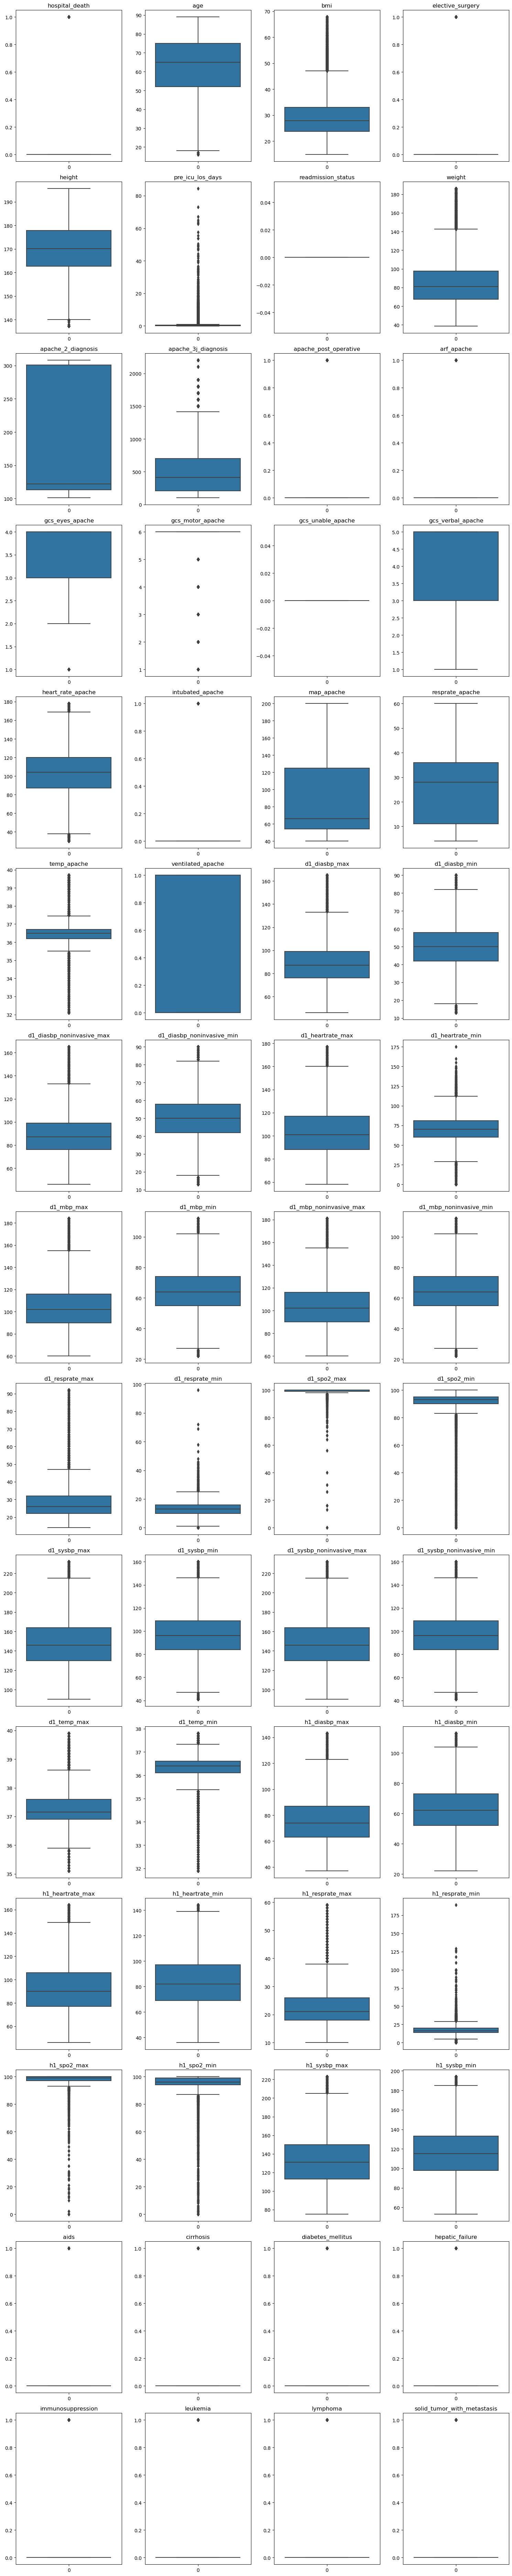

In [35]:
# Make a copy of cont_df
# Drop the '_id' variables from DataFrame as 
# they are unnecessary and their scale will adversely affect
# the scale of other variables

cont_df2 = cont_df.copy()
cont_df2 = cont_df2.drop(['encounter_id', 'patient_id', 'hospital_id',
                          'icu_id'], axis = 1)


# Visualize the outliers of each continuous variable using box plots

# Number of variables

num_vars = len(cont_df2.columns)

# Determine the number of rows and columns for subplots

num_cols = 4
num_rows = (num_vars + num_cols - 1) // num_cols  # Ensure enough rows for all variables

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten axes array for easy iteration

axes = axes.flatten()

for i, col in enumerate(cont_df2.columns):
    sns.boxplot(cont_df2[col], ax=axes[i])
    axes[i].set_title(f'{col}')

# Remove any empty subplots

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show();

'readmission_status' and 'gcs_unable_apache' appear to be potential binary variables. It appears these variables were missed because their max value in this dataset is not "1." These two variables will also be excluded from log-transformation and standardization.  

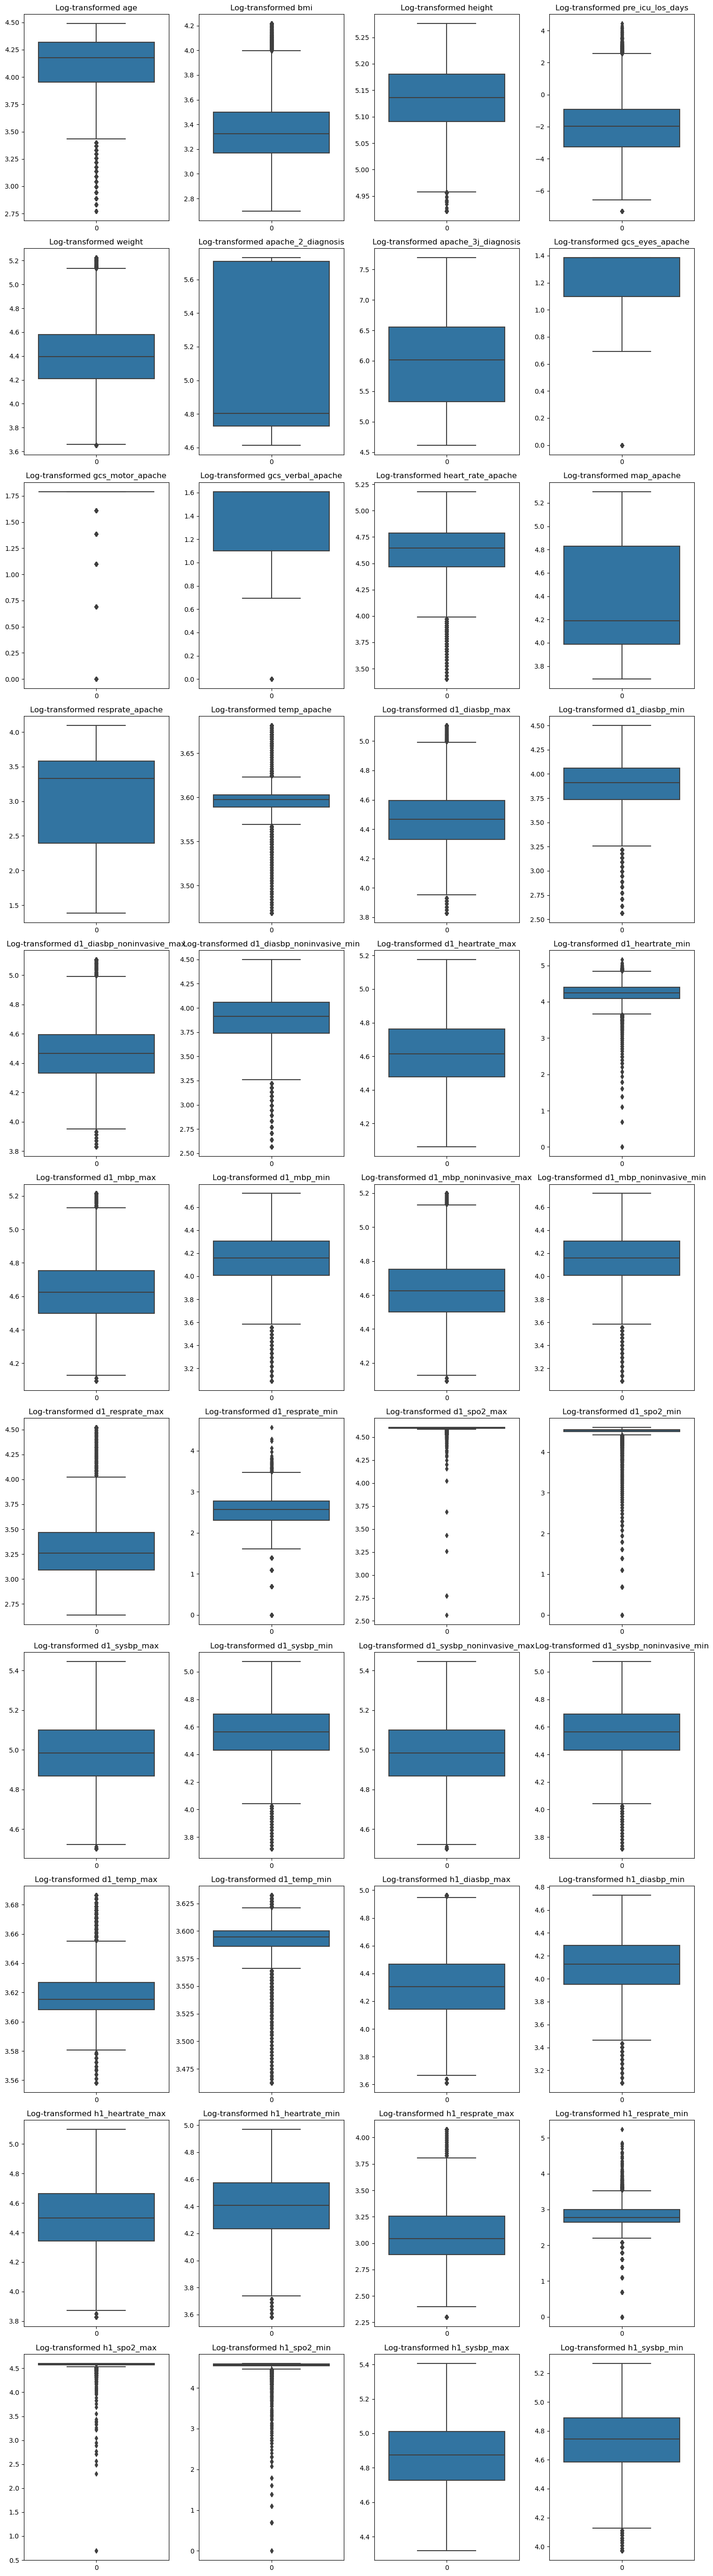

In [37]:
# Define the columns that need to be log transformed (columns)
# Note that binary continuous variables are excluded
# from log transformation

# Make a copy of the continuous variable DataFrame

log_cont_df = cont_df2.copy()

columns = ['age', 'bmi','height', 'pre_icu_los_days',
           'weight', 'apache_2_diagnosis',
           'apache_3j_diagnosis', 'gcs_eyes_apache', 'gcs_motor_apache', 
           'gcs_verbal_apache', 'heart_rate_apache',
           'map_apache', 'resprate_apache', 'temp_apache',
           'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
           'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
           'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
           'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
           'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
           'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
           'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_heartrate_max',
           'h1_heartrate_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max',
           'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min']


for col in columns:
    log_cont_df[col] = np.log(log_cont_df[col])

# Visualize the outliers of each log-transformed continuous variable using box plots

# Number of variables
num_vars = len(columns)

# Determine the number of rows and columns for subplots
num_cols = 4
num_rows = (num_vars + num_cols - 1) // num_cols  # Ensure enough rows for all variables

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(log_cont_df[col], ax=axes[i])
    axes[i].set_title(f'Log-transformed {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show();

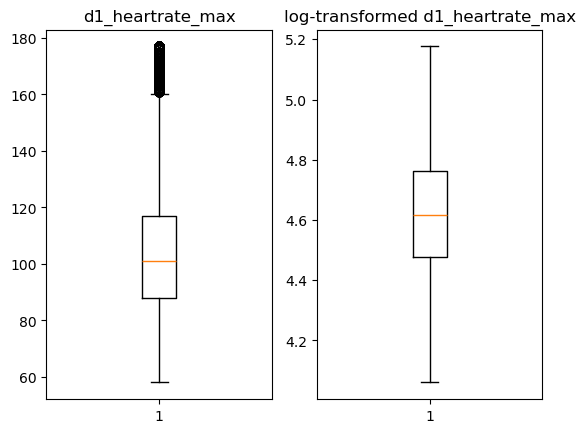

In [38]:
# Compare box plots of the original 'd1_heartrate_max' and
# the log-transformed variant 

plt.subplot(1, 2, 1)
plt.boxplot(cont_df['d1_heartrate_max'])
plt.title('d1_heartrate_max')

plt.subplot(1, 2, 2)
plt.boxplot(log_cont_df['d1_heartrate_max'])
plt.title('log-transformed d1_heartrate_max')

plt.show();

In [39]:
# Use 1, 1.5, 2 ... 4.5 as threshold values, find the number of outliers 
# in the original 'race_native' variable using Tukey's mothod

# NumPy's `percentile()` method returns the
# values of the given percentiles. In this case,
# give `75` and `25` as parameters, which corresponds
# to the third and the first quartiles.
q75, q25 = np.percentile(cont_df2['d1_heartrate_max'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("Outliers for the original d1_heartrate_max")
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((cont_df2['d1_heartrate_max'] > max_val)
                      | (cont_df2['d1_heartrate_max'] < min_val))[0]))
    ))

Outliers for the original d1_heartrate_max
The score threshold is: 1.0
Number of outliers is: 3234
Outliers for the original d1_heartrate_max
The score threshold is: 1.5
Number of outliers is: 1051
Outliers for the original d1_heartrate_max
The score threshold is: 2.0
Number of outliers is: 379
Outliers for the original d1_heartrate_max
The score threshold is: 2.5
Number of outliers is: 0
Outliers for the original d1_heartrate_max
The score threshold is: 3.0
Number of outliers is: 0
Outliers for the original d1_heartrate_max
The score threshold is: 3.5
Number of outliers is: 0
Outliers for the original d1_heartrate_max
The score threshold is: 4.0
Number of outliers is: 0
Outliers for the original d1_heartrate_max
The score threshold is: 4.5
Number of outliers is: 0


In [40]:
# Use 1, 1.5, 2 ... 4.5 as threshold values, find the number of outliers 
# in the original 'race_native' variable using Tukey's mothod

# NumPy's `percentile()` method returns the
# values of the given percentiles. In this case,
# give `75` and `25` as parameters, which corresponds
# to the third and the first quartiles.
q75, q25 = np.percentile(log_cont_df['d1_heartrate_max'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("Outliers for the log-transformed d1_heartrate_max'")
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((log_cont_df['d1_heartrate_max'] > max_val)
                      | (log_cont_df['d1_heartrate_max'] < min_val))[0]))
    ))

Outliers for the log-transformed d1_heartrate_max'
The score threshold is: 1.0
Number of outliers is: 3362
Outliers for the log-transformed d1_heartrate_max'
The score threshold is: 1.5
Number of outliers is: 0
Outliers for the log-transformed d1_heartrate_max'
The score threshold is: 2.0
Number of outliers is: 0
Outliers for the log-transformed d1_heartrate_max'
The score threshold is: 2.5
Number of outliers is: 0
Outliers for the log-transformed d1_heartrate_max'
The score threshold is: 3.0
Number of outliers is: 0
Outliers for the log-transformed d1_heartrate_max'
The score threshold is: 3.5
Number of outliers is: 0
Outliers for the log-transformed d1_heartrate_max'
The score threshold is: 4.0
Number of outliers is: 0
Outliers for the log-transformed d1_heartrate_max'
The score threshold is: 4.5
Number of outliers is: 0


For variables like 'd1_heartrate_max' that had extreme outliers, log transformation resulted in a relatively compressed range of values thus less extreme outliers. 

Log transformation can sometimes result in increased total number of outliers (relative to their original variable), but those outliers are less extreme and will have less impact on the data because the range of values in the log-transformed variable is compressed.

#### 4. Scale the continuous features

All dimensionality reduction techniques are sensitive to the scale of the data, so the data need to be standardized before dimensionality reduction is applied. 

> "The most common scaling method is to use standardization using StandardScaler() (also known as z-score normalization). This involves subtracting the mean and dividing by the standard deviation of each feature, so taht hte features have a mean of 0 and a standard deviation of 1." --Rostami, Pedram Ariel. A Practical Guide to Data Engineering: Part I

Importantly, if the data is standardized, it doesn't need to be mean-normalized prior to standardization because standardization with standard scaler includes mean-normalization. 

In [43]:
# Make a copy of the continuous features dataframe
# Scale the log-transformed continuous features 

scaled_cont_df = log_cont_df.copy()

columns_to_scale = ['age', 'bmi','height', 'pre_icu_los_days',
           'weight', 'apache_2_diagnosis',
           'apache_3j_diagnosis', 'gcs_eyes_apache', 'gcs_motor_apache', 
           'gcs_verbal_apache', 'heart_rate_apache',
           'map_apache', 'resprate_apache', 'temp_apache',
           'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
           'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
           'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
           'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
           'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
           'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
           'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_heartrate_max',
           'h1_heartrate_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max',
           'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min']


scaler = StandardScaler()
scaled_cont_df[columns_to_scale] = scaler.fit_transform(scaled_cont_df[columns_to_scale])

scaled_cont_df.describe()

ValueError: Input X contains infinity or a value too large for dtype('float64').

**Find the infinite values in log-transformed continuous variables**

In [73]:
# Identify infinite values

infinite_mask = log_cont_df.isin([np.inf, -np.inf])

# Print columns with infinite values

columns_with_infinite = infinite_mask.any(axis=0)
print("\nColumns with infinite values:")
print(log_cont_df.loc[:, columns_with_infinite])


Columns with infinite values:
       pre_icu_los_days  d1_heartrate_min  d1_resprate_min  d1_spo2_max  \
0             -0.613104          4.276666         2.302585     4.605170   
1             -0.074963          4.276666         2.484907     4.605170   
2             -7.272399          4.219508         2.079442     4.584967   
3             -7.272399          4.521789         1.945910     4.605170   
5             -7.272399          4.418841         2.302585     4.574711   
...                 ...               ...              ...          ...   
91698         -3.401197          4.532599         2.079442     4.605170   
91706         -3.661480          4.007333         2.484907     4.605170   
91708         -1.208613          4.248495         2.197225     4.605170   
91709         -2.119107          4.330733         2.484907     4.605170   
91712         -4.014302          4.262680             -inf     4.605170   

       d1_spo2_min  h1_resprate_min  h1_spo2_max  h1_spo2_min  
0   

In [75]:
# Define the columns with infinite values

columns = ['pre_icu_los_days', 'd1_heartrate_min', 'd1_resprate_min',
           'd1_spo2_max', 'd1_spo2_min', 'h1_resprate_min', 
           'h1_spo2_max', 'h1_spo2_min']


# Identify infinite values

infinite_mask = log_cont_df[columns].isin([np.inf, -np.inf])

# Sum of infinite values in each column

infinite_sum_columns = infinite_mask.sum(axis=0)

print("Sum of infinite values in each column:")

print(infinite_sum_columns)

Sum of infinite values in each column:
pre_icu_los_days    2767
d1_heartrate_min     349
d1_resprate_min     2560
d1_spo2_max            2
d1_spo2_min           84
h1_resprate_min      490
h1_spo2_max            6
h1_spo2_min           34
dtype: int64


StandardScaler() couldn't be applied to the log-transformed continuous variables DataFrame because log-transformation resulted in infinite values within certain variables (see above). Fortunately, the number of infinite values in these variables do not exceed 5% of the total values (i.e., 3,622), so these variables can be retained for further analysis. Instead, the rows containing an infinite value within these remaining variables will be dropped. 

**1. Create a temporary dataframe (temp_df) containing log-transformed continuous variables, binary continuous variables, and categorical variables**

**2. Drop rows containing inf values from 'pre_icu_los_days', 'd1_heartrate_min', 'd1_resprate_min','d1_spo2_max', 'd1_spo2_min', 'h1_resprate_min','h1_spo2_max', and 'h1_spo2_min'**

Because rows are being dropped from the log-transformed continuous variables DataFrame, those exact same rows need to be dropped from all other variables that are not in this particular DataFrame (i.e., categorical variables DataFrame). Note that log_cont_df contains the non-log-transformed binary variables from the continuous variables DataFrame. I will create a temporary DataFrame (temp_df) that will contain the log-transformed continuous variables and all other variables to be included in analysis then drop the necessary rows (infinite values-containing rows) from the temporary dataframe.

In [77]:
# Make a copy of log_cont_df
# Make a copy of cat_df_encoded
# Drop rows that contain infinite values

log_cont_df2 = log_cont_df.copy()
cat_df_encoded2 = cat_df_encoded.copy()

# Combine the two DataFrames using pd.concat()

temp_df = pd.concat([log_cont_df2, cat_df_encoded2], axis = 1)

print('Dimensions of temp_df before removing rows with inf values: ', temp_df.shape)

# Identify rows with infinite values

infinite_mask = temp_df.isin([np.inf, -np.inf]).any(axis=1)

# Drop rows with infinite values

temp_df = temp_df[~infinite_mask]

# Identify infinite values

infinite_mask = temp_df.isin([np.inf, -np.inf])

# Print the rows and columns that contain infinite values

rows_with_infinite = infinite_mask.any(axis=1)
columns_with_infinite = infinite_mask.any(axis=0)

print("Rows with infinite values:")
print(temp_df[rows_with_infinite].shape[0])

print("\nColumns with infinite values:")
print(temp_df.loc[:, columns_with_infinite].shape[1])

print('Dimensions of temp_df after removing rows with inf values: ', temp_df.shape)

Dimensions of temp_df before removing rows with inf values:  (72454, 67)
Rows with infinite values:
0

Columns with infinite values:
0
Dimensions of temp_df after removing rows with inf values:  (66904, 67)


#### Apply standard scaler to continuous variables

No need to apply standard scaler to categorical variables or binary variables amongst numerical/continuous variables.

In [79]:
# Make a copy of the continuous features dataframe
# Scale the log-transformed continuous features 

scaled_cont_df = temp_df.copy()

columns_to_scale = ['age', 'bmi','height', 'pre_icu_los_days',
           'weight', 'apache_2_diagnosis',
           'apache_3j_diagnosis', 'gcs_eyes_apache', 'gcs_motor_apache', 
           'gcs_verbal_apache', 'heart_rate_apache',
           'map_apache', 'resprate_apache', 'temp_apache',
           'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
           'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
           'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
           'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
           'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
           'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
           'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_heartrate_max',
           'h1_heartrate_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max',
           'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min']


scaler = StandardScaler()
scaled_cont_df[columns_to_scale] = scaler.fit_transform(scaled_cont_df[columns_to_scale])

print(scaled_cont_df.shape)
scaled_cont_df.describe()

(66904, 67)


hospital_death           age           bmi  elective_surgery  \
count    66904.000000  6.690400e+04  6.690400e+04      66904.000000   
mean         0.074854 -4.944827e-16 -5.213521e-16          0.181768   
std          0.263157  1.000007e+00  1.000007e+00          0.385656   
min          0.000000 -3.981665e+00 -2.457402e+00          0.000000   
25%          0.000000 -4.116166e-01 -6.668128e-01          0.000000   
50%          0.000000  2.642668e-01 -6.813322e-02          0.000000   
75%          0.000000  6.977075e-01  5.966071e-01          0.000000   
max          1.000000  1.216101e+00  3.352072e+00          1.000000   

             height  pre_icu_los_days  readmission_status        weight  \
count  6.690400e+04      6.663100e+04             66904.0  6.690400e+04   
mean  -5.783302e-15      6.995483e-17                 0.0 -2.201914e-15   
std    1.000007e+00      1.000008e+00                 0.0  1.000007e+00   
min   -3.304979e+00     -2.609236e+00                 0.0 -2.603134e+00   
25%   -6.468195e-01     -5.237778e-01                 0.0 -6.579165e-01   
50%    6.375783e-02      3.385026e-02                 0.0 -8.652471e-03   
75%    7.576203e-01      5.357082e-01                 0.0  6.496081e-01   
max    2.252163e+00      3.137662e+00                 0.0  2.928912e+00   

       apache_2_diagnosis  apache_3j_diagnosis  ...      leukemia  \
count        6.690400e+04         6.690400e+04  ...  66904.000000   
mean        -3.301224e-15         2.442677e-16  ...      0.007593   
std          1.000007e+00         1.000007e+00  ...      0.086807   
min         -1.115440e+00        -1.504764e+00  ...      0.000000   
25%         -8.659751e-01        -7.136563e-01  ...      0.000000   
50%         -6.956915e-01         5.031316e-02  ...      0.000000   
75%          1.311026e+00         6.488486e-01  ...      0.000000   
max          1.362110e+00         1.915688e+00  ...      1.000000   

           lymphoma  solid_tumor_with_metastasis     ethnicity        gender  \
count  66904.000000                 66904.000000  66904.000000  66904.000000   
mean       0.004275                     0.022017      1.994021      0.541746   
std        0.065242                     0.146739      0.991840      0.498258   
min        0.000000                     0.000000      0.000000      0.000000   
25%        0.000000                     0.000000      2.000000      0.000000   
50%        0.000000                     0.000000      2.000000      1.000000   
75%        0.000000                     0.000000      2.000000      1.000000   
max        1.000000                     1.000000      5.000000      1.000000   

       icu_admit_source  icu_stay_type      icu_type  apache_3j_bodysystem  \
count      66904.000000   66904.000000  66904.000000          66904.000000   
mean           0.673532       0.120531      4.294123              4.340578   
std            0.914235       0.471574      1.804878              3.790213   
min            0.000000       0.000000      0.000000              0.000000   
25%            0.000000       0.000000      4.000000              0.000000   
50%            0.000000       0.000000      5.000000              5.000000   
75%            1.000000       0.000000      5.000000              8.000000   
max            4.000000       2.000000      7.000000             10.000000   

       apache_2_bodysystem  
count         66904.000000  
mean              2.543540  
std               2.767369  
min               0.000000  
25%               0.000000  
50%               1.000000  
75%               4.000000  
max               9.000000  

[8 rows x 67 columns]

#### 5. Normalize the log-transformed and standardized continuous features

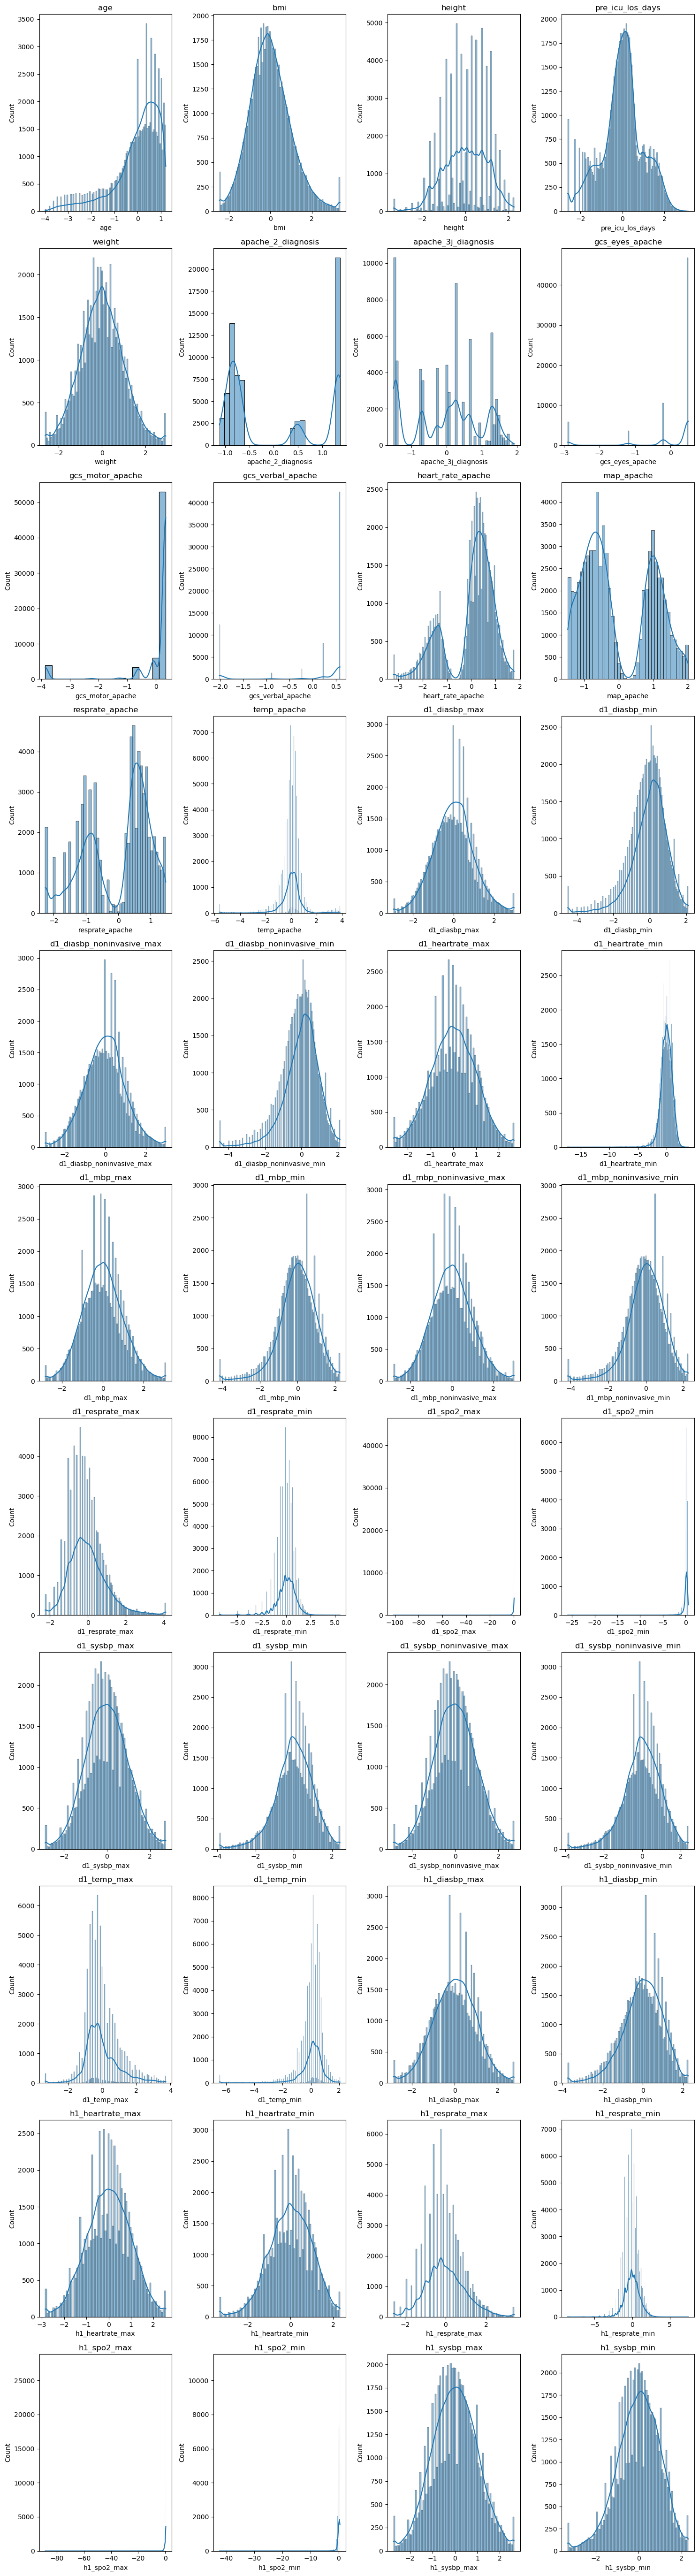

In [81]:
# Visualize the distributon of each continuous using histograms

columns_to_normalize = ['age', 'bmi','height', 'pre_icu_los_days',
           'weight', 'apache_2_diagnosis',
           'apache_3j_diagnosis', 'gcs_eyes_apache', 'gcs_motor_apache', 
           'gcs_verbal_apache', 'heart_rate_apache',
           'map_apache', 'resprate_apache', 'temp_apache',
           'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
           'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
           'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
           'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
           'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
           'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
           'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_heartrate_max',
           'h1_heartrate_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max',
           'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min']

# Number of variables

num_vars = len(columns_to_normalize)

# Determine the number of rows and columns for subplots

num_cols = 4
num_rows = (num_vars + num_cols - 1) // num_cols  # Ensure enough rows for all variables

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten axes array for easy iteration

axes = axes.flatten()

for i, col in enumerate(columns_to_normalize):
    sns.histplot(scaled_cont_df[col], kde = True, ax=axes[i])
    axes[i].set_title(f'{col}')

# Remove any empty subplots

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show();

In [83]:
# Use Shapiro test to statistically check normal distribution of each variable

for col in columns_to_normalize:
    shapiro_stats = stats.shapiro(scaled_cont_df[col])
    print("Shapiro test statistics for {col} is {shapiro_stats[0]} and p value is {shapiro_stats[1]}".format(col = col, shapiro_stats = shapiro_stats))

Shapiro test statistics for age is 0.8703221082687378 and p value is 0.0
Shapiro test statistics for bmi is 0.9885033369064331 and p value is 0.0
Shapiro test statistics for height is 0.9878973960876465 and p value is 0.0
Shapiro test statistics for pre_icu_los_days is nan and p value is 1.0
Shapiro test statistics for weight is 0.9971866607666016 and p value is 1.7555185283485288e-31
Shapiro test statistics for apache_2_diagnosis is 0.7515122294425964 and p value is 0.0
Shapiro test statistics for apache_3j_diagnosis is 0.9221576452255249 and p value is 0.0
Shapiro test statistics for gcs_eyes_apache is 0.5476135015487671 and p value is 0.0
Shapiro test statistics for gcs_motor_apache is 0.3789516091346741 and p value is 0.0
Shapiro test statistics for gcs_verbal_apache is 0.590979814529419 and p value is 0.0
Shapiro test statistics for heart_rate_apache is 0.8982881307601929 and p value is 0.0
Shapiro test statistics for map_apache is 0.9068111777305603 and p value is 0.0
Shapiro tes

The histograms suggest that some of the features have normal or close-to-normal distributions albeit skewed in some variables more than others. However the p-value of the Shapiro test statistic for each feature is less than 0.05 (often 0), so the null hypothesis of the normality of the variable is rejected. 

Transformations that can be applied to make the distribution of the features more normal include Box-Cox transformation and Yeo-Johnson Transformation. "The Yeo-Johnson transformation is similar to Box-Cox transformation, but it can handle both positive and negative values." ("A Practical Guide to Machine Learning and AI: Part-I" (Rostami, A. 2024)). Some of the features have negative values, as seen in the histograms above, so the Yeo-Johnson transformation will be applied to these features.

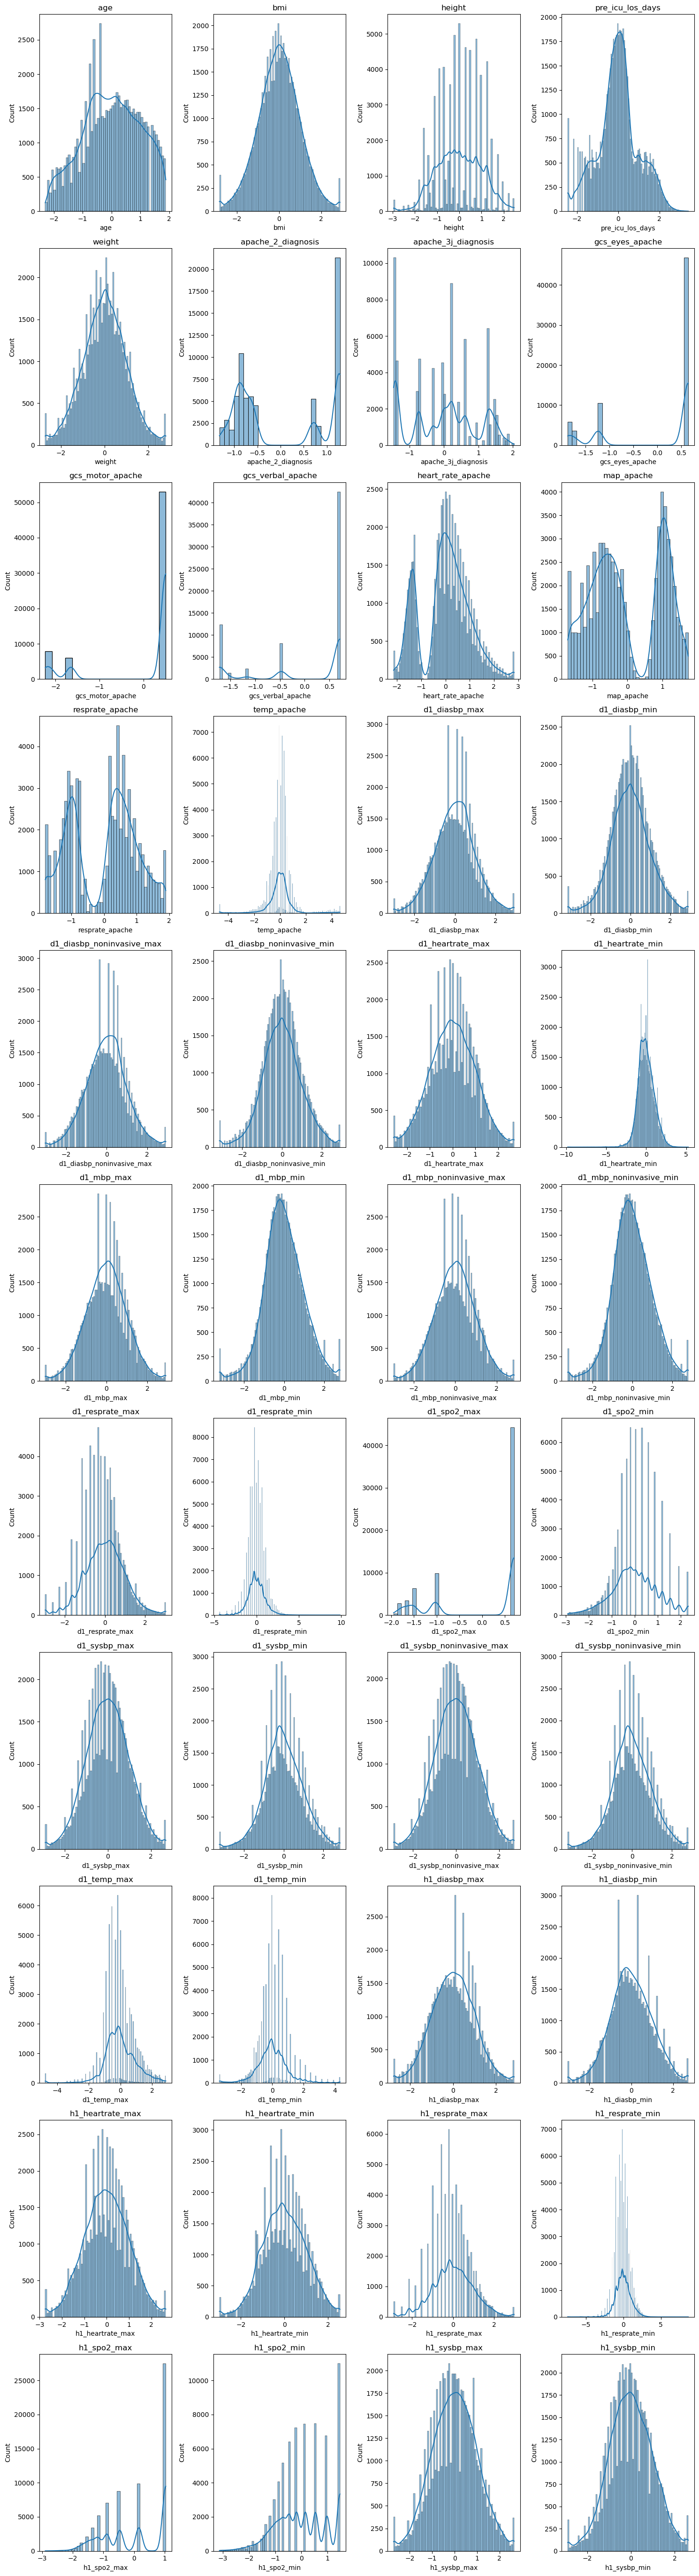

In [85]:
# Make a copy of the scaled DataFrame and 
# apply the transformation to the copy

transformed_cont_df = scaled_cont_df.copy()

# Apply the Yeo-Johnson Transformation to the features

from sklearn.preprocessing import PowerTransformer


# Initialize the Yeo-Johnson transformer without standardization
# No standardization because the data has already been standardized

transformer = PowerTransformer(method = 'yeo-johnson')

# Apply Yeo-Johnson transformation only to log-transformed and scaled
# continuous variables (only variables that require transformation)

transformed_cont_df[columns_to_normalize] = transformer.fit_transform(transformed_cont_df[columns_to_normalize])

# Number of variables

num_vars = len(columns_to_normalize)

# Determine the number of rows and columns for subplots

num_cols = 4
num_rows = (num_vars + num_cols - 1) // num_cols  # Ensure enough rows for all variables

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten axes array for easy iteration

axes = axes.flatten()

for i, col in enumerate(columns_to_normalize):
    sns.histplot(transformed_cont_df[col], kde = True, ax=axes[i])
    axes[i].set_title(f'{col}')

# Remove any empty subplots

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show();

In [87]:
# Use Shapiro test to statistically check normal distribution of each variable

for col in columns_to_normalize:
    shapiro_stats = stats.shapiro(transformed_cont_df[col])
    print("Shapiro test statistics for {col} is {shapiro_stats[0]} and p value is {shapiro_stats[1]}".format(col = col, shapiro_stats = shapiro_stats))

Shapiro test statistics for age is 0.9830366969108582 and p value is 0.0
Shapiro test statistics for bmi is 0.9977230429649353 and p value is 1.4599873055292014e-28
Shapiro test statistics for height is 0.9914216995239258 and p value is 0.0
Shapiro test statistics for pre_icu_los_days is nan and p value is 1.0
Shapiro test statistics for weight is 0.9979709982872009 and p value is 4.9271219841654206e-27
Shapiro test statistics for apache_2_diagnosis is 0.77677983045578 and p value is 0.0
Shapiro test statistics for apache_3j_diagnosis is 0.9269424080848694 and p value is 0.0
Shapiro test statistics for gcs_eyes_apache is 0.6195764541625977 and p value is 0.0
Shapiro test statistics for gcs_motor_apache is 0.520194411277771 and p value is 0.0
Shapiro test statistics for gcs_verbal_apache is 0.6686224937438965 and p value is 0.0
Shapiro test statistics for heart_rate_apache is 0.9748738408088684 and p value is 0.0
Shapiro test statistics for map_apache is 0.9201937317848206 and p value i

The Yeo-Johnson transformation was applied successfully to the features although this isn't necessarily reflected in the resultant Shapiro test statistics. The histograms of the Yeo-Johnson-transformed features (YJ features) show more normal-ish distributions of the features.

At this point in EDA, either the dataframe comprised of the non-YJ features (i.e., scaled_cont_df) or the dataframe comprised of the YJ features (i.e., transformed_cont_df) can be used in subsequent Feature Selection and Feature Engineering steps. Importantly, both dataframes contain both the 1) binary continuous variables and 2) the new binary variables created using get_dummies from the original categorical variables in the train_df. Furthermore, these binary variables were excluded from log transformation, standardization, and normalization because they do not require such transformations.

I will proceed with the YJ features in transformed_cont_df. 

In [89]:
# Check to see if any transformations created NaN values 
# Get the total number of missing rows in the DataFrame post dropna()
# Further confirmation that the rows with missing values have been dropped

null_mask = transformed_cont_df.isnull().any(axis = 1)
null_rows = transformed_cont_df[null_mask]
print(null_rows.shape[0])
print(null_rows)

273
       hospital_death       age       bmi  elective_surgery    height  \
294                 0  0.670092  1.623000                 0 -1.806975   
2178                0 -0.734357  1.231351                 0 -0.449047   
2463                0 -0.529322  0.262092                 0  1.480558   
3268                0 -0.361812  0.929583                 0  1.111662   
4510                0  0.593904 -0.409276                 0  0.255232   
...               ...       ...       ...               ...       ...   
88685               0  0.085708  0.301698                 0  0.985646   
90022               0  0.670092  0.822469                 0  0.985646   
90194               0 -0.302698  0.126606                 0  0.743891   
91017               0  1.713506  0.343724                 0  2.217282   
91451               0 -0.179256  1.292276                 0  0.331302   

       pre_icu_los_days  readmission_status    weight  apache_2_diagnosis  \
294                 NaN                   

In [91]:
# Get total number of rows that contain NaN

transformed_cont_df.pre_icu_los_days.isnull().sum()

273

In [93]:
# 273 rows of 'pre_icu_los_days' have missing values
# Less than 5% of total values, so drop 
# missing values from DataFrame

transformed_cont_df2 = transformed_cont_df.copy()

#Drop rows with missing values

transformed_cont_df2 = transformed_cont_df2.dropna()

# Get the total number of missing rows in the DataFrame post dropna()
# Further confirmation that the rows with missing values have been dropped

null_mask = transformed_cont_df2.isnull().any(axis = 1)
null_rows = transformed_cont_df2[null_mask]
print(null_rows.shape[0])


0


### II. Data Exploration

#### clean_train_df: a clean version of train_df

I want to create a clean version of train_df that

* lacks missing or NaN values and records
* has new variables that were generated using get_dummies() applied to original categorical variables
* has log-transformed continuous variables (where applicable) to deal with outliers
* has scaled and normalized continuous variables

This dataset will be used in subsequent steps of the EDA process. Fortunately, the dataset in its current iteration (transformed_cont_df) satisfies these requirements. transformed_cont_df will be renamed "clean_train_df" and used in subsequent steps of the EDA process.

In [95]:
# Create clean_train_df

clean_train_df = transformed_cont_df2.copy()

print(clean_train_df.shape)
clean_train_df.info()
clean_train_df.head()

(66631, 67)
<class 'pandas.core.frame.DataFrame'>
Index: 66631 entries, 0 to 91709
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_death               66631 non-null  int64  
 1   age                          66631 non-null  float64
 2   bmi                          66631 non-null  float64
 3   elective_surgery             66631 non-null  int64  
 4   height                       66631 non-null  float64
 5   pre_icu_los_days             66631 non-null  float64
 6   readmission_status           66631 non-null  int64  
 7   weight                       66631 non-null  float64
 8   apache_2_diagnosis           66631 non-null  float64
 9   apache_3j_diagnosis          66631 non-null  float64
 10  apache_post_operative        66631 non-null  int64  
 11  arf_apache                   66631 non-null  float64
 12  gcs_eyes_apache              66631 non-null  float64
 13  gcs_motor

hospital_death       age       bmi  elective_surgery    height  \
0               0  0.225835 -0.824716                 0  0.985646   
1               0  0.902910 -0.040881                 0 -0.907263   
2               0 -1.892412  0.531210                 0  0.255232   
3               0  1.221723 -0.842106                 1 -0.449047   
5               0  0.155199 -0.020805                 0  1.975384   

   pre_icu_los_days  readmission_status    weight  apache_2_diagnosis  \
0          0.644690                   0 -0.299687           -0.887759   
1          0.925566                   0 -0.484455           -1.057332   
2         -2.454705                   0  0.590014           -0.615888   
3         -2.454705                   0 -0.954578            0.678503   
5         -2.454705                   0  0.754259            1.255155   

   apache_3j_diagnosis  ...  leukemia  lymphoma  solid_tumor_with_metastasis  \
0             0.232840  ...       0.0       0.0                          0.0   
1            -0.750772  ...       0.0       0.0                          0.0   
2             0.626071  ...       0.0       0.0                          0.0   
3             1.280023  ...       0.0       0.0                          0.0   
5            -0.015897  ...       0.0       0.0                          0.0   

   ethnicity  gender  icu_admit_source  icu_stay_type  icu_type  \
0          2       1                 1              0         2   
1          2       0                 1              0         5   
2          2       0                 0              0         5   
3          2       0                 2              0         2   
5          2       1                 0              0         5   

   apache_3j_bodysystem  apache_2_bodysystem  
0                     9                    0  
1                     8                    6  
2                     5                    3  
3                     0                    0  
5                     7                    4  

[5 rows x 67 columns]

For a supervised learning project, I would normally examine the target to define its key characteristics then establish a "base" model, but this is an unsupervised learning project where there data aren't guided by a particular outcome or target. 

The features have been cleaned, scaled, and normalized (have a normal-ish distribution) during the Data Cleaning steps. Now that a DataFrame containing these features has been created, I can proceed to establishing a "clustering base model."

#### What's my clustering base? What does the clustering look like on all features (not dimensionality reduced-features)?

Before running dimensionality-reduced data/features through the clustering algorithms, I will take a look at what the clustering results look like when all features are run through a clustering algorithm.

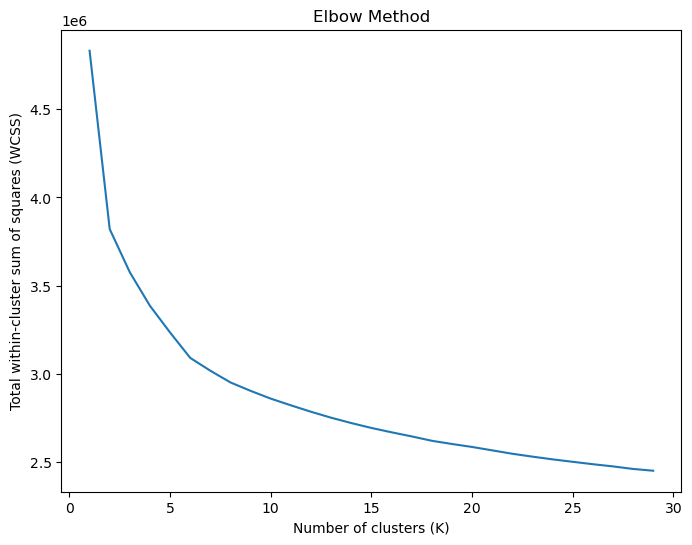

In [97]:
# Use the elbow method to determine the optimal number of clusters

# Establish the feature set

X = clean_train_df.drop(['hospital_death'], axis = 1)

# Compute the WCSS for different values of K
# For 10K+ records datasets, use 1 - 30 (or higher)

wcss = []

for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, random_state = 21)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve

plt.figure(figsize = (8, 6))
plt.plot(range(1, 30), wcss)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Total within-cluster sum of squares (WCSS)')
plt.title('Elbow Method')
plt.show();

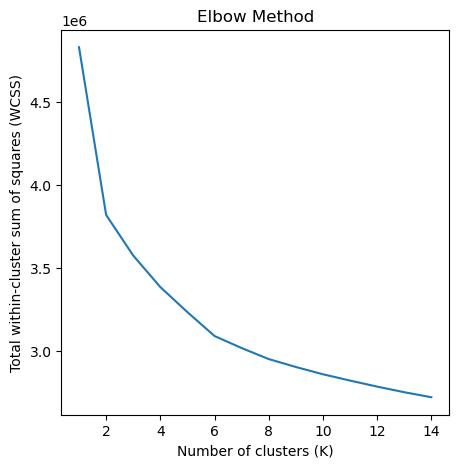

In [99]:
# Use the elbow method to determine the optimal number of clusters

# Establish the feature set

X = clean_train_df.drop(['hospital_death'], axis = 1)

# Compute the WCSS for different values of K
# For 10K+ records datasets, use 1 - 30 (or higher)

wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, random_state = 21)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve

plt.figure(figsize = (5, 5))
plt.plot(range(1, 15), wcss)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Total within-cluster sum of squares (WCSS)')
plt.title('Elbow Method')
plt.show();

The "elbow" (i.e., where inertia starts decreasing linearly), which determines the optimal number of clusters (K), for all 66 features is around 6, so I will use 6 as the optimal number of clusters.

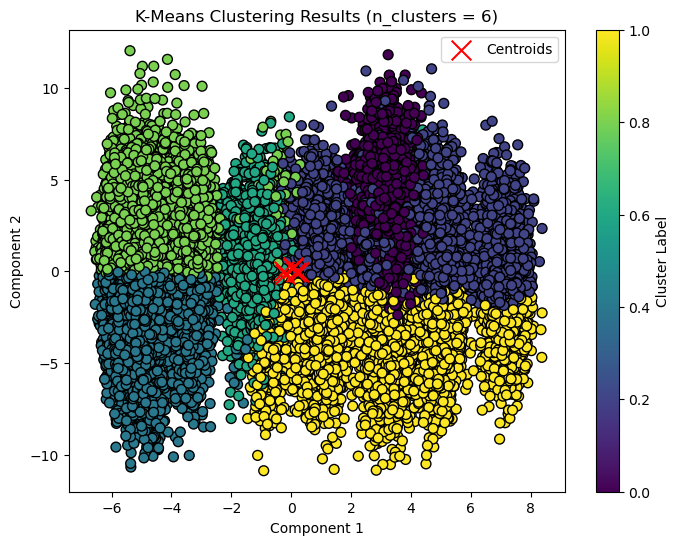

In [101]:
# Run k-means by setting n_clusters = 6

# Establish the feature set

X = clean_train_df.drop(['hospital_death'], axis = 1)

# Defining the k-means

kmeans = KMeans(n_clusters = 6, random_state = 21)

# Fit the model

kmeans.fit(X)

# Reduce to two dimensions using PCA
# (Data has more than two dimensions)

pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X)

# Plot the clusters

plt.figure(figsize = (8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = kmeans.labels_, cmap = 'viridis',
            marker = 'o', edgecolor = 'k', s = 50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker = 'x', s = 200, c = 'red', label = 'Centroids')
plt.title('K-Means Clustering Results (n_clusters = 6)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label = 'Cluster Label')
plt.legend()
plt.show();

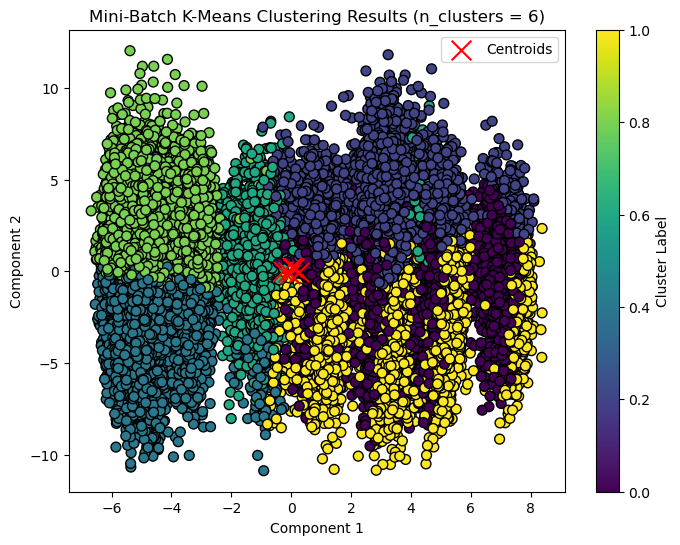

In [103]:
# Try MiniBatchKMeans for comparison

mini_batch_k_means = MiniBatchKMeans(n_clusters = 6, random_state = 21)

# Fit the model

mini_batch_k_means.fit(X)

# Reduce to two dimensions using PCA
# (Data has more than two dimensions)

pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X)

# Plot the clusters

plt.figure(figsize = (8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = mini_batch_k_means.labels_, cmap = 'viridis',
            marker = 'o', edgecolor = 'k', s = 50)
plt.scatter(mini_batch_k_means.cluster_centers_[:, 0], mini_batch_k_means.cluster_centers_[:, 1],
            marker = 'x', s = 200, c = 'red', label = 'Centroids')
plt.title('Mini-Batch K-Means Clustering Results (n_clusters = 6)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label = 'Cluster Label')
plt.legend()
plt.show();

In [105]:
# Get predicted clusters

full_pred_k = KMeans(n_clusters = 10, random_state = 21).fit_predict(X)
full_pred_mini_k = MiniBatchKMeans(n_clusters = 10, random_state = 21).fit_predict(X)


# Print Silhouette Coefficient

print('Silhouette Coefficient for k-means: {}'.format(
    metrics.silhouette_score(X, full_pred_k, metric = 'euclidean')))
print('Silhouette Coefficient for Mini Batch k-means: {}'.format(
    metrics.silhouette_score(X, full_pred_mini_k, metric = 'euclidean')))

# Print Davies-Bouldin Index

print('Davies-Bouldin Index for k-means: {}'.format(
    metrics.davies_bouldin_score(X, full_pred_k)))
print('Davies-Bouldin Index for Mini Batch k-means: {}'.format(
    metrics.davies_bouldin_score(X, full_pred_mini_k)))

# Print Calinski-Harabasz Index 
# aka Variance Ratio Criterion

print('Variance Ratio Criterion for k-means: {}'.format(
    metrics.calinski_harabasz_score(X, full_pred_k)))
print('Variance Ratio Criterion for Mini Batch k-means: {}'.format(
    metrics.calinski_harabasz_score(X, full_pred_mini_k)))

                                                                    

Silhouette Coefficient for k-means: 0.08566240266973153
Silhouette Coefficient for Mini Batch k-means: 0.07589315049757556
Davies-Bouldin Index for k-means: 2.636574971692938
Davies-Bouldin Index for Mini Batch k-means: 2.7574663393320273
Variance Ratio Criterion for k-means: 5115.012698437369
Variance Ratio Criterion for Mini Batch k-means: 4950.558895020753


**Establishing baseline performance metrics**

| Clustering algorithm | Silhouette Coefficient | DBI | CHI |
| :-- | :--: | :--: | :--: |
| k-means | 0.08566240266973153 | 2.636574971692938 | 5115.012698437369 |
| Mini-Batch k-means | 0.07589315049757556 | 2.7574663393320273 | 4950.558895020753 |

Running all 66 features (no dimensionality reduction techniques applied) in K-Means and Mini Batch K-Means produced Silhouette Coefficients that are very close to zero. A Silhouette Coefficient of ["0 means that the sample is on or very close to the decision boundary between two neighboring clusters"](https://www.sciencedirect.com/topics/computer-science/silhouette-coefficient#:~:text=Silhouette%20coefficients%20close%20to%20%2B%201%20imply%20that%20the%20sample%20is,allocated%20to%20the%20wrong%20cluster.). In other words, a Silhouette Score around zero indicates overlapping cluters. 

The DBI for k-means is lower than the DBI for Mini Batch k-means and the CHI for k-means is higher than the CHI for Mini Batch k-means. These results suggest that the k-means is performing better than Mini Batch k-means. 

One drawback of k-means is that its pre-requisites often preclude its application to high-dimensional, real-world datasets (more information about these pre-requisites below). While k-means may not be the best clustering algorithm for this dataset, establishing baseline clustering performance metrics is important. 

I will proceed to Dimensionality Reduction to see if the appropriate dimensionality reduction technique improves clustering performance.

### III. Dimensionality Reduction

For a supervised learning project, I would focus on the creation of new features that would be useful in explaining the target variable. For this unsupervised learning project, I will list and compare different dimensionality reduction techniques and apply the technique that is best suited to this dataset. 

Importantly, data need to be standardized before dimensionality reduction is applied because dimensionality reduction techniques are sensitive to the scale of the data. Additionally, if the data are standardized, it doesn't need to be mean-normalized first because standardization with Standard Scaler includes mean-normalization. Please note that clean_train_df contains data that were standardized using Standard Scaler during the Data Cleaning process.

#### Dimensionality reduction techniques

* Principal Components Analysis (PCA)
* t-Distributed Stochastic Neighbor Embedding (t-SNE)
* Uniform Manifold Approximation and Projection (UMAP)

#### Comparing PCA, t-SNE, and UMAP
| | PCA | t-SNE | UMAP |
| :-- | :-- | :-- | :-- |
| Linear or Non-linear | Linear$^*$ | Non-linear | Non-linear |
| Preservation of Global or Local Structure | Global | Local | Both |
| Visualization or Feature Extraction | Both $^*$ | Visualization $^*$$^*$ | Both AND $^*$$^*$$^*$ |
| Interpretability | PCs are linear combinations of original features; relatively more interpretable | More difficult; doesn't have a direct correspondence to original features | More difficult to interpret, but can capture more nuanced relationships in the data |
| Scalability | More scalable than t-SNE | Computationally expensive for large (>10K_ and dimensionally large (>50) datasets | More scalable than t-SNE|
| Speed | Fastest | Slowest | Second-fastest|
$^*$PCA has a number of assumptions (see below for more details)
$^*$$^*$t-SNE is also commonly used in EDA
$^*$$^*$$^*$UMAP is also particularly useful in EDA, clustering and classification tasks, anomaly detection, and preprocessing for machine learning models

#### Assumptions of PCA (Limitations and Considerations)
*(Source: Rostami, Pedram Ariel. A Practical Guide to Data Engineering: Part I)*
1. Linearity Assumption
   * *PCA assumes relationships between variables are linear*
   *  If your data exhibits nonlinear relationships, PCA is not the most appropriate technique
2. Normality Assumption
   * *PCA works best when input variables are normally distributed*
   * PCA is sensitive to skewness and outliers, so data may need to be transformed before applying PCA
3. Multicollinearity
    * *PCA is sensitive to scale and can be affected by multicollinearity (where two or more features are highly correlated)
    * Data need to be standardized and multicollinearity need to be addressed before performing PCA
4. Interpretation of Principal Components
   * *Can be challenging, especially when the components are a combination of many original features*
   * Need to use domain knowledge and explore eigenvectors to understand the significance of each principal component
5. Curse of dimensionality
   * *While PCA can help mitigate the curse of dimensionality, the number of principal components required to explain a certain amount of variance can still grow as the number of original features increases*
6. Handling Categorical Variables
   * *PCA is designed primarily for continuous variables*
  
#### Apply the UMAP dimensionality reduction technique

The shape of the clean_train_df is (66631, 67). The shape of this dataset precludes t-SNE (>10K records and >50 features). Ultimately, the variables in this dataset have complex, nonlinear relationships, so a nonlinear dimensionality reduction technique is appropriate for this dataset. I will proceed with UMAP.

**Use RandomizedSearchCV() to get the best parameters for UMAP**

GridSearchCV and RandomizedSearchCV are typically used to find the best parameters of supervised learning models because a target variable (y) is required to calculate a model performance metric (e.g., accuracy, precision). The data will not be guided by a target or the ground truth in the exploration via unsupervised learning clustering algorithms, but I want to run the same umap-reduced data in all of the different clustering algorithms. 

An alternative option would be to create a custom function to measure model performance, such as a function to measure the Silhouette Score, because best parameters are determined by a model performance metric. However, the issue with this is that the UMAP parameters would be determined by the perfomance of the specific clustering algorithm. This is an issue because the UMAP-best parameters could differ between different clustering algorithms. If the UMAP-best parameters differ between the different clustering algorithms then the UMAP-reduced data used in the each clustering algorithm would be different. Using different UMAP-reduced datasets in different clustering models creates inconsistency in the evaluation of the different clustering algorithms. The UMAP-reduced dataset must be consistent across the clustering algorithms. Using the same UMAP-reduced data across different clustering algorithms ensures that differences in clustering performance are due to the clustering algorithm. 

To create the one UMAP-reduced data that will be used across all different clustering algorithms, I will use RandomizedSearchCV to get the best parameters for UMAP. I will use only this UMAP-reduced data in the different clustering algorithms.

In [107]:
# Establish the feature set and target

X = clean_train_df.drop(['hospital_death'], axis = 1)
y = clean_train_df.hospital_death

from umap import UMAP
from sklearn.model_selection import RandomizedSearchCV

import time

# Define start time

time_start = time.time()

# Define range of hyperparameters

params = {'n_components': [3, 4, 5, 10, 15],
          'n_neighbors': [2, 5, 10, 50, 100, 250, 500],
          'min_dist': [0.0, 0.1, 0.3, 0.5, 0.75, 0.99],
          'metric': ['correlation', 'cosine'],
          }


# Initialize RandomizedSearchCV
# https://gist.github.com/odinokov/09813e98f440cfacaca443ae7a71069e

umap_results = UMAP(random_state = 21)
RS_search = RandomizedSearchCV(umap_results, params, scoring = 'accuracy', cv = 5)
RS_search.fit(X, y)

best_params = RS_search.best_params_
print(best_params)

print('GridSearch done! Time elapsed: {} seconds'.format(time.time() - time_start))

{'n_neighbors': 2, 'n_components': 5, 'min_dist': 0.3, 'metric': 'cosine'}
GridSearch done! Time elapsed: 6227.090310335159 seconds


(66631, 10)


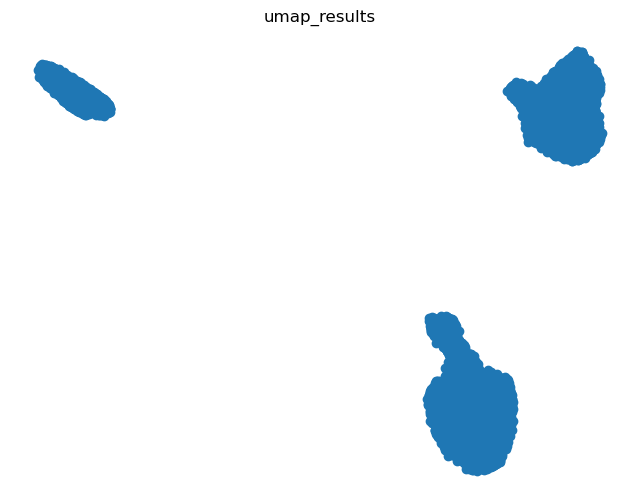

In [109]:
# Plot UMAP results

X = clean_train_df.drop(['hospital_death'], axis = 1)

# Run UMAP with best_params
import umap

umap_results = umap.UMAP(random_state = 21,
                n_components = 10, 
                n_neighbors = 100,
                min_dist = 0.5,
                metric = 'cosine').fit_transform(X)

print(umap_results.shape)

# Visualize umap_results

plt.figure(figsize = (8, 6))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.title('umap_results')
plt.axis('off')
plt.show();

Plot of umap_results shows three groupings. The grouping in the upper left corner is oval-like and close to symmetrical. The two groupings on the right are not symmetrical and appear to have unequal variances.

## Clustering algorithms in EDA

### K-means
*Aims to partition a dataset into K distinct clusters, where each data point belongs to the cluster with the nearest mean (or centroid)*

**The data need to meet the three prerequisites**
1. Cluster number is k
   * K-Means assumes that the correct cluster number is k
   * Determining k is not trivial
2. Clusters are isotropic
   * k-Means assumes that the underlying "true" cluster are radially symmetric (isotropic)
   * If this assumption fails, k-means would come up with unuseful clusters
   * *Other clustering methods can handle non-isotropic clustering strucutres*
3. K-Means also assumes all clusters have similar variance

According to the plot above, the UMAP-reduced data do not meet the second and third prerequisites of K-means. Fortunately, other clustering methods will likely be better in handling the UMAP-reduced data. 

**Use the Elbow method to determine the optimal number of clusters**

The Elbow method looks at the total within-cluster sum of squares (WCSS) as a function of the number of clusters. The optimal number of clusters is the value of K at the "elbow" in the plot; this represents the point where adding more clusters doesn't significantly improve the model's performance.

In [111]:
X = clean_train_df.drop(['hospital_death'], axis = 1)

# Run UMAP with best_params
import umap

umap_results = umap.UMAP(random_state = 21,
                n_components = 10, 
                n_neighbors = 100,
                min_dist = 0.5,
                metric = 'cosine').fit_transform(X)

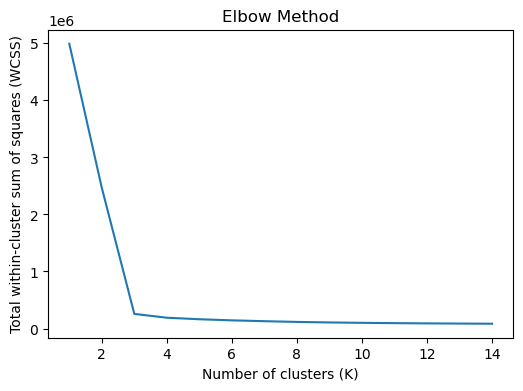

In [113]:
# Use the elbow method to determine the optimal number of clusters

# Compute the WCSS for different values of K
# For 10K+ records datasets, use 1 - 30 (or higher)

wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, random_state = 21)
    kmeans.fit(umap_results)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve

plt.figure(figsize = (6, 4))
plt.plot(range(1, 15), wcss)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Total within-cluster sum of squares (WCSS)')
plt.title('Elbow Method')
plt.show();

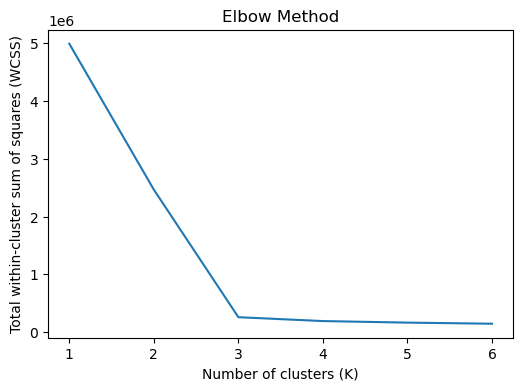

In [115]:
# Use the elbow method to determine the optimal number of clusters

# Compute the WCSS for different values of K
# For 10K+ records datasets, use 1 - 30 (or higher)

wcss = []

for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, random_state = 21)
    kmeans.fit(umap_results)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve

plt.figure(figsize = (6, 4))
plt.plot(range(1, 7), wcss)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Total within-cluster sum of squares (WCSS)')
plt.title('Elbow Method')
plt.show();                 

The optimal number of clusters according to this plot is around three or four (more likely three). I'll run K-Means with both n_clusters = 3 and n_clusters = 4.

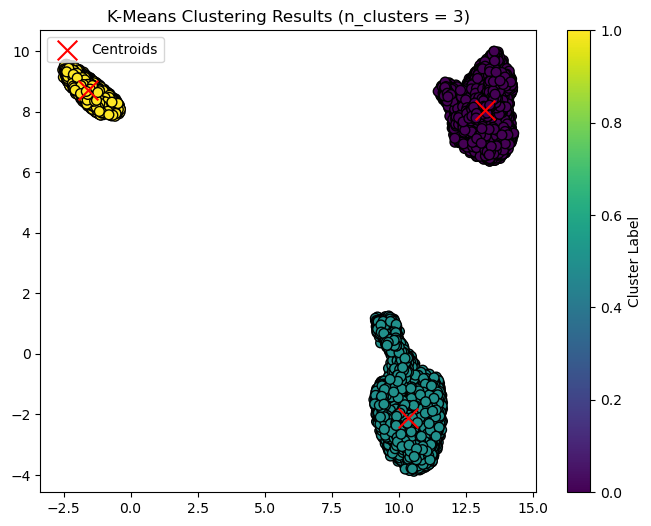

In [117]:
# Run k-means by setting n_clusters = 3

# Defining the k-means

kmeans = KMeans(n_clusters = 3, random_state = 21)

#Fit the model

kmeans.fit(umap_results)

# Plot the clusters
plt.figure(figsize = (8, 6))
plt.scatter(umap_results[:, 0], umap_results[:, 1], c = kmeans.labels_, cmap = 'viridis',
            marker = 'o', edgecolor = 'k', s = 50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker = 'x', s = 200, c = 'red', label = 'Centroids')
plt.title('K-Means Clustering Results (n_clusters = 3)')
plt.colorbar(label = 'Cluster Label')
plt.legend()
plt.show();

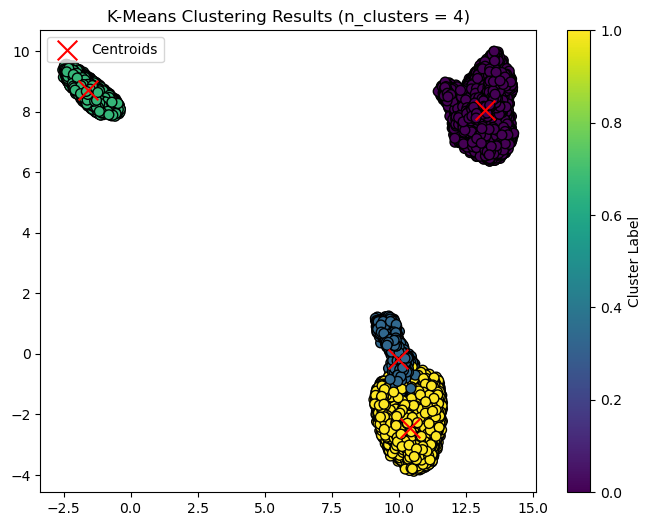

In [119]:
# Run k-means by setting n_clusters = 4

# Defining the k-means

kmeans = KMeans(n_clusters = 4, random_state = 21)

#Fit the model

kmeans.fit(umap_results)

# Plot the clusters
plt.figure(figsize = (8, 6))
plt.scatter(umap_results[:, 0], umap_results[:, 1], c = kmeans.labels_, cmap = 'viridis',
            marker = 'o', edgecolor = 'k', s = 50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker = 'x', s = 200, c = 'red', label = 'Centroids')
plt.title('K-Means Clustering Results (n_clusters = 4)')
plt.colorbar(label = 'Cluster Label')
plt.legend()
plt.show();

In [121]:
# Get predicted clusters
# These can also function as cluster labels

pred_k3 = KMeans(n_clusters = 3, random_state = 21).fit_predict(umap_results)
pred_k4 = KMeans(n_clusters = 4, random_state = 21).fit_predict(umap_results)

# Print Silhouette Coefficient

print('Silhouette Coefficient for k-means 3 clusters: {}'.format(
    metrics.silhouette_score(umap_results, pred_k3, metric = 'euclidean')))
print('Silhouette Coefficient for k-means 4 clusters: {}'.format(
    metrics.silhouette_score(umap_results, pred_k4, metric = 'euclidean')))

# Print Davies-Bouldin Index

print('Davies-Bouldin Index for k-means 3 clusters: {}'.format(
    metrics.davies_bouldin_score(umap_results, pred_k3)))
print('Davies-Bouldin Index for k-means 4 clusters: {}'.format(
    metrics.davies_bouldin_score(umap_results, pred_k4)))

# Print Calinski-Harabasz Index 
# aka Variance Ratio Criterion

print('Calinski-Harabasz Index for k-means 3 clusters: {}'.format(
    metrics.calinski_harabasz_score(umap_results, pred_k3)))
print('Calinski-Harabasz Index for k-means 4 clusters: {}'.format(
    metrics.calinski_harabasz_score(umap_results, pred_k4)))
                                                                    

Silhouette Coefficient for k-means 3 clusters: 0.811898946762085
Silhouette Coefficient for k-means 4 clusters: 0.6614366173744202
Davies-Bouldin Index for k-means 3 clusters: 0.25251017173576373
Davies-Bouldin Index for k-means 4 clusters: 0.506488354433981
Calinski-Harabasz Index for k-means 3 clusters: 615542.1262766493
Calinski-Harabasz Index for k-means 4 clusters: 563572.6252214407


|k-means w/n_clusters | Silhouette Coefficient | DBI | CHI |
| :-- | :--: | :--: | :--: |
| 3 | 0.811898946762085| 0.25251017173576373 | 615542.1262766493 |
| 4 | 0.6614699363708496 | 0.5063204921265101 | 563572.6181809291|

K-means on UMAP-reduced data produce excellent Silhouette Coefficients! K-means with n_clusters = 3 is the better clustering solution based on the following metrics (when compared to n_clusters = 4 metrics):  
* Silhouette Coefficient is higher 
* DBI is lower
* CHI is higher

According to these evaluation metrics, k-means appears to produce three fairly dense and well-separated clusters from the UMAP-reduced dataset. 

**What's in the green cluster?**

This one cluster appears to meet the three prerequisites of k-means, so I'll attempt to see which features are in Cluster 2. Please note that this approach wasn't taught in the course; rather, it's a self-directed attempt to interpret cluster information in terms of individual features (not just components).

In [123]:
# Convert UMAP components to a DataFrame

umap_df = pd.DataFrame(umap_results, columns = ['UMAP1', 'UMAP2', 'UMAP3', 'UMAP4', 'UMAP5',
                                               'UMAP6', 'UMAP7', 'UMAP8', 'UMAP9', 'UMAP10'])

# Add UMAP components to the DataFrame
# Make a copy of the orignal clean_df

clean_w_umap_df = clean_train_df.copy()
clean_w_umap_df['UMAP1'] = umap_df['UMAP1']
clean_w_umap_df['UMAP2'] = umap_df['UMAP2']
clean_w_umap_df['UMAP3'] = umap_df['UMAP3']
clean_w_umap_df['UMAP4'] = umap_df['UMAP4']
clean_w_umap_df['UMAP5'] = umap_df['UMAP5']
clean_w_umap_df['UMAP6'] = umap_df['UMAP6']
clean_w_umap_df['UMAP7'] = umap_df['UMAP7']
clean_w_umap_df['UMAP8'] = umap_df['UMAP8']
clean_w_umap_df['UMAP9'] = umap_df['UMAP9']
clean_w_umap_df['UMAP10'] = umap_df['UMAP10']

clean_w_umap_df.head()
                

hospital_death       age       bmi  elective_surgery    height  \
0               0  0.225835 -0.824716                 0  0.985646   
1               0  0.902910 -0.040881                 0 -0.907263   
2               0 -1.892412  0.531210                 0  0.255232   
3               0  1.221723 -0.842106                 1 -0.449047   
5               0  0.155199 -0.020805                 0  1.975384   

   pre_icu_los_days  readmission_status    weight  apache_2_diagnosis  \
0          0.644690                   0 -0.299687           -0.887759   
1          0.925566                   0 -0.484455           -1.057332   
2         -2.454705                   0  0.590014           -0.615888   
3         -2.454705                   0 -0.954578            0.678503   
5         -2.454705                   0  0.754259            1.255155   

   apache_3j_diagnosis  ...      UMAP1     UMAP2      UMAP3     UMAP4  \
0             0.232840  ...  -0.665382  8.360671   7.508447  4.089794   
1            -0.750772  ...   9.344462 -1.595695  11.905702  2.010514   
2             0.626071  ...  11.051287 -2.922099  12.305796  1.147728   
3             1.280023  ...  13.770492  7.393836  10.354888  3.009449   
5            -0.015897  ...  10.712475 -3.279910  12.496626  0.941820   

       UMAP5     UMAP6     UMAP7     UMAP8     UMAP9    UMAP10  
0   5.971881  4.116341 -0.180923  5.383119  5.629251  5.105026  
1  10.018328  2.258198  4.931208  3.931896  7.779593  7.593613  
2   9.999152  3.237922  4.886384  3.321155  8.948996  6.709462  
3  10.652354  5.061512  5.079247  0.679534  5.189726  1.425754  
5   9.608003  2.206067  5.702750  3.095141  8.474321  5.914167  

[5 rows x 77 columns]

In [125]:
# Add the cluster assignments to the DataFrame

clean_w_umap_df['cluster'] = cluster_assignments

clean_w_umap_df.head()

NameError: name 'cluster_assignments' is not defined

Unfortunately there isn't a straightforward way for me to see what features are in each UMAP component and subsequently see which features are contributing most to the formation of Cluster 2. 

One thing I could do to increase visibility and interpretability in the contribution of features to a cluster is revisit the "clustering base model" above. In the clustering base model, I used K-Means to cluster the original 66 features. The Silhouette Coefficient was very close to zero, but if the scores were better, I could

1. Perform K-Means clustering on the original features with the optimal number of clusters
   * This assigns cluster labels to the data points
2. Add the cluster assignments/labels as a new feature in the DataFrame
3. Group the features by their cluster labels to form new features
4. Use these groupd features as a new feature set in a new clustering algorithm

Perhaps if the resultant Silhouette Coefficient from running k-means on the original 66 features (non-UMAP reduced data) were more positive/not nearly zero, I would feel more confident pursuing this approach to see which features were dominant in each resultant cluster.


### Hierarchical clustering
*Aims to build a hierarchy of clusters that can be visualized using a dendrogram*

Agglomerative clustering is a "Bottom-up" approach. It starts with each data point as its own cluster then iteratively merges the two closest clusters until all data points are in a single cluster. Linkage criterion (e.g., Complete, Average, or Ward) is used to determine the distance between clusters. Thus the hierarchy is built by successively merging smaller clusters into larger ones.  The dendrogram is a tree-like diagram that visualizes the hierarchy of clusters.

**Linkage methods**
1. Ward
   * Clusters are cohesive inside and differentiated from other groups
   * Tends to find clusters of similar size
   * Works only with euclidean distance
2. Complete
   * Links clusters using their most dissimilar data points
   * Clusters tend to be composed of highly similar observations, resulting in quite compact clusters
3. Average
    * Links clusters using their centroids
    * Tends to create larger groups than the Complete method
    * Clusters can be different sizes and shape when compared to Ward method
  
Hierarchical clustering is a **popular clustering technique** for the following reasons:

* Does not require the number of clusters to be specified upfront
* Builds a hierarchy of clusters that can be visualized using a dendrogram
* Dendrogram visualization helps you understand the relationships between clusters snd identify the appropriate number of clusters for the data
* More robust to outliers and noise compared to other clustering algorithms
* Helpful when the clusters have complex shapes or when the data has a hierarchical nature

I think this dataset is appropriate for Hierarchical clustering, so I am eager to see how many clusters are produced.

In [127]:
X = clean_train_df.drop(['hospital_death'], axis = 1)

# Run UMAP with best_params
import umap

umap_results = umap.UMAP(random_state = 21,
                n_components = 10, 
                n_neighbors = 100,
                min_dist = 0.5,
                metric = 'cosine').fit_transform(X)

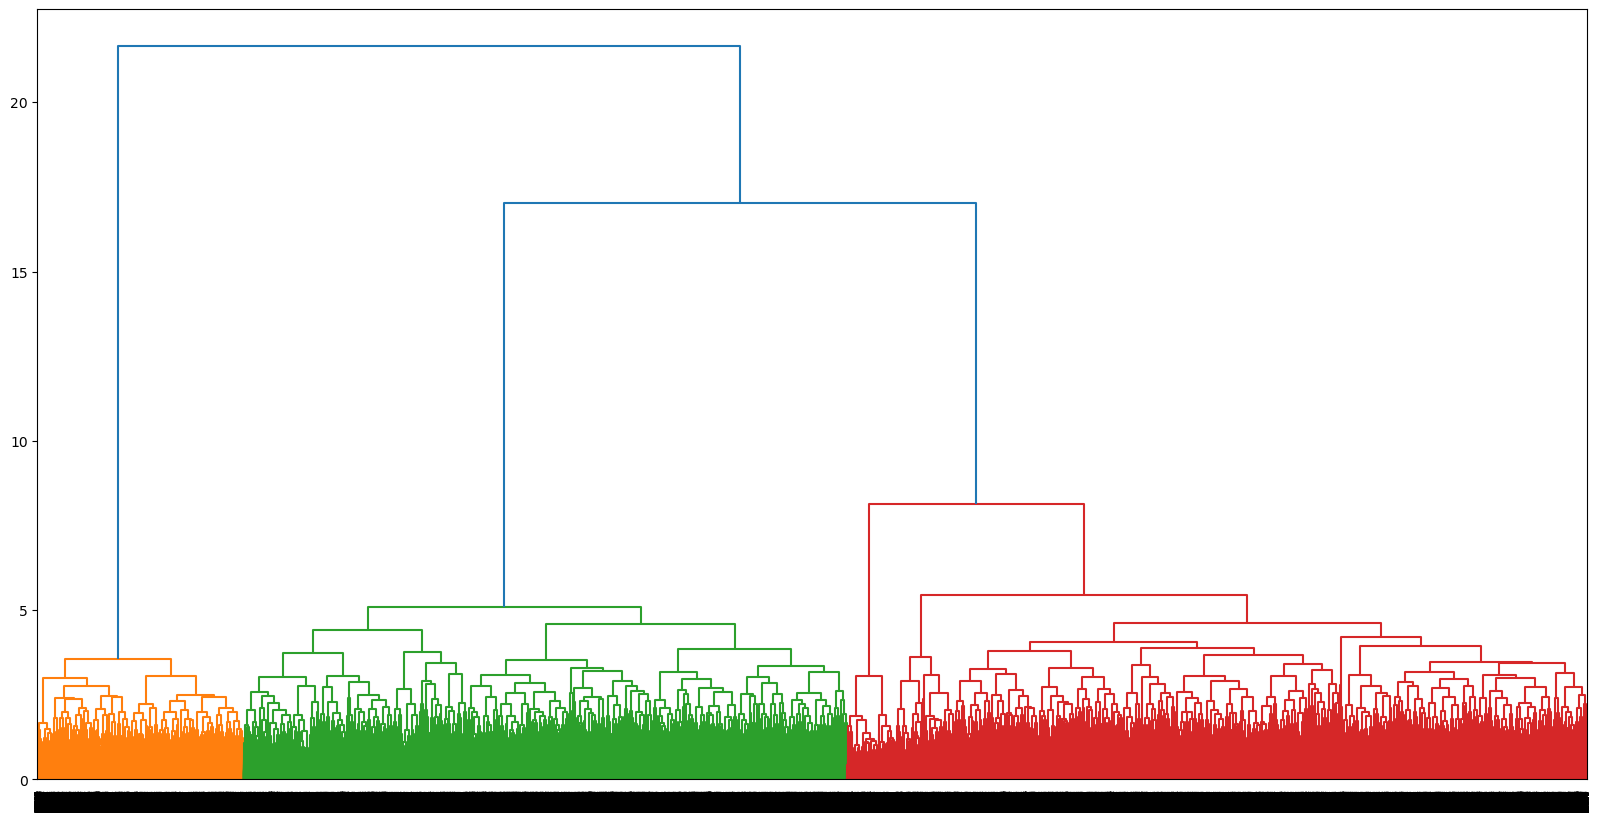

In [129]:
# Sketch the dendrogram using the Complete linkage method

plt.figure(figsize = (20, 10))
dendrogram(linkage(umap_results, method = 'complete'))
plt.show();

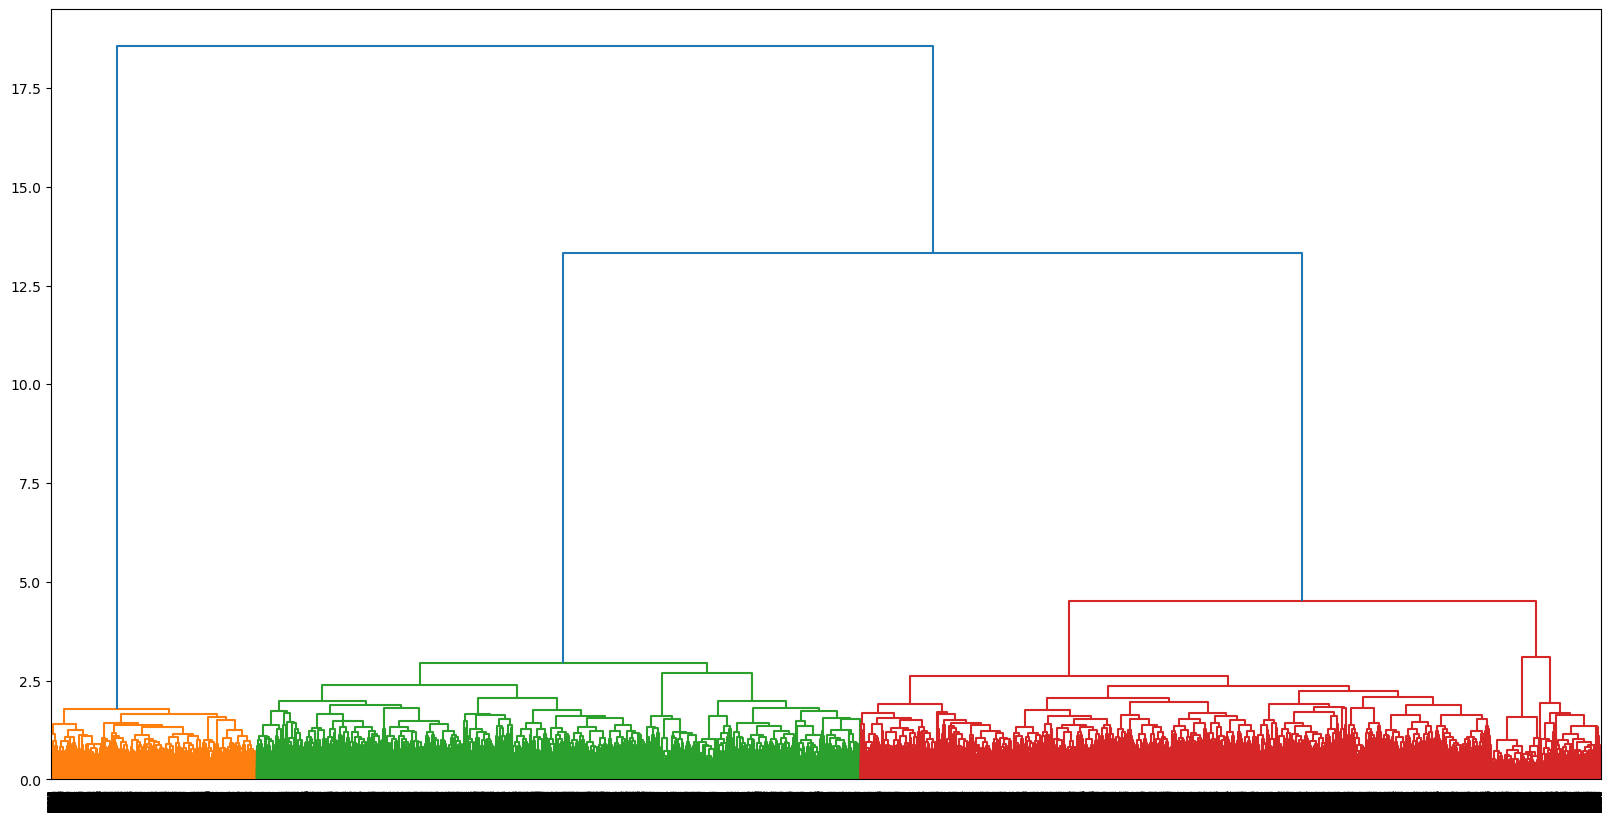

In [131]:
# Sketch the dendrogram using the Average linkage method

plt.figure(figsize = (20, 10))
dendrogram(linkage(umap_results, method = 'average'))
plt.show();

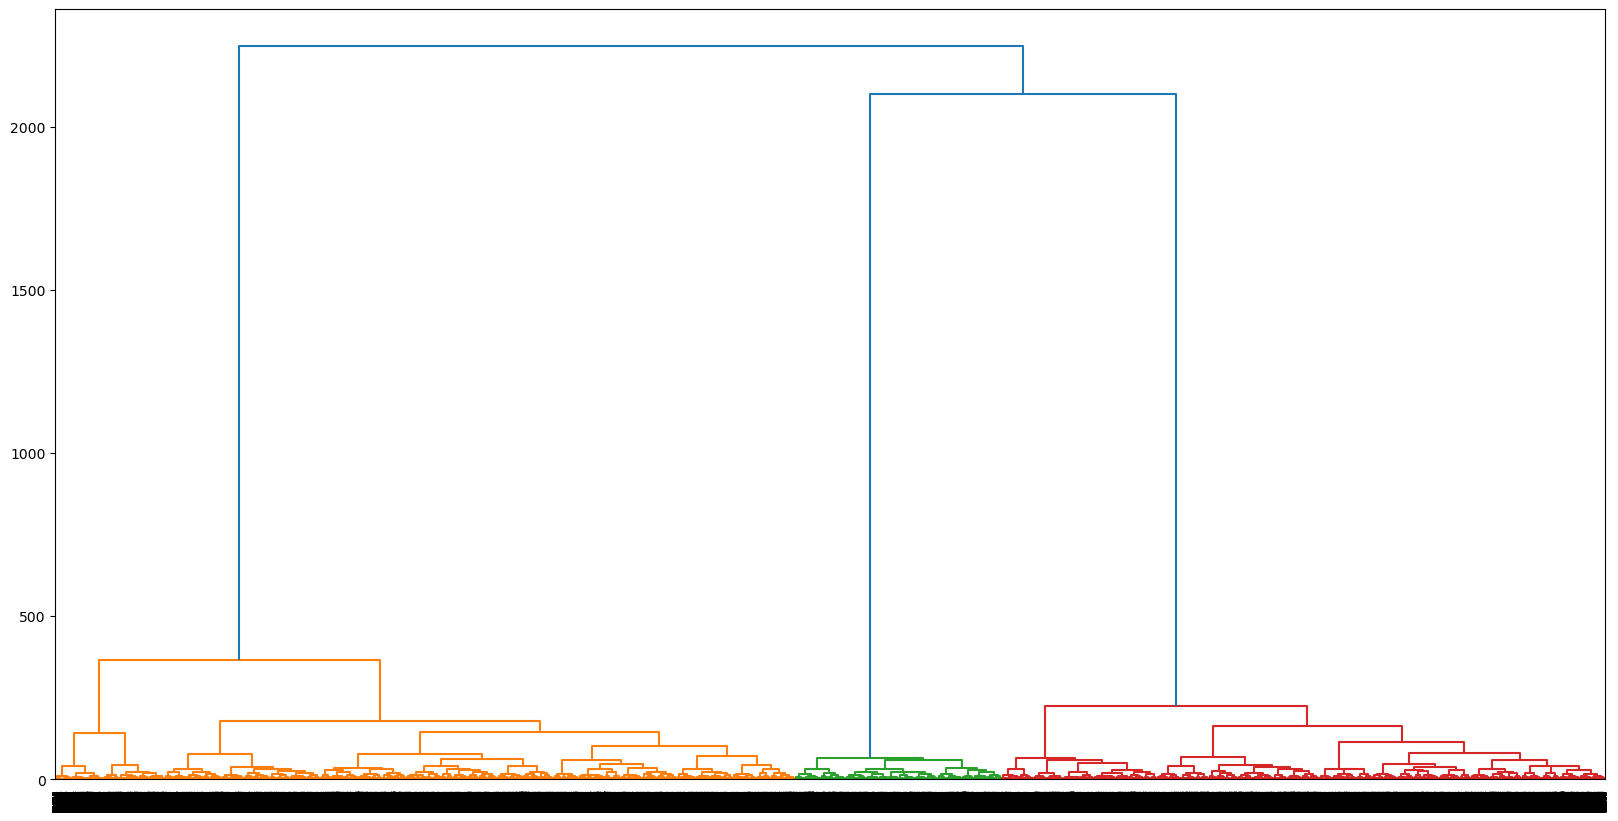

In [133]:
# Sketch the dendrogram using the Ward linkage method

plt.figure(figsize = (20, 10))
dendrogram(linkage(umap_results, method = 'ward'))
plt.show();

In [135]:
# Define the agglomerative clustering

agg_cluster_c = AgglomerativeClustering(linkage = 'complete',
                                      affinity = 'cosine',
                                      n_clusters = 3)

agg_cluster_a = AgglomerativeClustering(linkage = 'average',
                                      affinity = 'cosine',
                                      n_clusters = 3)

agg_cluster_w = AgglomerativeClustering(linkage = 'ward',
                                      affinity = 'euclidean',
                                      n_clusters = 3)

# Fit model and predict clusters

clusters_c = agg_cluster_c.fit_predict(umap_results)
clusters_a = agg_cluster_a.fit_predict(umap_results)
clusters_w = agg_cluster_w.fit_predict(umap_results)

# Get the Silhouette Score of each agglomerative clustering approach

print('Silhouette Score of the Complete agglomerative clustering solution: {}'
      .format(metrics.silhouette_score(umap_results, clusters_c, metric = 'euclidean')))
print('Silhouette Score of the Average agglomerative clustering solution: {}'
      .format(metrics.silhouette_score(umap_results, clusters_a, metric = 'euclidean')))
print('Silhouette Score of the Ward agglomerative clustering solution: {}'
      .format(metrics.silhouette_score(umap_results, clusters_w, metric = 'euclidean')))

# Print Davies-Bouldin Index of each agglomerative clustering approach

print('Davies-Bouldin Index of the Complete agglomerative clustering solution: {}'
      .format(metrics.davies_bouldin_score(umap_results, clusters_c)))
print('Davies-Bouldin Index of the Average agglomerative clustering solution: {}'
      .format(metrics.davies_bouldin_score(umap_results, clusters_a)))
print('Davies-Bouldin Index of the Ward agglomerative clustering solution: {}'
      .format(metrics.davies_bouldin_score(umap_results, clusters_w)))

# Print Calinski-Harabasz Index of each agglomerative clustering approach
# aka Variance Ratio Criterion

print('Calinski-Harabasz Index of the Complete agglomerative clustering solution: {}'
      .format(metrics.calinski_harabasz_score(umap_results, clusters_c)))
print('Calinski-Harabasz Index of the Average agglomerative clustering solution: {}'
      .format(metrics.calinski_harabasz_score(umap_results, clusters_a)))
print('Calinski-Harabasz Index of the Ward agglomerative clustering solution: {}'
      .format(metrics.calinski_harabasz_score(umap_results, clusters_w)))

Silhouette Score of the Complete agglomerative clustering solution: 0.811898946762085
Silhouette Score of the Average agglomerative clustering solution: 0.811898946762085
Silhouette Score of the Ward agglomerative clustering solution: 0.811898946762085
Davies-Bouldin Index of the Complete agglomerative clustering solution: 0.2525101717357637
Davies-Bouldin Index of the Average agglomerative clustering solution: 0.2525101717357637
Davies-Bouldin Index of the Ward agglomerative clustering solution: 0.25251017173576373
Calinski-Harabasz Index of the Complete agglomerative clustering solution: 615542.1262766493
Calinski-Harabasz Index of the Average agglomerative clustering solution: 615542.1262766493
Calinski-Harabasz Index of the Ward agglomerative clustering solution: 615542.1262766493


Hierachical Clustering also produced three clusters. The dendrogram of each linkage method shows three clusters total with two clusters (green and red) being more closely related to each other than the third (orange). The orange standalone cluster is unrelated to the green and red clusters.

Interestingly, the Silhouette Score, DBI and CHI from the Hierachical clustering algorithms are identical to those of k-means clustering algorithm. Note that [these particular evaluation metrics are not suitable for comparing across clustering methods](https://support.sas.com/resources/papers/proceedings19/3409-2019.pdf). The Silhouette Score, DBI, and CHI of all different linkage methods being identical is also peculiar, as the dendrograms show different distances between the three linkage methods. 

(Note: I've tried several troubleshooting methods to see if there was an error in my code that caused these peculiar results, but these results remained consistent throughout all troubleshooting efforts.)

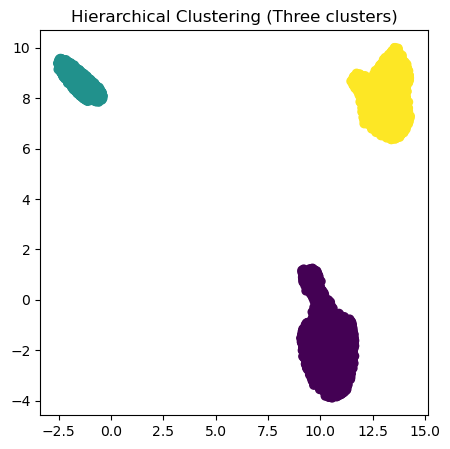

In [137]:
# Plot the resulting clusters

plt.figure(figsize = (5, 5))
plt.scatter(umap_results[:, 0], umap_results[:, 1], c = clusters_a, cmap = 'viridis')
plt.title('Hierarchical Clustering (Three clusters)')
plt.show();

The performance metrics are excellent (i.e., Excellent Silhouette Score, very low DBI, very high CHI), so I would like to "see" which features are most important in forming these three distinct clusters. (Again, this was not taught in the program, so I'm trying to figure it out and learn on my own.) In order to see which features are most important in forming these clusters, I need to

1. Add the cluster label/assignment as a new feature to the DataFrame
2. Train a Supervised Learning Classification model
    * X = all features except 'cluster']
    * y = 'cluster'
    * Need to use a classifier that includes feature importance 
3. Get Feature Importances

I want to I'm not 100% sure that these efforts are correct, so I won't optimize hyperparameters. *The goal is to see clusters and understand relationships in the data, so I need to be able to interpret cluster information in terms of individual features (not just components)*. I'm eager to see if this works and what I learn about these clusters!

#### Use Random Forest to see what features are most important in determining clusters 

In [139]:
# Add cluster labels/assignments to the DataFrame 
# so that I can try to "see" which features are
# most important in forming these three clusters

# Make a copy of the dataframe so that
# the original clean_train_df isn't altered

hc_df = clean_train_df.copy()
hc_df = hc_df.drop(['hospital_death'], axis = 1)

# Call the hierachical clustering on umap_results (above)
# and get cluster_labels

cluster_labels = clusters_a

# Add cluster labels to the DataFrame

hc_df['cluster'] = cluster_labels

# Group the dataframe by the cluster labels

clusters = hc_df.groupby('cluster')

# Check the header of the new hierarchical 
# clustering DataFrame (hc_df)

hc_df.head()

age       bmi  elective_surgery    height  pre_icu_los_days  \
0  0.225835 -0.824716                 0  0.985646          0.644690   
1  0.902910 -0.040881                 0 -0.907263          0.925566   
2 -1.892412  0.531210                 0  0.255232         -2.454705   
3  1.221723 -0.842106                 1 -0.449047         -2.454705   
5  0.155199 -0.020805                 0  1.975384         -2.454705   

   readmission_status    weight  apache_2_diagnosis  apache_3j_diagnosis  \
0                   0 -0.299687           -0.887759             0.232840   
1                   0 -0.484455           -1.057332            -0.750772   
2                   0  0.590014           -0.615888             0.626071   
3                   0 -0.954578            0.678503             1.280023   
5                   0  0.754259            1.255155            -0.015897   

   apache_post_operative  ...  lymphoma  solid_tumor_with_metastasis  \
0                      0  ...       0.0                          0.0   
1                      0  ...       0.0                          0.0   
2                      0  ...       0.0                          0.0   
3                      1  ...       0.0                          0.0   
5                      0  ...       0.0                          0.0   

   ethnicity  gender  icu_admit_source  icu_stay_type  icu_type  \
0          2       1                 1              0         2   
1          2       0                 1              0         5   
2          2       0                 0              0         5   
3          2       0                 2              0         2   
5          2       1                 0              0         5   

   apache_3j_bodysystem  apache_2_bodysystem  cluster  
0                     9                    0        1  
1                     8                    6        0  
2                     5                    3        0  
3                     0                    0        2  
5                     7                    4        0  

[5 rows x 67 columns]

In [141]:
# Identify the most important 20 features that distinguish the clusters

from sklearn.ensemble import RandomForestClassifier

X = hc_df.drop(['cluster'], axis = 1)
y = hc_df['cluster']


# Train a Random Forest classifier

rf = RandomForestClassifier(n_estimators = 100, random_state=21)
rf.fit(X, y)

# Make predictions

y_pred = rf.predict(X)

# Get feature importances

feature_importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by feature importance
feature_importance_df = feature_importance_df.sort_values(by = 'importance', ascending = False)

# Get the top 20 most important features
top_20_features = feature_importance_df.head(20)

print("Top 20 most important features in distinguishing the clusters:")
print(top_20_features)


Top 20 most important features in distinguishing the clusters:
                     feature  importance
65       apache_2_bodysystem    0.359267
64      apache_3j_bodysystem    0.271635
8        apache_3j_diagnosis    0.176272
7         apache_2_diagnosis    0.100150
63                  icu_type    0.012535
9      apache_post_operative    0.009671
61          icu_admit_source    0.005964
50              h1_sysbp_min    0.005204
2           elective_surgery    0.005108
49              h1_sysbp_max    0.003834
14         gcs_verbal_apache    0.003721
44          h1_heartrate_min    0.003310
0                        age    0.002872
11           gcs_eyes_apache    0.002834
42             h1_diasbp_min    0.002525
39               d1_temp_max    0.002487
36              d1_sysbp_min    0.002351
26          d1_heartrate_min    0.002349
20         ventilated_apache    0.002014
38  d1_sysbp_noninvasive_min    0.001689


**Plot RFC Feature Importance**

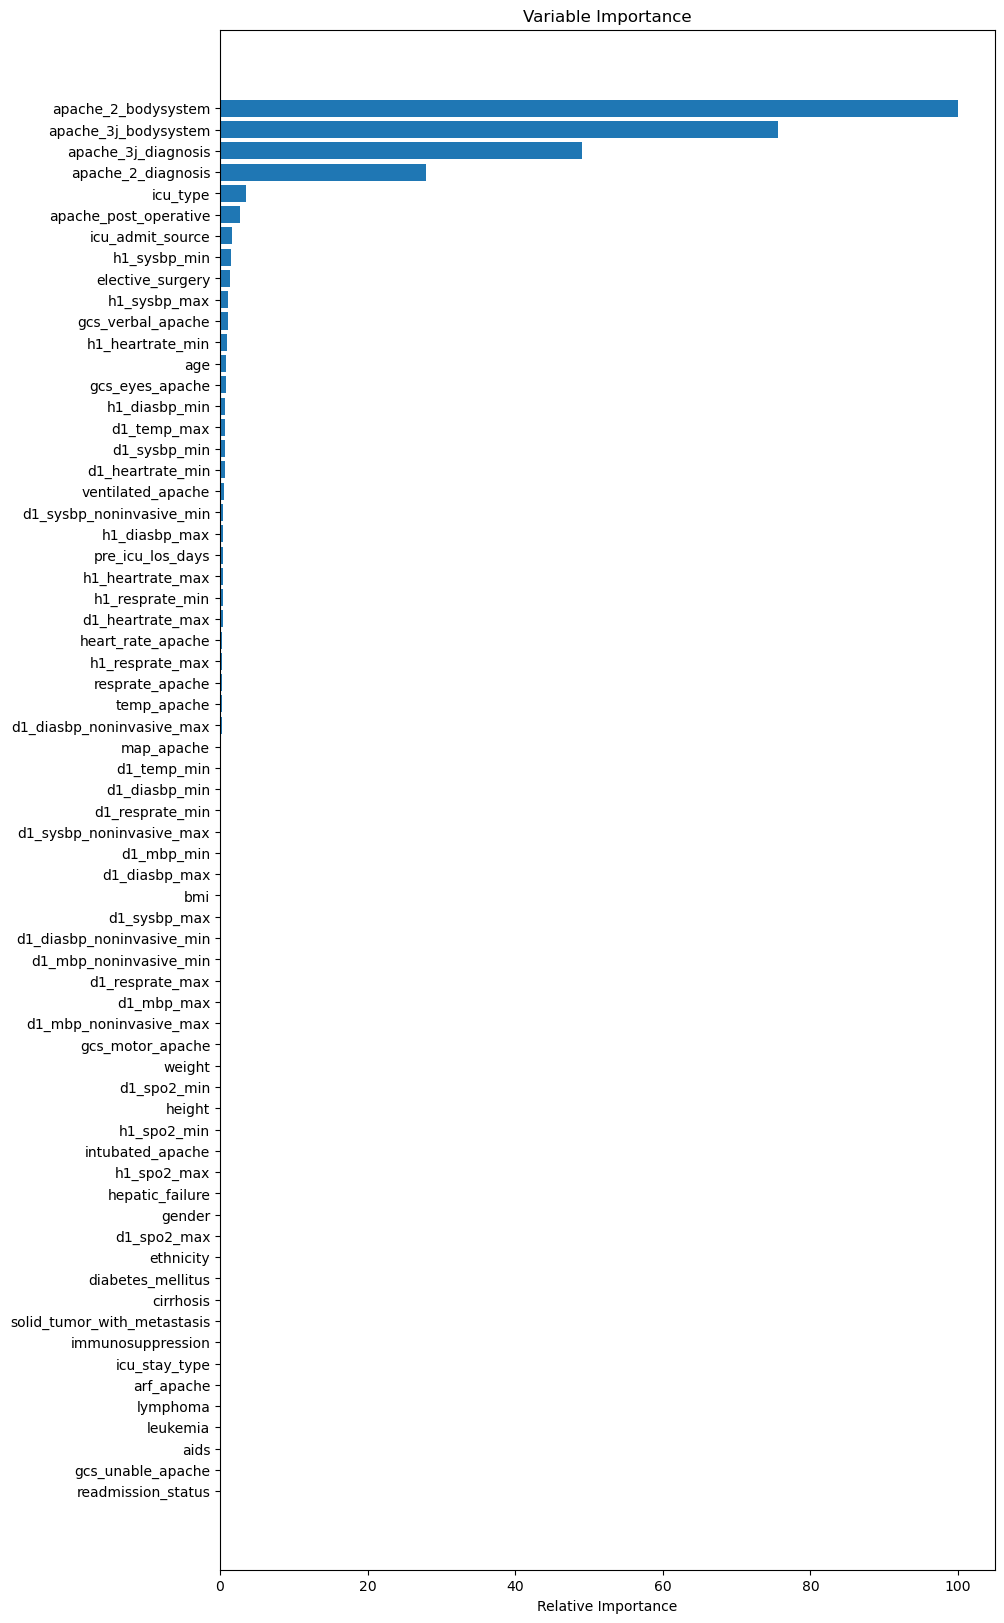

In [143]:
# Make importances relative to max importance

feature_importances = 100.0 * (feature_importances / feature_importances.max())

# Sort the indices of feature importances (array) in ascending order (low to high)
# argsort() is a function in NumPy that returns the indices that would sort an array

sorted_idx = np.argsort(feature_importances)

# Create an array of positions for plotting that are offset by 0.5
# arange() is a function in NumPy that returns an array of evenly spaced values within a given range

pos = np.arange(sorted_idx.shape[0]) + 0.5

# Plot the feature importance

plt.figure(figsize = (10, 20))
plt.barh(pos, feature_importances[sorted_idx], align = 'center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show();

In [145]:
# Get the top 35 most important features

top_35_features = feature_importance_df.head(35)

print("Top 35 most important features in distinguishing the clusters:")
print(top_35_features)


Top 35 most important features in distinguishing the clusters:
                      feature  importance
65        apache_2_bodysystem    0.359267
64       apache_3j_bodysystem    0.271635
8         apache_3j_diagnosis    0.176272
7          apache_2_diagnosis    0.100150
63                   icu_type    0.012535
9       apache_post_operative    0.009671
61           icu_admit_source    0.005964
50               h1_sysbp_min    0.005204
2            elective_surgery    0.005108
49               h1_sysbp_max    0.003834
14          gcs_verbal_apache    0.003721
44           h1_heartrate_min    0.003310
0                         age    0.002872
11            gcs_eyes_apache    0.002834
42              h1_diasbp_min    0.002525
39                d1_temp_max    0.002487
36               d1_sysbp_min    0.002351
26           d1_heartrate_min    0.002349
20          ventilated_apache    0.002014
38   d1_sysbp_noninvasive_min    0.001689
41              h1_diasbp_max    0.001596
4            

#### Try Gradient Boost Classifier

In [147]:
# Identify the most important 20 features that distinguish the clusters

from sklearn import ensemble

X = hc_df.drop(['cluster'], axis = 1)
y = hc_df['cluster']


# Train a Random Forest classifier

gbc = ensemble.GradientBoostingClassifier(random_state=21)
gbc.fit(X, y)

# Make predictions

y_pred = gbc.predict(X)

# Print the Accuracy Score

print('Accuracy Score of Gradient Boost Classifier: {:.3f}'.format(gbc.score(X, y)))

# Get feature importances

feature_importances = gbc.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df2 = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by feature importance
feature_importance_df2 = feature_importance_df2.sort_values(by = 'importance', ascending = False)

# Get the top 20 most important features
top_20_features = feature_importance_df2.head(20)

print("Top 20 most important features in distinguishing the clusters:")
print(top_20_features)


Accuracy Score of Gradient Boost Classifier: 1.000
Top 20 most important features in distinguishing the clusters:
                      feature  importance
64       apache_3j_bodysystem    0.495689
65        apache_2_bodysystem    0.451354
8         apache_3j_diagnosis    0.032947
7          apache_2_diagnosis    0.019784
63                   icu_type    0.000071
30     d1_mbp_noninvasive_min    0.000014
50               h1_sysbp_min    0.000014
45            h1_resprate_max    0.000014
21              d1_diasbp_max    0.000013
23  d1_diasbp_noninvasive_max    0.000012
17                 map_apache    0.000012
42              h1_diasbp_min    0.000010
28                 d1_mbp_min    0.000009
18            resprate_apache    0.000009
1                         bmi    0.000007
24  d1_diasbp_noninvasive_min    0.000006
31            d1_resprate_max    0.000005
33                d1_spo2_max    0.000004
36               d1_sysbp_min    0.000004
46            h1_resprate_min    0.000004


In [149]:
hc_df.cluster.value_counts()

cluster
0    31812
2    25943
1     8876
Name: count, dtype: int64

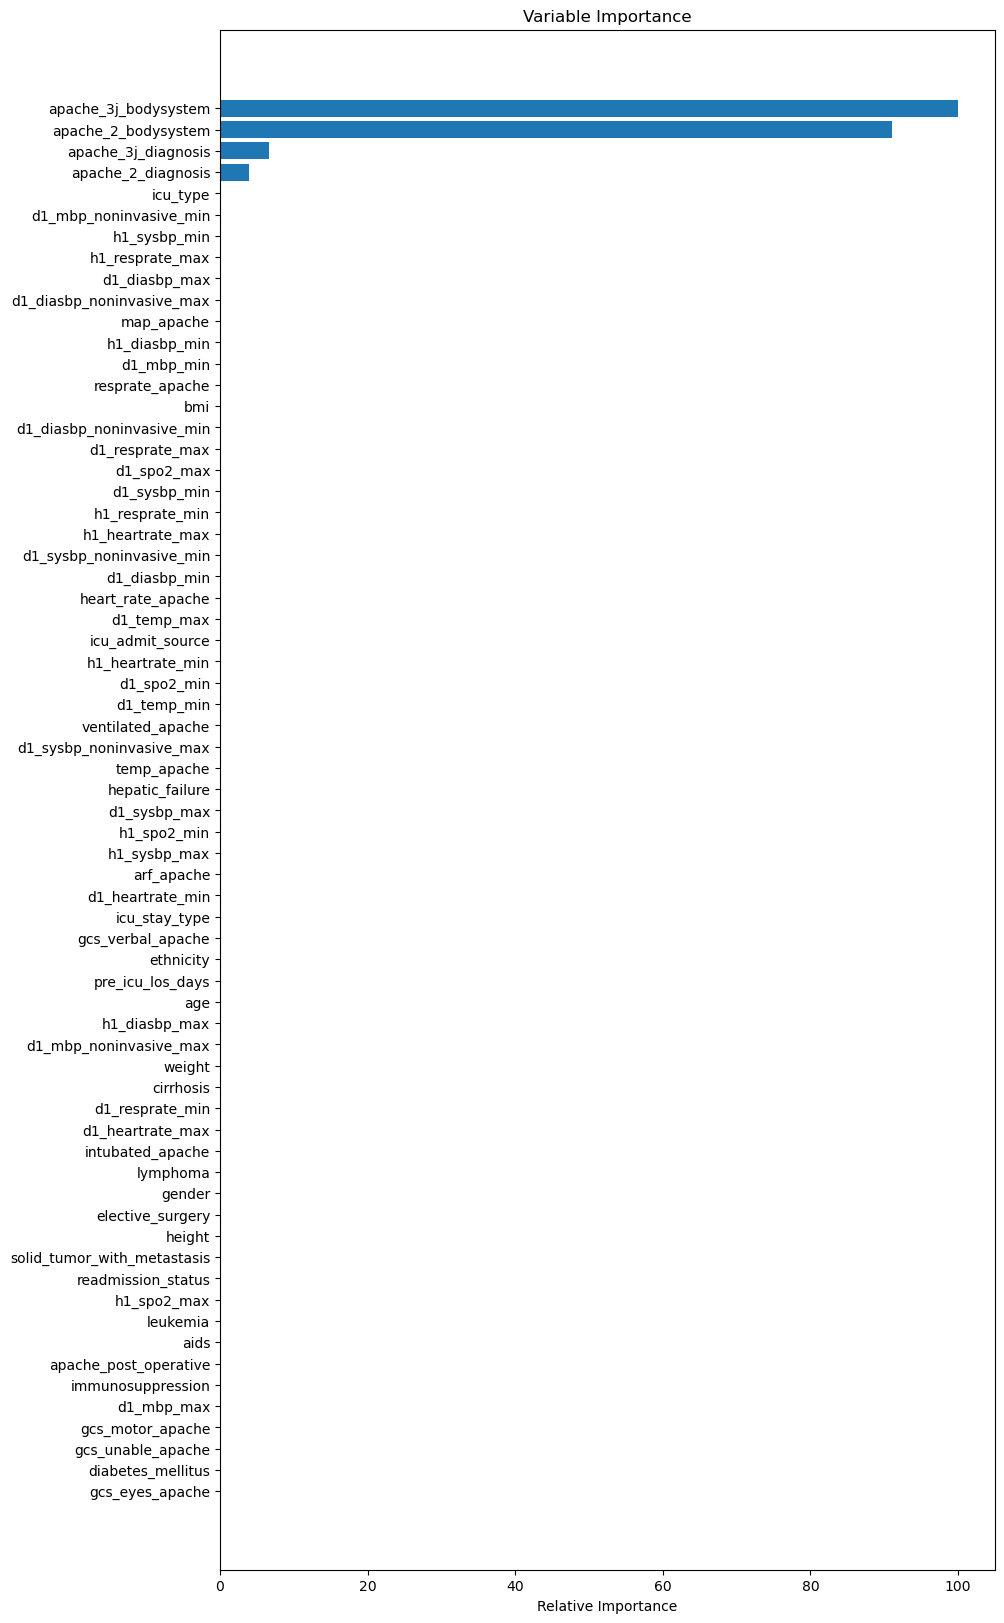

In [151]:
# Plot GBC Feature Importance

# Make importances relative to max importance

feature_importances = 100.0 * (feature_importances / feature_importances.max())

# Sort the indices of feature importances (array) in ascending order (low to high)
# argsort() is a function in NumPy that returns the indices that would sort an array

sorted_idx = np.argsort(feature_importances)

# Create an array of positions for plotting that are offset by 0.5
# arange() is a function in NumPy that returns an array of evenly spaced values within a given range

pos = np.arange(sorted_idx.shape[0]) + 0.5

# Plot the feature importance

plt.figure(figsize = (10, 20))
plt.barh(pos, feature_importances[sorted_idx], align = 'center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show();

### Density-Based Spatial Clustering (DBSCAN)

*Identifies clusters based on the density of data points in the feature space. **Density** refers to the concentration and closeness of the data points in a cluster. DBSCAN divides the observations into subgroups of high-density regions.*

*Two main parameters*
* ε (epsilon): The radius of the neighborhood around a data point
* minPts: The minimum number of points required in the neighborhood for a data point to be considered a core point (i.e., part of a cluster)

In [153]:
X = clean_train_df.drop(['hospital_death'], axis = 1)

# Run UMAP with best_params
import umap

umap_results = umap.UMAP(random_state = 21,
                n_components = 10, 
                n_neighbors = 100,
                min_dist = 0.5,
                metric = 'cosine').fit_transform(X)

**Use a k-NN distance plot to determine the best value for epsilon**

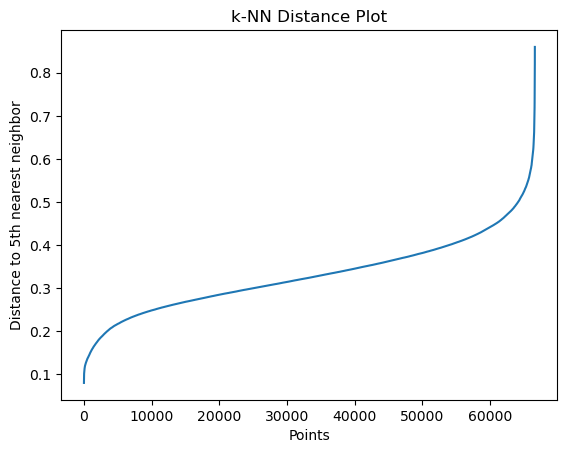

In [155]:
# Determine epsilon using a k-NN distance plot
# https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
# n_neighbors = 2 * 66 (number of original features)
from sklearn.neighbors import NearestNeighbors

# Fit Nearest Neighbors model

neighbors = NearestNeighbors(n_neighbors=132)
nearest_neighbors = neighbors.fit(umap_results)
distances, indices = nearest_neighbors.kneighbors(umap_results)

# Sort the distances by ascending value 

distances = np.sort(distances[:, 4], axis=0)

# Plot the distances

plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 5th nearest neighbor')
plt.title('k-NN Distance Plot')
plt.show();

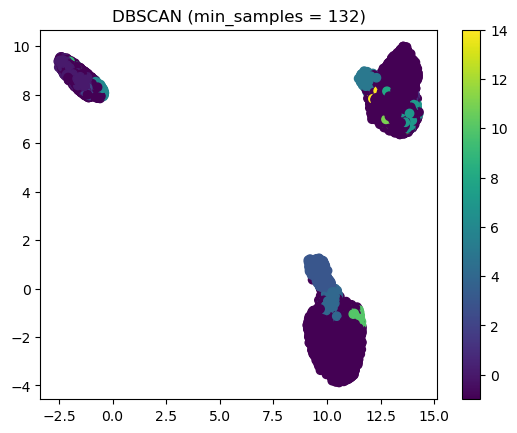

Silhouette Score of the DBSCAN clustering solution (min_samples = 132): -0.5622051954269409
Davies-Bouldin Index of the DBSCAN clustering solution (min_samples = 132): 1.443905782697506
Calinski-Harabasz Index of the DBSCAN clustering solution (min_samples = 132): 1966.0885465768977


In [157]:
# Define the agglomerative clustering (DBSCAN)
# eps is epsilon
# min_samples is minPts
# If your data has more than 2 dimensions, choose MinPts = 2*dim
# where dim = dimensions of data
# https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

dbscan_cluster = DBSCAN(eps = 0.5, min_samples = 132)

# Fit model and predict clusters

clusters = dbscan_cluster.fit_predict(umap_results)

# Visualize DBSCAN results in UMAP space

plt.scatter(umap_results[:, 0], umap_results[:, 1], c = clusters, cmap = 'viridis')
plt.title('DBSCAN (min_samples = 132)')
plt.colorbar()
plt.show();

# Get the Silhouette Score

print('Silhouette Score of the DBSCAN clustering solution (min_samples = 132): {}'
      .format(metrics.silhouette_score(umap_results, clusters, metric = 'euclidean')))

# Print Davies-Bouldin Index

print('Davies-Bouldin Index of the DBSCAN clustering solution (min_samples = 132): {}'
      .format(metrics.davies_bouldin_score(umap_results, clusters)))

# Print Calinski-Harabasz Index 
# aka Variance Ratio Criterion

print('Calinski-Harabasz Index of the DBSCAN clustering solution (min_samples = 132): {}'
      .format(metrics.calinski_harabasz_score(umap_results, clusters)))

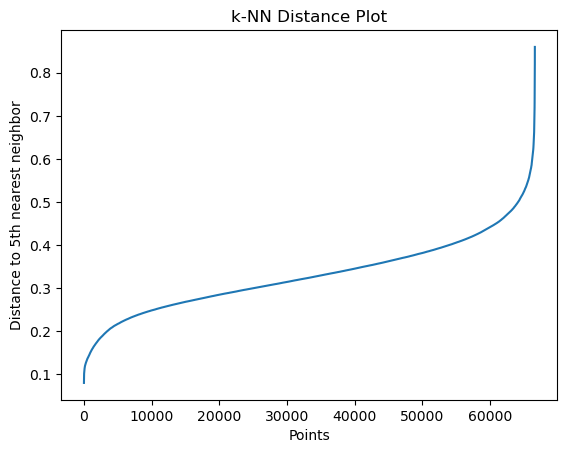

In [158]:
# Determine epsilon using a k-NN distance plot
# https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
# n_neighbors = 20 (2 * number of UMAP components)
from sklearn.neighbors import NearestNeighbors

# Fit Nearest Neighbors model

neighbors = NearestNeighbors(n_neighbors = 20)
nearest_neighbors = neighbors.fit(umap_results)
distances, indices = nearest_neighbors.kneighbors(umap_results)

# Sort the distances by ascending value 

distances = np.sort(distances[:, 4], axis=0)

# Plot the distances

plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 5th nearest neighbor')
plt.title('k-NN Distance Plot')
plt.show();

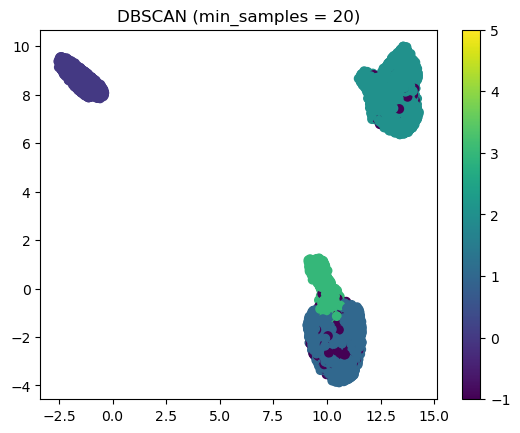

Silhouette Score of the DBSCAN clustering solution (min_samples = 20): 0.33320799469947815
Davies-Bouldin Index of the DBSCAN clustering solution (min_samples = 20): 1.546208466572874
Calinski-Harabasz Index of the DBSCAN clustering solution (min_samples = 20): 149513.39337468715


In [161]:
# Define the agglomerative clustering (DBSCAN)
# eps is epsilon
# min_samples is minPts
# I used min_samples = 20 (2 * n_components)

dbscan_cluster = DBSCAN(eps = 0.5, min_samples = 20)

# Fit model and predict clusters

clusters = dbscan_cluster.fit_predict(umap_results)

# Visualize DBSCAN results in UMAP space

plt.scatter(umap_results[:, 0], umap_results[:, 1], c = clusters, cmap = 'viridis')
plt.title('DBSCAN (min_samples = 20)')
plt.colorbar()
plt.show();

# Get the Silhouette Score

print('Silhouette Score of the DBSCAN clustering solution (min_samples = 20): {}'
      .format(metrics.silhouette_score(umap_results, clusters, metric = 'euclidean')))

# Print Davies-Bouldin Index

print('Davies-Bouldin Index of the DBSCAN clustering solution (min_samples = 20): {}'
      .format(metrics.davies_bouldin_score(umap_results, clusters)))

# Print Calinski-Harabasz Index 
# aka Variance Ratio Criterion

print('Calinski-Harabasz Index of the DBSCAN clustering solution (min_samples = 20): {}'
      .format(metrics.calinski_harabasz_score(umap_results, clusters)))

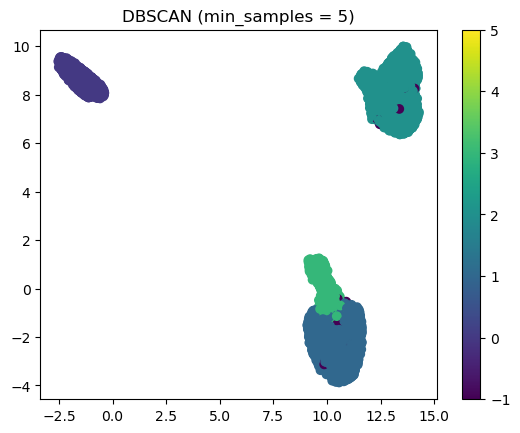

Silhouette Score of the DBSCAN clustering solution (min_samples = 5): 0.02698870562016964
Davies-Bouldin Index of the DBSCAN clustering solution (min_samples = 5): 1.7036814649273408
Calinski-Harabasz Index of the DBSCAN clustering solution (min_samples = 5): 241248.68502949923


In [163]:
# Define the agglomerative clustering (DBSCAN)
# eps is epsilon
# min_samples is minPts
# default min_samples is 5

dbscan_cluster = DBSCAN(eps = 0.5, min_samples = 5)

# Fit model and predict clusters

clusters = dbscan_cluster.fit_predict(umap_results)

# Visualize DBSCAN results in UMAP space

plt.scatter(umap_results[:, 0], umap_results[:, 1], c = clusters, cmap = 'viridis')
plt.title('DBSCAN (min_samples = 5)')
plt.colorbar()
plt.show();

# Get the Silhouette Score

print('Silhouette Score of the DBSCAN clustering solution (min_samples = 5): {}'
      .format(metrics.silhouette_score(umap_results, clusters, metric = 'euclidean')))

# Print Davies-Bouldin Index

print('Davies-Bouldin Index of the DBSCAN clustering solution (min_samples = 5): {}'
      .format(metrics.davies_bouldin_score(umap_results, clusters)))

# Print Calinski-Harabasz Index 
# aka Variance Ratio Criterion

print('Calinski-Harabasz Index of the DBSCAN clustering solution (min_samples = 5): {}'
      .format(metrics.calinski_harabasz_score(umap_results, clusters)))

| min_samples | Number of Clusters | Silhouette Coefficient | DBI | CHI |
| :--: | :--: | :--: | :--: | :--: |
| 132 | 15 | -0.5622051954269409 | 1.443905782697506 | 1966.0885465768977 |
| 20 | 7 | 0.33320799469947815 | 1.546208466572874 | 149513.39337468715 |
| 5 | 7 | 0.02698870562016964 | 1.7036814649273408 | 241248.68502949923 |

Results of a k-NN plot showed that the optimal epsilon value for this GMM clustering model was 0.5. Values for min_samples were chosen based on information [in this article](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd):

* 132 = 2 * 66 (original number of features)
* 20 = 2 * 10 (number of UMAP components)
* 5 (default value)

According to the Silhouette Coefficient results, the optimal number of min_samples is somewhere between 5 and 20. min_samples = 20 produced the highest Silhouette Coefficient; according to this, the optimal number of clusters is seven. The DBI and CHI results provide somewhat conflicting interpretations, as the highest silhouette score isn't accompanied by the lowest DBI and highest CHI. 

* Best Silhouette coefficient: min_samples = 20
* Best DBI: min_samples = 132
* Best CHI: min_samples = 5

I'm not sure if DBSCAN is the best clustering algorithm when considering the performance metrics collectively. Also, the highest Silhouette Coefficient produced for DBSCAN thus far is the lowest Silhouette Coefficient seen amongst the different clustering algorithms thus far. 

I want to see if the DBSCAN Silhouette Coefficient can be higher and more harmonized performance metrics. I will try different min_samples between 5 and 20, maybe one value above 25. 

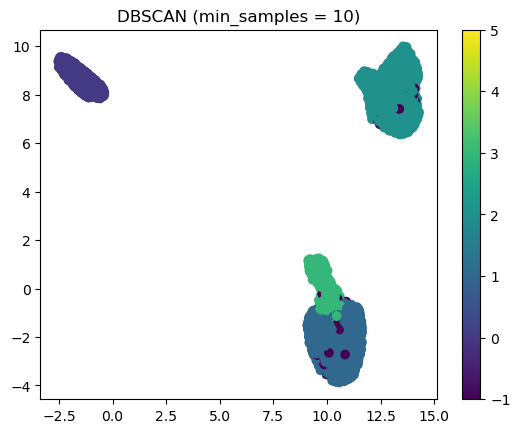

Silhouette Score of the DBSCAN clustering solution (min_samples = 10): 0.3417714834213257
Davies-Bouldin Index of the DBSCAN clustering solution (min_samples = 10): 1.5336927107463525
Calinski-Harabasz Index of the DBSCAN clustering solution (min_samples = 10): 209030.11910685268


In [165]:
# Define the agglomerative clustering (DBSCAN)
# eps is epsilon
# min_samples is minPts


dbscan_cluster = DBSCAN(eps = 0.5, min_samples = 10)

# Fit model and predict clusters

clusters = dbscan_cluster.fit_predict(umap_results)

# Visualize DBSCAN results in UMAP space

plt.scatter(umap_results[:, 0], umap_results[:, 1], c = clusters, cmap = 'viridis')
plt.title('DBSCAN (min_samples = 10)')
plt.colorbar()
plt.show();

# Get the Silhouette Score

print('Silhouette Score of the DBSCAN clustering solution (min_samples = 10): {}'
      .format(metrics.silhouette_score(umap_results, clusters, metric = 'euclidean')))

# Print Davies-Bouldin Index

print('Davies-Bouldin Index of the DBSCAN clustering solution (min_samples = 10): {}'
      .format(metrics.davies_bouldin_score(umap_results, clusters)))

# Print Calinski-Harabasz Index 
# aka Variance Ratio Criterion

print('Calinski-Harabasz Index of the DBSCAN clustering solution (min_samples = 10): {}'
      .format(metrics.calinski_harabasz_score(umap_results, clusters)))

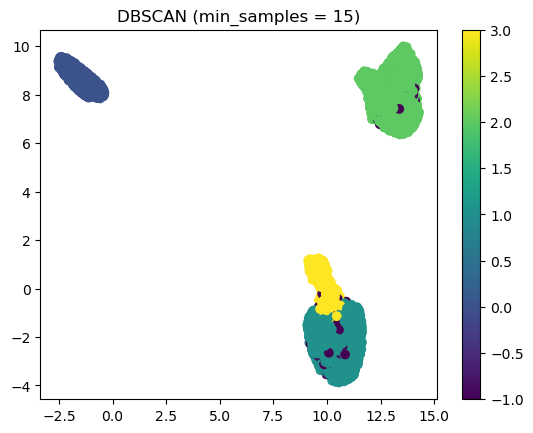

Silhouette Score of the DBSCAN clustering solution (min_samples = 15): 0.5997769236564636
Davies-Bouldin Index of the DBSCAN clustering solution (min_samples = 15): 1.5165248590206601
Calinski-Harabasz Index of the DBSCAN clustering solution (min_samples = 15): 270235.9889261402


In [167]:
# Define the agglomerative clustering (DBSCAN)
# eps is epsilon
# min_samples is minPts
# default min_samples is 5

dbscan_cluster = DBSCAN(eps = 0.5, min_samples = 15)

# Fit model and predict clusters

clusters = dbscan_cluster.fit_predict(umap_results)

# Visualize DBSCAN results in UMAP space

plt.scatter(umap_results[:, 0], umap_results[:, 1], c = clusters, cmap = 'viridis')
plt.title('DBSCAN (min_samples = 15)')
plt.colorbar()
plt.show();

# Get the Silhouette Score

print('Silhouette Score of the DBSCAN clustering solution (min_samples = 15): {}'
      .format(metrics.silhouette_score(umap_results, clusters, metric = 'euclidean')))

# Print Davies-Bouldin Index

print('Davies-Bouldin Index of the DBSCAN clustering solution (min_samples = 15): {}'
      .format(metrics.davies_bouldin_score(umap_results, clusters)))

# Print Calinski-Harabasz Index 
# aka Variance Ratio Criterion

print('Calinski-Harabasz Index of the DBSCAN clustering solution (min_samples = 15): {}'
      .format(metrics.calinski_harabasz_score(umap_results, clusters)))

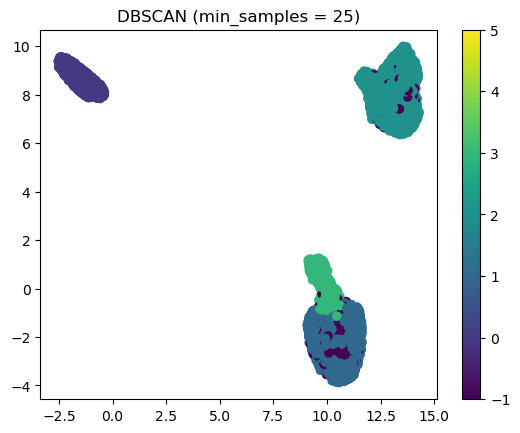

Silhouette Score of the DBSCAN clustering solution (min_samples = 25): 0.3298868238925934
Davies-Bouldin Index of the DBSCAN clustering solution (min_samples = 25): 1.5405499149778648
Calinski-Harabasz Index of the DBSCAN clustering solution (min_samples = 25): 121742.7725692713


In [169]:
# Define the agglomerative clustering (DBSCAN)
# eps is epsilon
# min_samples is minPts
# default min_samples is 5

dbscan_cluster = DBSCAN(eps = 0.5, min_samples = 25)

# Fit model and predict clusters

clusters = dbscan_cluster.fit_predict(umap_results)

# Visualize DBSCAN results in UMAP space

plt.scatter(umap_results[:, 0], umap_results[:, 1], c = clusters, cmap = 'viridis')
plt.title('DBSCAN (min_samples = 25)')
plt.colorbar()
plt.show();

# Get the Silhouette Score

print('Silhouette Score of the DBSCAN clustering solution (min_samples = 25): {}'
      .format(metrics.silhouette_score(umap_results, clusters, metric = 'euclidean')))

# Print Davies-Bouldin Index

print('Davies-Bouldin Index of the DBSCAN clustering solution (min_samples = 25): {}'
      .format(metrics.davies_bouldin_score(umap_results, clusters)))

# Print Calinski-Harabasz Index 
# aka Variance Ratio Criterion

print('Calinski-Harabasz Index of the DBSCAN clustering solution (min_samples = 25): {}'
      .format(metrics.calinski_harabasz_score(umap_results, clusters)))

| min_samples | Number of Clusters | Silhouette Coefficient | DBI | CHI |
| :--: | :--: | :--: | :--: | :--: |
| 132 | 15 | -0.5622051954269409 | 1.443905782697506 | 1966.0885465768977 |
| 20 | 7 | 0.33320799469947815 | 1.546208466572874 | 149513.39337468715 |
| 5 | 7 | 0.02698870562016964 | 1.7036814649273408 | 241248.68502949923 |
| 10 | 7 | 0.3417714834213257 | 1.5336927107463525 | 209030.11910685268 |
| 15 | 5 | 0.5997769236564636 | 1.5165248590206601 | 270235.9889261402 |
| 25 | 7 | 0.3298868238925934 | 1.5405499149778648 | 121742.7725692713 |

The optimal number of min_samples appears to be 15. DBSCAN with eps = 0.5 and min_samples = 15 yields the highest Silhouette Coefficient, second-lowest DBI, and highest CHI for this clustering algorithm (more harmonized performance metrics). Despite optimization, DBSCAN yields the lowest Silhouette Coefficient amongst the different clustering algorithms used so far. 

Although this Silhouette Coefficient is the lowest, I am interested to learn more about the clusters. DBSCAN is a popular clustering algorithm for the following reasons:

* Handles noise and outliers well
* Does not require the number of clusters to be specified upfront
* Identifies clusters with arbitraty shapes and sizes (doesn't assume spherical clusters like k-means)
* Efficiently handles large datasets

While DBSCAN produced a five-cluster solution (compared to the three-cluster solution produced by Hierarchical Clustering), I think DBSCAN is a suitable clustering method for this dataset. I am interested to see which features were prioritized in DBSCAN clustering and comparing these features with those that were prioritized in Hierarchical clustering. 

#### Use Gradient Boost Classifier to see what features are most important in determining clusters

In [171]:
# Add cluster labels/assignments to the DataFrame 
# so that I can try to "see" which features are
# most important in forming these three clusters

# Make a copy of the dataframe so that
# the original clean_train_df isn't altered

db_df = clean_train_df.copy()
db_df = db_df.drop(['hospital_death'], axis = 1)

# Call the DBSCAN on umap_results
# and get cluster_labels

dbscan = DBSCAN(eps = 0.5, min_samples = 15)
dbscan.fit_predict(umap_results)

labels = dbscan.labels_

# Add cluster labels to the DataFrame

db_df['cluster'] = labels

# Group the dataframe by the cluster labels

clusters = db_df.groupby('cluster')

# Check the header of the new hierarchical 
# clustering DataFrame (hc_df)

db_df.head()


age       bmi  elective_surgery    height  pre_icu_los_days  \
0  0.225835 -0.824716                 0  0.985646          0.644690   
1  0.902910 -0.040881                 0 -0.907263          0.925566   
2 -1.892412  0.531210                 0  0.255232         -2.454705   
3  1.221723 -0.842106                 1 -0.449047         -2.454705   
5  0.155199 -0.020805                 0  1.975384         -2.454705   

   readmission_status    weight  apache_2_diagnosis  apache_3j_diagnosis  \
0                   0 -0.299687           -0.887759             0.232840   
1                   0 -0.484455           -1.057332            -0.750772   
2                   0  0.590014           -0.615888             0.626071   
3                   0 -0.954578            0.678503             1.280023   
5                   0  0.754259            1.255155            -0.015897   

   apache_post_operative  ...  lymphoma  solid_tumor_with_metastasis  \
0                      0  ...       0.0                          0.0   
1                      0  ...       0.0                          0.0   
2                      0  ...       0.0                          0.0   
3                      1  ...       0.0                          0.0   
5                      0  ...       0.0                          0.0   

   ethnicity  gender  icu_admit_source  icu_stay_type  icu_type  \
0          2       1                 1              0         2   
1          2       0                 1              0         5   
2          2       0                 0              0         5   
3          2       0                 2              0         2   
5          2       1                 0              0         5   

   apache_3j_bodysystem  apache_2_bodysystem  cluster  
0                     9                    0        0  
1                     8                    6        1  
2                     5                    3        1  
3                     0                    0        2  
5                     7                    4        1  

[5 rows x 67 columns]

In [173]:
db_df.cluster.value_counts()

cluster
 2    25185
 1    25052
 0     8872
 3     4616
-1     2906
Name: count, dtype: int64

In [175]:
# Identify the most important 20 features that distinguish the clusters

from sklearn import ensemble

X = db_df.drop(['cluster'], axis = 1)
y = db_df['cluster']


# Train a Random Forest classifier

gbc = ensemble.GradientBoostingClassifier(random_state=21)
gbc.fit(X, y)

# Make predictions

y_pred = gbc.predict(X)

# Print the Accuracy Score

print('Accuracy Score of Gradient Boost Classifier: {:.3f}'.format(gbc.score(X, y)))

# Get feature importances

feature_importances = gbc.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df2 = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by feature importance
feature_importance_df2 = feature_importance_df2.sort_values(by = 'importance', ascending = False)

# Get the top 20 most important features
top_20_features = feature_importance_df2.head(20)

print("Top 20 most important features in distinguishing the clusters:")
print(top_20_features)


Accuracy Score of Gradient Boost Classifier: 0.960
Top 20 most important features in distinguishing the clusters:
                     feature  importance
64      apache_3j_bodysystem    0.531908
65       apache_2_bodysystem    0.316283
7         apache_2_diagnosis    0.091159
8        apache_3j_diagnosis    0.047746
61          icu_admit_source    0.001837
63                  icu_type    0.001362
14         gcs_verbal_apache    0.001304
11           gcs_eyes_apache    0.000988
12          gcs_motor_apache    0.000845
33               d1_spo2_max    0.000539
19               temp_apache    0.000465
31           d1_resprate_max    0.000413
9      apache_post_operative    0.000376
46           h1_resprate_min    0.000296
25          d1_heartrate_max    0.000275
30    d1_mbp_noninvasive_min    0.000264
44          h1_heartrate_min    0.000259
32           d1_resprate_min    0.000237
27                d1_mbp_max    0.000204
37  d1_sysbp_noninvasive_max    0.000196


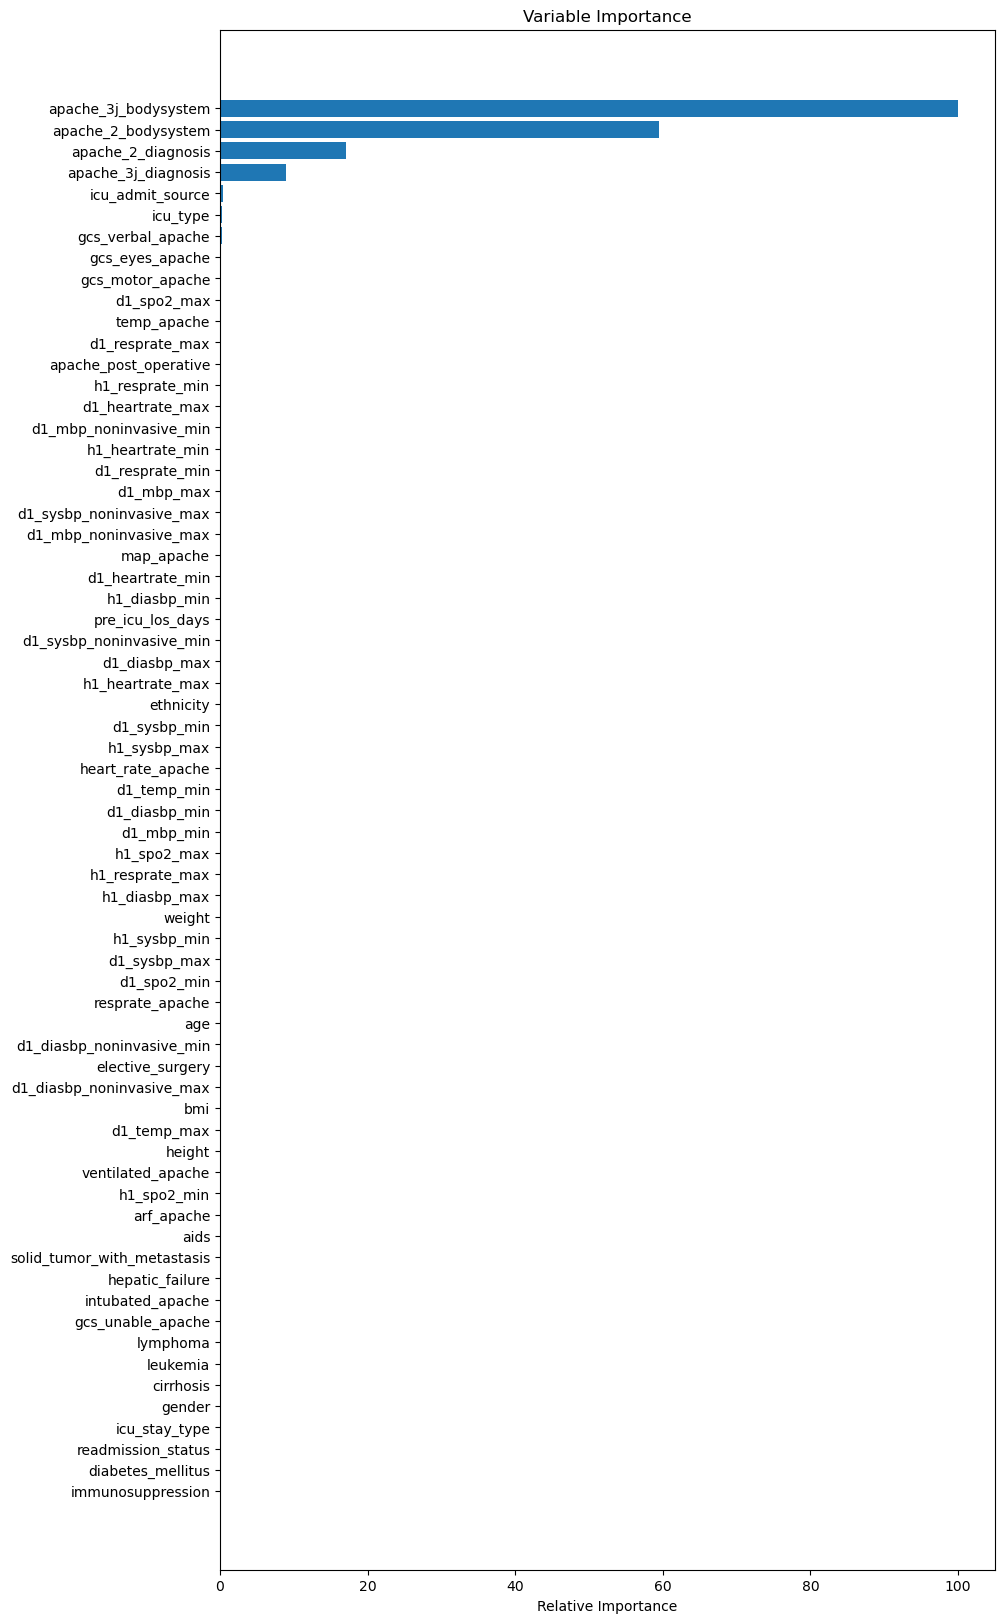

In [177]:
# Plot GBC Feature Importance

# Make importances relative to max importance

feature_importances = 100.0 * (feature_importances / feature_importances.max())

# Sort the indices of feature importances (array) in ascending order (low to high)
# argsort() is a function in NumPy that returns the indices that would sort an array

sorted_idx = np.argsort(feature_importances)

# Create an array of positions for plotting that are offset by 0.5
# arange() is a function in NumPy that returns an array of evenly spaced values within a given range

pos = np.arange(sorted_idx.shape[0]) + 0.5

# Plot the feature importance

plt.figure(figsize = (10, 20))
plt.barh(pos, feature_importances[sorted_idx], align = 'center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show();

### Gaussian Mixture Models (GMM)

*Aims to find the normal distributions that generated your data. The data are modeled as a mixture of the Gaussian distributions and the number of distributions is equal to the number of clusters in the data* 

**Two important assumptions of GMM**
1. There are k distributions that generate the data; this is equivalent to saying that there are exactly k clusters in the data
2. All of these k distributions are Gaussians

**If one of the assumptions fails to hold in your data then GMM may produce clusters that aren't useful**

In [179]:
X = clean_train_df.drop(['hospital_death'], axis = 1)

# Run UMAP with best_params
import umap

umap_results = umap.UMAP(random_state = 21,
                n_components = 10, 
                n_neighbors = 100,
                min_dist = 0.5,
                metric = 'cosine').fit_transform(X)

**Use BIC Score and Gradients of BIC Scores to determine n_components**

*Source: https://github.com/vlavorini/ClusterCardinality/blob/master/Cluster%20Cardinality.ipynb*

This dataset likely doesn't meet the assumptions of GMM, but I'll give it a try.

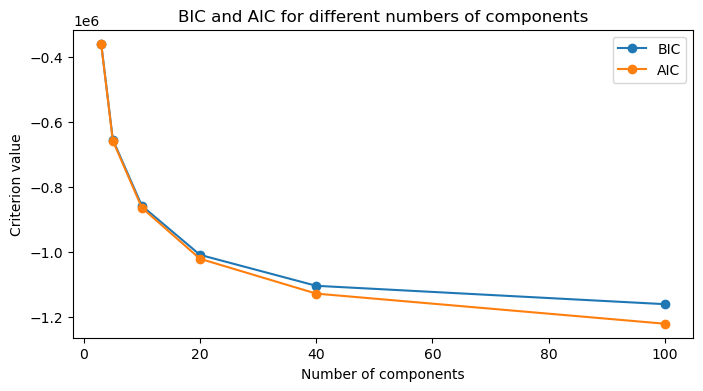

In [181]:
# Define the range for the number of components
n_components = [3, 5, 10, 20, 40, 100]

# Lists to store BIC and AIC values
bic = []
aic = []

# Fit GMM for each number of components and calculate BIC/AIC
for n in n_components:
    gmm = GaussianMixture(n_components = n, random_state = 21)
    gmm.fit(umap_results)
    bic.append(gmm.bic(umap_results))
    aic.append(gmm.aic(umap_results))

# Plot BIC and AIC
plt.figure(figsize=(8, 4))
plt.plot(n_components, bic, label = 'BIC', marker = 'o')
plt.plot(n_components, aic, label = 'AIC', marker = 'o')
plt.xlabel('Number of components')
plt.ylabel('Criterion value')
plt.legend()
plt.title('BIC and AIC for different numbers of components')
plt.show();

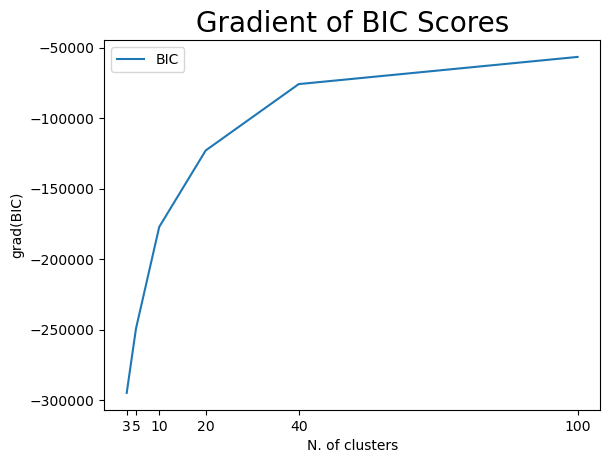

In [183]:
# Need to check the gradient of BICS

plt.errorbar(n_components, np.gradient(bic), label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_components)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()
plt.show();

The optimal number of clusters appears to be 20. Starting at around 40 clusters, the gradient becomes constant, so this technique suggests n_components = 20. 

Silhouette Score of the GMM solution: 0.1419675350189209
Davies-Bouldin Index of the GMM solution: 2.1119685835821214
Calinski-Harabasz Index of the GMM solution: 181205.8297189233


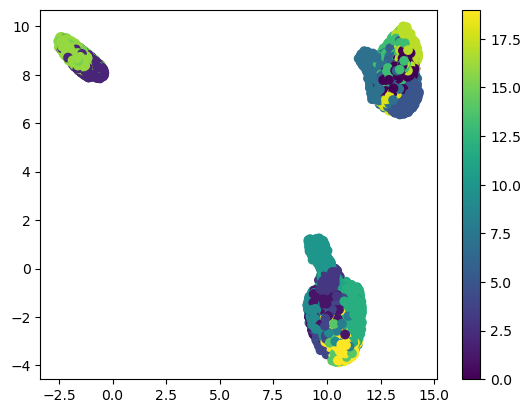

In [185]:
# Define a GaussianMixture object with n_components = 3
# two classes in the dataset

# Define the GMM clustering

gmm_cluster = GaussianMixture(n_components = 20, random_state = 21)

# Fit model

clusters = gmm_cluster.fit_predict(umap_results)

# Visualize GMM results in UMAP space

plt.scatter(umap_results[:, 0], umap_results[:, 1], c = clusters, cmap = 'viridis')
plt.colorbar()
plt.show;

# Get the Silhouette Scores of this solution

print('Silhouette Score of the GMM solution: {}'
      .format(metrics.silhouette_score(umap_results, clusters, metric = 'euclidean')))

# Print Davies-Bouldin Index

print('Davies-Bouldin Index of the GMM solution: {}'
      .format(metrics.davies_bouldin_score(umap_results, clusters)))

# Print Calinski-Harabasz Index 
# aka Variance Ratio Criterion

print('Calinski-Harabasz Index of the GMM solution: {}'
      .format(metrics.calinski_harabasz_score(umap_results, clusters)))

The performance metrics of GMM clustering are poor. The best DBSCAN Silhouette Score is the lowest amongst all the clustering techniques run on UMAP-reduced data. The DBI is also high and the CHI is low as well. GMM produced an 18-19 cluster solution and the validity of this solution is invalidated by the poor performance metrics. 

## Conclusions: Interpreting cluster information in terms of individual features

**Table I. The top 20 most important features in distinguishing clusters**:
| Clustering algorithm |Hierarchical Clustering | Hierarchical Clustering | DBSCAN |
| :-- | :--: | :--: | :--: |
| n-cluster solution | 3 | 3 | 5 |
| Supervised Learning Classifier | Random Forest | Gradient Boost | Gradient Boost |
| **Top 20 features** |
| | apache_2_bodysystem | apache_3j_bodysystem | apache_3j_bodysystem|
| | apache_3j_bodysystem | apache_2_bodysystem | apache_2_bodysystem |
| | apache_3j_diagnosis | apache_3j_diagnosis | apache_2_diagnosis |
| | apache_2_diagnosis | apache_2_diagnosis | apache_3j_diagnosis |
| | icu_type | icu_type | icu_admit_source |
| | apache_post_operative | d1_mbp_noninvasive_min | icu_type |
| | icu_admit_source | h1_sysbp_min | gcs_verbal_apache |
| | h1_sysbp_min | h1_resprate_max | gcs_eyes_apache |
| | elective_surgery | d1_diasbp_max | gcs_motor_apache |
| | h1_sysbp_max | d1_diasbp_noninvasive_max | d1_spo2_max |
| | gcs_verbal_apache| map_apache | temp_apache |
| | h1_heartrate_min | h1_diasbp_min | d1_resprate_max |
| | age | d1_mbp_min | apache_post_operative |
| | gcs_eyes_apache | resprate_apache | h1_resprate_min |
| | h1_diasbp_min | bmi | d1_heartrate_max |
| | d1_temp_max | d1_diasbp_noninvasive_min | d1_mbp_noninvasive_min |
| | d1_sysbp_min | d1_resprate_max | h1_heartrate_min |
| | d1_heartrate_min | d1_spo2_max | d1_resprate_min |
| | ventilated_apache | d1_sysbp_min | d1_mbp_max |
| | d1_sysbp_noninvasive_min | h1_resprate_min | d1_sysbp_noninvasive_max |

These three "Top 20" lists capture 37 of the 66 total features. This indicates that several features are present in at least two of these three lists. 

**Table II. Category and descriptions of the features that were in the three Top 20 lists**
| Category | Feature | Description |
|  :-- | :-- | :-- |
| **Demographic** |
| |age | The age of the patient on unit admission (years) |
| | bmi | The body mass index of the person on unit admission |
| | elective_surgery | Whether the patient was admitted to the hospital for an elective surgical operation |
| | icu_type | A classification which indicates the type of care the unit is capable of providing;<br>(Intensive care unit = ICU)<br>Med-Surg ICU<br>Medical ICU (MICU)<br>Neuro ICU<br>Cardiac Care Unit-Cardiothoracic ICU (CCU-CTICU)<br>Surgical ICU (SICU)<br>Cariac Surgery ICU (CSICU)<br>Cardiac ICU<br>CTICU|
| | icu_admit_source | The location of the patient prior to being admitted to the unit| 
| APACHE covariate | 
| |apache_post_operative | The APACHE operative status; 1 for post-operative, 0 for non-operative |
| | gcs_verbal_apache | The verbal component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score|
| | gcs_eyes_apache | The eye opening component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score|
| | ventilated_apache | Whether the patient was invasively ventilated at the time of the highest scoring arterial blood gas using the oxygenation scoring algorithm, including any mode of positive pressure ventilation delivered through a circuit attached to an endo-tracheal tube or tracheostomy|
| | map_apache | The mean arterial pressure measured during the first 24 hours which results in the highest APACHE III score|
| | resprate_apache | The respiratory rate measured during the first 24 hours which results in the highest APACHE III score (breaths per minute) |
| | gcs_motor_apache| The motor component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score |
| | temp_apache | The temperature measured during the first 24 hours which results in the highest APACHE III score| 
| | apache_2_diagnosis | The APACHE II diagnosis for the ICU admission |
| | apache_3j_diagnosis | The APACHE III-J sub-diagnosis code which best describes the reason for the ICU admission |
| **h1_ Vitals  <br>(during the first hour of their unit stay)** | 
| |h1_sysbp_min | The patient's lowest systolic blood pressure during the first hour of their unit stay, either non-invasively or invasively measured|
| | h1_sysbp_max | The patient's highest systolic blood pressure |
| | h1_heartrate_min | The patient's lowest heart rate (beats per minute) |
| | h1_diasbp_min | The patient's lowest diastolic blood pressure  |
| | h1_resprate_max |The patient's highest respiratory rate (breaths per minute)|
| | h1_resprate_min | The patient's lowest respiratory rate (breaths per minute)|
| **d1_ Vitals <br>(during the first 24 hours of their unit stay)** | 
| |d1_temp_max | The patient's highest core temperature |
| | d1_sysbp_min |The patient's lowest systolic blood pressure, either invasively or non-invasively measured  |
| | d1_heartrate_min |The patient's lowest heart rate |
| | d1_sysbp_noninvasive_min | The patient's highest systolic blood pressure, non-invasively measured|
| | d1_mbp_noninvasive_min | The patient's highest mean blood pressure, non-invasively measured |
| | d1_diasbp_max |The patient's highest diastolic blood pressure, either invasively or non-invasively measured |
| | d1_mbp_min |The patient's lowest mean blood pressure, either invasively or non-invasively measured|
| | d1_diasbp_noninvasive_min | The patient's lowest diastolic blood pressure, non-invasively measured |
| | d1_resprate_max | The patient's highest respiratory rate |
| | d1_spo2_max | The patient's highest peripheral oxygen saturation |
| | d1_heartrate_max | The patient's highest heart rate |
| | d1_resprate_min | The patient's lowest respiratory rate |
| | d1_mbp_max | The patient's highest mean blood pressure, either invasively or non-invasively measured |
| | d1_sysbp_noninvasive_max | The patient's highest systolic blood pressure during the first 24 hours of their unit stay, invasively measured |
| **APACHE grouping** | 
| |apache_2_bodysystem | Admission diagnosis group for APACHE II; <br>Cardiovascular<br>Neurologic<br>Respiratory<br>Gastrointestinal<br>Metabolic<br>Trauma<br>Undefined diagnoses<br>Renal/Genitourinary<br>Haematologic<br>Undefined Diagnoses |
| | apache_3j_bodysystem | Admission diagnosis group for APACHE III;<br>Cardiovascular<br>Neurological<br>Sepsis<br>Respiratory<br>Gastrointestinal<br>Metabolic<br>Trauma<br>Genitourinary<br>Musculoskeletal/Skin<br>Hematological<br>Gynecological |



In [187]:
# Print out the common features

# Define the three lists of features

hc_rf = ['apache_2_bodysystem', 'apache_3j_bodysystem', 'apache_3j_diagnosis', 'apache_2_diagnosis', 'icu_type',
         'apache_post_operative', 'icu_admit_source', 'h1_sysbp_min', 'elective_surgery', 'h1_sysbp_max',
         'gcs_verbal_apache', 'h1_heartrate_min', 'age', 'gcs_eyes_apache', 'h1_diasbp_min',
         'd1_temp_max', 'd1_sysbp_min', 'd1_heartrate_min', 'ventilated_apache', 'd1_sysbp_noninvasive_min']
hc_gb = ['apache_3j_bodysystem', 'apache_2_bodysystem', 'apache_3j_diagnosis', 'apache_2_diagnosis', 'icu_type',
         'd1_mbp_noninvasive_min', 'h1_sysbp_min', 'h1_resprate_max', 'd1_diasbp_max', 'h1_sysbp_max', 
         'map_apache', 'h1_diasbp_min', 'apache_post_operative', 'resprate_apache', 'bmi',
         'd1_diasbp_noninvasive_min', 'd1_resprate_max', 'd1_spo2_max', 'd1_sysbp_min', 'h1_resprate_min']
db_gb = ['apache_3j_bodysystem', 'apache_2_bodysystem', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'icu_admit_source',
         'icu_type', 'gcs_verbal_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'd1_spo2_max',
         'temp_apache', 'd1_resprate_max ', 'apache_post_operative', 'h1_resprate_min', 'd1_heartrate_max',
         'd1_mbp_noninvasive_min', 'h1_heartrate_min', 'd1_resprate_min ', 'd1_mbp_max', 'd1_sysbp_noninvasive_max']

# Convert the lists to sets

hc_rf_set = set(hc_rf)
hc_gb_set = set(hc_gb)
db_gb_set = set(db_gb)

# Find the intersection of the three sets

common_features = hc_rf_set.intersection(hc_gb_set).intersection(db_gb_set)
common_features_hc = hc_rf_set.intersection(hc_gb_set)
common_features_gb = hc_gb_set.intersection(db_gb_set)
# Convert common_features back to list

lst_common_features = []
for feature in common_features:
    lst_common_features.append(feature)

lst_common_features_hc = []
for feature in common_features_hc:
    lst_common_features_hc.append(feature)

lst_common_features_gb = []
for feature in common_features_gb:
    lst_common_features_gb.append(feature)
    
# Print the common features of all three sets

print(f'There are {len(lst_common_features)} common features (present in all three "Top 20" lists)')
print('Common features in Top 20 features: ')
print(*lst_common_features, sep = '\n')

# Print the common features of the Hierarchical clustering algorithm
print('\n')
print(f'There are {len(lst_common_features_hc)} common features between the two classifiers used to get feature importance for the clusters formed in the Hierarchical clustering method')
print('Common features in Top 20 features of two classifiers used for Hierarchical Clustering solution: ')
print(*lst_common_features_hc, sep = '\n')

# Print the common features of the Gradient Boost classifiers
# Used in both hierarchical clustering and DBSCAN
print('\n')
print(f'There are {len(lst_common_features_gb)} common features between the Gradient Boost Classifers used to get feature importance for the clusters formed in the Hierarchical clustering and DBSCAN methods')
print('Common features in Top 20 features of two GB classifiers used for both clustering solutions: ')
print(*lst_common_features_gb, sep = '\n')

There are 6 common features (present in all three "Top 20" lists)
Common features in Top 20 features: 
apache_3j_diagnosis
apache_3j_bodysystem
icu_type
apache_2_diagnosis
apache_post_operative
apache_2_bodysystem


There are 10 common features between the two classifiers used to get feature importance for the clusters formed in the Hierarchical clustering method
Common features in Top 20 features of two classifiers used for Hierarchical Clustering solution: 
apache_3j_diagnosis
h1_diasbp_min
apache_3j_bodysystem
icu_type
apache_post_operative
apache_2_diagnosis
h1_sysbp_max
d1_sysbp_min
h1_sysbp_min
apache_2_bodysystem


There are 9 common features between the Gradient Boost Classifers used to get feature importance for the clusters formed in the Hierarchical clustering and DBSCAN methods
Common features in Top 20 features of two GB classifiers used for both clustering solutions: 
apache_3j_diagnosis
apache_3j_bodysystem
d1_spo2_max
icu_type
apache_post_operative
apache_2_diagnosis
d1

### Goal accomplished!

The goal of this effort was to see viable clusters and be able to interpret cluster information in terms of individual features--not just components or non-linear combinations--in order to gain an understanding of the relationships in the data. Frankly, I think these results are exciting (and very cool)!

The two clustering methods that were best suited for this dataset were Hierarchical clustering and DBSCAN; large, high-dimensional real-world datasets often don't meet all of the pre-requisites of K-Means or the asusmptions of GMM. Indeed the K-Means three-cluster solution showed that only one of the clusters met the pre-requisites of K-Means and the performance metrics of the optimized GMM solution were notably poor. 

Hierarchical clustering dendrograms from the three different linkage methods produced a consistent solution of three clusters. To determine the features that were most important in determining cluster formation, the cluster assignment of each data point was added to the DataFrame so that a supervised learning classifier could be built. Next, two supervised learning classifers were used to get feature importance information that determined cluster assignment/labeling. Between the two classifers used for the three-cluster solution (from the Hierarchical clustering algorithm), 10 out of the top 20 features were identical (see Table I above). These 10 features came from each of the five total categories of features (see Table II above). This was quite exciting, as I had hoped both the information within and structure of the data would produce a relatively comprehensive picture of the patient data--a cluster solution that was beyond a recapitulation of features from the same/single category. *Importantly, both classifiers used for the Hierarchical clustering data listed the same five features as the most important features*. **The 10 features that were most important in determining clustering in the Hierarchical clustering algorithm showed the following relationships**:

* *The type of ICU the patient was admitted to and both the admission diagnosis codes and admission diagnosis groups are important*
  * Different types of Critical Care Units provide different types of care:
      * (Intensive care unit = ICU)
      * Med-Surg ICU
      * Medical ICU (MICU)
      * Neuro ICU
      * Cardiac Care Unit-Cardiothoracic ICU (CCU-CTICU)
      * Surgical ICU (SICU)
      * Cardiac Surgery ICU (CSICU)
      * Cardiac ICU
      * CTICU
  * The diagnosis groups correspond to the body system treated in the ICU that the patient was admitted to
* *Blood Pressure measurements are important*
  * Both the highest and lowest systolic blood pressure measurements taken within the first hour of unit stay
  * The lowest diastolic blood pressure measurement taken within the first within the first hour of unit stay
  * The lowest systolic blood pressure measurement taken within the first 24 horus of unit stay
* *Whether or not the patient was post-operative was important*
    * Whether or not the patient was in the period following surgical operation

DBSCAN produced a five-cluster solution. The Gradient Boost model used for the results of the DBSCAN algorithm listed the same four featues as the most-important features: apache_3j_bodysystem, apache_2_bodysystem,apache_2_diagnosis, apache_3j_diagnosis (see Table I above). These were the top four features seen in the hierarchical clustering method as well. The only difference in the top five features from all three classifiers was icu_admmit_source (i.e., the location of the patient prior to being admitted to the unit). *In addition to the type of ICU type and the associated admitted diagnosis codes and admitted diagnosis groups*, **the top 10 features that were most important in determining clustering in DBSCAN showed the following relationships**:

* *The location of the patient prior to being admitted to the ICU is important*
* *Glasgow Coma Scale (Verbal, Eyes, and Motor components) measurements taken during the first 24 hours which results in the highest APACHE III score are important*
  * Assesses the patient's level of consciousness and neurological state
  * *(Source: https://medictests.com/units/glasgow-coma-score)*
  * "The Glasgow Coma Scale (GCS) describes an individual's level of consciousness. It is often used to gauge the severity of an acute brain injury due to trauma or medical reasons. The test is simple, reliable, and correlates well with outcomes following brain injury. It is composed of 3 domains, each assessed separately and given numerical scores. The sum of these scores is the Glasgow Coma Score."


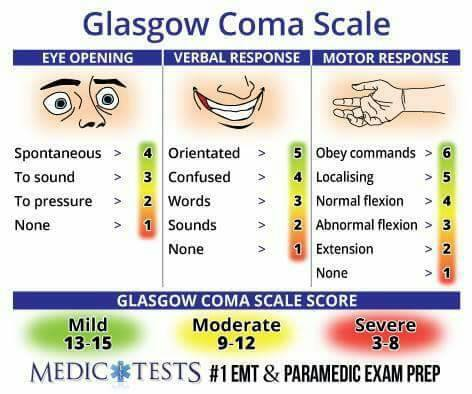

While I don't know the exact outcomes associated with each of the clusters in the 3- or 5-cluster solutions, I find the feature importance-results very exciting. I'm impressed by the similarity between all three lists (Table I). The top four features of all three "Top 20 features" lists are identical. For the Hierarchical clustering 3-cluster solution, patient vitals, specifically min and max blood pressure measurements, were important in determining cluster assignment/outcome. For the DBSCAN 5-cluster solution, patient's level of consciousness and neurological state were important in determining cluster assignment/outcome. 

Interestingly, vitals that were common throughout all three lists include:

* Blood pressure measurements
* Heart rate 
    * h1_heartrate_min
    * d1_heartrate_min & d1_heartrate_max
* Respiratory rate
    * d1_resprate_min & d1_resprate_max
* Peripheral oxygen saturation (d1_spo2_max)

What was very striking was that several types of blood pressure measurements were present in all three Top 20 lists (e.g., both systolic and diastolic, invasive and noninvasively measured, within the first hour and first 24 hours of the unit stay). Moreover, both min and max are present (e.g., h1_sysbp_min & h1_sysbp_max, d1_sysbp_noninvasive_min & d1_sysbp_noninvasive_max). I'm impressed that the these related min-max measurements were linked based on the data and found to be important in determining cluster assignment. 

The ground truth present in the data is 0 or 1, which translates to a two-cluster solution. However the clustering algorithms performed herein show that a 3- or 5-cluster solution fits this real-world dataset of ICU patients. The clustering algorithms that were best suited for this dataset primarily used ICU type, the associated ICU-admission diagnosis codes, and the associated ICU-admission diagnosis groups to determine cluster assignment. For the 3-cluster solution, patient blood pressure measurements and whether or not the patent was post-operative were also important in determining cluster assingment. For the 5-cluster solution, the location of patient prior to being admitted to the ICU and the patient's level of consciousness and neurological state were also important in determining cluster assignment. I think the clustering algorithms definitely detected a set of related features that logically and meaningfully characterize the patient.

## Follow-up: Centroid Analysis per Cluster

Using Ground Truth to bring the data full circle to survival and death rates

### Hierarchical Clustering: 3-cluster solution

In [189]:
hc_df.head()

age       bmi  elective_surgery    height  pre_icu_los_days  \
0  0.225835 -0.824716                 0  0.985646          0.644690   
1  0.902910 -0.040881                 0 -0.907263          0.925566   
2 -1.892412  0.531210                 0  0.255232         -2.454705   
3  1.221723 -0.842106                 1 -0.449047         -2.454705   
5  0.155199 -0.020805                 0  1.975384         -2.454705   

   readmission_status    weight  apache_2_diagnosis  apache_3j_diagnosis  \
0                   0 -0.299687           -0.887759             0.232840   
1                   0 -0.484455           -1.057332            -0.750772   
2                   0  0.590014           -0.615888             0.626071   
3                   0 -0.954578            0.678503             1.280023   
5                   0  0.754259            1.255155            -0.015897   

   apache_post_operative  ...  lymphoma  solid_tumor_with_metastasis  \
0                      0  ...       0.0                          0.0   
1                      0  ...       0.0                          0.0   
2                      0  ...       0.0                          0.0   
3                      1  ...       0.0                          0.0   
5                      0  ...       0.0                          0.0   

   ethnicity  gender  icu_admit_source  icu_stay_type  icu_type  \
0          2       1                 1              0         2   
1          2       0                 1              0         5   
2          2       0                 0              0         5   
3          2       0                 2              0         2   
5          2       1                 0              0         5   

   apache_3j_bodysystem  apache_2_bodysystem  cluster  
0                     9                    0        1  
1                     8                    6        0  
2                     5                    3        0  
3                     0                    0        2  
5                     7                    4        0  

[5 rows x 67 columns]

In [191]:
hc_df.cluster.value_counts()

cluster
0    31812
2    25943
1     8876
Name: count, dtype: int64

In [193]:
# 'hc_df' is dataset and 'cluster'is cluster label

# Step 1: Calculate the centroids for each cluster

centroids = hc_df.groupby('cluster').mean()

# Step 2: Calculate the overall mean for each feature across all data

overall_mean = hc_df.mean()

# Step 3: Calculate the absolute difference between each cluster's centroid and the overall mean

feature_importance_df_hc = pd.DataFrame()

for cluster_label in centroids.index:
    # Calculate the absolute difference between the cluster centroid and the overall mean
    
    feature_importance_df_hc[cluster_label] = (centroids.loc[cluster_label] - overall_mean).abs()

# Optional: Add a mean importance column to see the average importance across all clusters

feature_importance_df_hc['mean_importance'] = feature_importance_df_hc.mean(axis = 1)

# Sort the features by their mean importance

feature_importance_df_hc = feature_importance_df_hc.sort_values(by = 'mean_importance', ascending = False)

# Display the important features per cluster

print(feature_importance_df_hc.to_markdown())

|                             |             0 |            1 |             2 |   mean_importance |
|:----------------------------|--------------:|-------------:|--------------:|------------------:|
| apache_3j_bodysystem        |   2.03036     |   4.65638    |   4.0828      |       3.58985     |
| apache_2_bodysystem         |   2.57458     |   2.54445    |   2.28648     |       2.4685      |
| icu_type                    |   0.391997    |   0.212986   |   0.553547    |       0.386177    |
| apache_2_diagnosis          |   0.206672    |   0.887779   |   0.0503127   |       0.381588    |
| apache_3j_diagnosis         |   0.341011    |   0.229565   |   0.496699    |       0.355758    |
| h1_sysbp_min                |   0.123181    |   0.560568   |   0.0407413   |       0.241497    |
| h1_sysbp_max                |   0.11888     |   0.546614   |   0.0412418   |       0.235578    |
| h1_heartrate_min            |   0.00511884  |   0.476545   |   0.169319    |       0.216994    |
| d1_sysbp

In [195]:
# Sort the features by Cluster 0

feature_importance_df_hc_0 = feature_importance_df_hc.sort_values(by = 0, ascending = False)

# Display the important for Cluster 0

print(feature_importance_df_hc_0[0].to_markdown())

|                             |             0 |
|:----------------------------|--------------:|
| apache_2_bodysystem         |   2.57458     |
| apache_3j_bodysystem        |   2.03036     |
| icu_type                    |   0.391997    |
| apache_3j_diagnosis         |   0.341011    |
| apache_2_diagnosis          |   0.206672    |
| age                         |   0.189108    |
| gcs_eyes_apache             |   0.128862    |
| gcs_verbal_apache           |   0.127659    |
| h1_sysbp_min                |   0.123181    |
| h1_diasbp_min               |   0.122865    |
| h1_sysbp_max                |   0.11888     |
| d1_sysbp_noninvasive_min    |   0.118824    |
| d1_sysbp_min                |   0.118674    |
| h1_diasbp_max               |   0.116979    |
| d1_diasbp_min               |   0.108209    |
| d1_diasbp_noninvasive_min   |   0.108175    |
| d1_mbp_noninvasive_min      |   0.0967479   |
| d1_mbp_min                  |   0.0966808   |
| gcs_motor_apache            |   0.0908

In [197]:
# Sort the features by Cluster 1

feature_importance_df_hc_1 = feature_importance_df_hc.sort_values(by = 1, ascending = False)

# Display the important for Cluster 1

print(feature_importance_df_hc_1[1].to_markdown())

|                             |            1 |
|:----------------------------|-------------:|
| apache_3j_bodysystem        |   4.65638    |
| apache_2_bodysystem         |   2.54445    |
| apache_2_diagnosis          |   0.887779   |
| h1_sysbp_min                |   0.560568   |
| h1_sysbp_max                |   0.546614   |
| d1_sysbp_noninvasive_min    |   0.503365   |
| d1_sysbp_min                |   0.502023   |
| h1_heartrate_min            |   0.476545   |
| h1_diasbp_min               |   0.464717   |
| h1_resprate_min             |   0.449947   |
| h1_heartrate_max            |   0.432191   |
| d1_mbp_noninvasive_min      |   0.431296   |
| d1_mbp_min                  |   0.43102    |
| h1_resprate_max             |   0.430517   |
| d1_heartrate_min            |   0.415939   |
| d1_heartrate_max            |   0.405569   |
| d1_diasbp_noninvasive_min   |   0.392942   |
| h1_diasbp_max               |   0.392826   |
| d1_diasbp_min               |   0.391181   |
| heart_rate_

In [199]:
# Sort the features by Cluster 2

feature_importance_df_hc_2 = feature_importance_df_hc.sort_values(by = 2, ascending = False)

# Display the important for Cluster 2

print(feature_importance_df_hc_2[2].to_markdown())

|                             |             2 |
|:----------------------------|--------------:|
| apache_3j_bodysystem        |   4.0828      |
| apache_2_bodysystem         |   2.28648     |
| icu_type                    |   0.553547    |
| apache_3j_diagnosis         |   0.496699    |
| gcs_verbal_apache           |   0.215827    |
| gcs_eyes_apache             |   0.193975    |
| age                         |   0.181614    |
| d1_temp_max                 |   0.180034    |
| h1_heartrate_min            |   0.169319    |
| gcs_motor_apache            |   0.161945    |
| h1_heartrate_max            |   0.152125    |
| d1_heartrate_max            |   0.148408    |
| d1_heartrate_min            |   0.145683    |
| heart_rate_apache           |   0.141851    |
| icu_admit_source            |   0.12379     |
| temp_apache                 |   0.122512    |
| h1_resprate_min             |   0.118919    |
| d1_temp_min                 |   0.106241    |
| h1_resprate_max             |   0.0860

#### Top 20 Features in each Cluster

| Cluster | 0 | 1 | 2 |
| :-- | :--: | :--: | :--: |
| Value Counts | 31812 | 8876 | 25943 |
| Features |
| 1 |apache_2_bodysystem         |  apache_3j_bodysystem        |  apache_3j_bodysystem        | 
| 2 | apache_3j_bodysystem        |  apache_2_bodysystem         |  apache_2_bodysystem         |
| 3 |icu_type                    |  apache_2_diagnosis          |  icu_type                    |
| 4 |apache_3j_diagnosis         |  h1_sysbp_min                |  apache_3j_diagnosis         |
| 5 |apache_2_diagnosis          |  h1_sysbp_max                |  gcs_verbal_apache           | 
| 6 |age                         |  d1_sysbp_noninvasive_min    |  gcs_eyes_apache             | 
| 7 |gcs_eyes_apache             |  d1_sysbp_min                |  age                         | 
| 8 |gcs_verbal_apache           |  h1_heartrate_min            |  d1_temp_max                 |
| 9 |h1_sysbp_min                |  h1_diasbp_min               |  h1_heartrate_min            | 
| 10 |h1_diasbp_min               |  h1_resprate_min             |  gcs_motor_apache            |
| 11 |h1_sysbp_max                |  h1_heartrate_max            |  h1_heartrate_max            | 
| 12 |d1_sysbp_noninvasive_min    |  d1_mbp_noninvasive_min      |  d1_heartrate_max            | 
| 13 |d1_sysbp_min                |  d1_mbp_min                  |  d1_heartrate_min            | 
| 14 |h1_diasbp_max               |  h1_resprate_max             |  heart_rate_apache           |
| 15 |d1_diasbp_min               |  d1_heartrate_min            |  icu_admit_source            |
| 16 |d1_diasbp_noninvasive_min   |  d1_heartrate_max            |  temp_apache                 |
| 17 |d1_mbp_noninvasive_min      |  d1_diasbp_noninvasive_min   |  h1_resprate_min             | 
| 18 |d1_mbp_min                  |  h1_diasbp_max               |  d1_temp_min                 | 
| 19 |gcs_motor_apache            |  d1_diasbp_min               |  h1_resprate_max             | 
| 20 |d1_diasbp_max               |  heart_rate_apache           |  d1_resprate_min             | 




#### Get the surival anv death percentages of each cluster using Ground Truth 'hospital_death'

In [236]:
# Add the original 'hospital_death' column back to hc_df

hc_df['hospital_death'] = clean_train_df['hospital_death']

# Verify by checking the header of hc_df

hc_df.head()

age       bmi  elective_surgery    height  pre_icu_los_days  \
0  0.225835 -0.824716                 0  0.985646          0.644690   
1  0.902910 -0.040881                 0 -0.907263          0.925566   
2 -1.892412  0.531210                 0  0.255232         -2.454705   
3  1.221723 -0.842106                 1 -0.449047         -2.454705   
5  0.155199 -0.020805                 0  1.975384         -2.454705   

   readmission_status    weight  apache_2_diagnosis  apache_3j_diagnosis  \
0                   0 -0.299687           -0.887759             0.232840   
1                   0 -0.484455           -1.057332            -0.750772   
2                   0  0.590014           -0.615888             0.626071   
3                   0 -0.954578            0.678503             1.280023   
5                   0  0.754259            1.255155            -0.015897   

   apache_post_operative  ...  solid_tumor_with_metastasis  ethnicity  gender  \
0                      0  ...                          0.0          2       1   
1                      0  ...                          0.0          2       0   
2                      0  ...                          0.0          2       0   
3                      1  ...                          0.0          2       0   
5                      0  ...                          0.0          2       1   

   icu_admit_source  icu_stay_type  icu_type  apache_3j_bodysystem  \
0                 1              0         2                     9   
1                 1              0         5                     8   
2                 0              0         5                     5   
3                 2              0         2                     0   
5                 0              0         5                     7   

   apache_2_bodysystem  cluster  hospital_death  
0                    0        1               0  
1                    6        0               0  
2                    3        0               0  
3                    0        2               0  
5                    4        0               0  

[5 rows x 68 columns]

In [238]:
# Calculate the percentage of hospital_death values within each cluster

cluster_death_percentages = hc_df.groupby('cluster')['hospital_death'].value_counts(normalize=True).unstack().fillna(0) * 100

# Rename columns for better readability

cluster_death_percentages.columns = ['hospital_death_0_percentage', 'hospital_death_1_percentage']

# Display the result

cluster_death_percentages

hospital_death_0_percentage  hospital_death_1_percentage
cluster                                                          
0                          93.911103                     6.088897
1                          85.736818                    14.263182
2                          93.073276                     6.926724

In [241]:
# Calculate the percentage of each value in the 'hospital_death' column
# in db_df dataframe

hospital_death_percentages = hc_df['hospital_death'].value_counts(normalize=True) * 100

# Display the result

hospital_death_percentages

hospital_death
0    92.495985
1     7.504015
Name: proportion, dtype: float64

### DBSCAN: 5-cluster solution

In [201]:
# Add cluster labels/assignments to the DataFrame 
# so that I can try to "see" which features are
# most important in forming these three clusters

# Make a copy of the dataframe so that
# the original clean_train_df isn't altered

db_df = clean_train_df.copy()
db_df = db_df.drop(['hospital_death'], axis = 1)

# Call the DBSCAN on umap_results
# and get cluster_labels

dbscan = DBSCAN(eps = 0.5, min_samples = 15)
dbscan.fit_predict(umap_results)

labels = dbscan.labels_

# Add cluster labels to the DataFrame

db_df['cluster'] = labels

# Group the dataframe by the cluster labels

clusters = db_df.groupby('cluster')

# Check the header of the new DBSCAN 
# clustering DataFrame (db_df)

db_df.head()


age       bmi  elective_surgery    height  pre_icu_los_days  \
0  0.225835 -0.824716                 0  0.985646          0.644690   
1  0.902910 -0.040881                 0 -0.907263          0.925566   
2 -1.892412  0.531210                 0  0.255232         -2.454705   
3  1.221723 -0.842106                 1 -0.449047         -2.454705   
5  0.155199 -0.020805                 0  1.975384         -2.454705   

   readmission_status    weight  apache_2_diagnosis  apache_3j_diagnosis  \
0                   0 -0.299687           -0.887759             0.232840   
1                   0 -0.484455           -1.057332            -0.750772   
2                   0  0.590014           -0.615888             0.626071   
3                   0 -0.954578            0.678503             1.280023   
5                   0  0.754259            1.255155            -0.015897   

   apache_post_operative  ...  lymphoma  solid_tumor_with_metastasis  \
0                      0  ...       0.0                          0.0   
1                      0  ...       0.0                          0.0   
2                      0  ...       0.0                          0.0   
3                      1  ...       0.0                          0.0   
5                      0  ...       0.0                          0.0   

   ethnicity  gender  icu_admit_source  icu_stay_type  icu_type  \
0          2       1                 1              0         2   
1          2       0                 1              0         5   
2          2       0                 0              0         5   
3          2       0                 2              0         2   
5          2       1                 0              0         5   

   apache_3j_bodysystem  apache_2_bodysystem  cluster  
0                     9                    0        0  
1                     8                    6        1  
2                     5                    3        1  
3                     0                    0        2  
5                     7                    4        1  

[5 rows x 67 columns]

In [203]:
db_df.cluster.value_counts()

cluster
 2    25185
 1    25052
 0     8872
 3     4616
-1     2906
Name: count, dtype: int64

In [205]:
#'db_df' is dataset and 'cluster' are cluster labels

# Step 1: Calculate the centroids for each cluster

centroids = db_df.groupby('cluster').mean()

# Step 2: Calculate the overall mean for each feature across all data

overall_mean = db_df.mean()

# Step 3: Calculate the absolute difference between each cluster's centroid and the overall mean

feature_importance_df_db = pd.DataFrame()

for cluster_label in centroids.index:
    # Calculate the absolute difference between the cluster centroid and the overall mean
    
    feature_importance_df_db[cluster_label] = (centroids.loc[cluster_label] - overall_mean).abs()

# Optional: Add a mean importance column to see the average importance across all clusters

feature_importance_df_db['mean_importance'] = feature_importance_df_db.mean(axis=1)

# Sort the features by their mean importance

feature_importance_df_db = feature_importance_df_db.sort_values(by='mean_importance', ascending=False)

# Display the important features per cluster

print(feature_importance_df_db.to_markdown())

|                             |            -1 |            0 |             1 |             2 |             3 |   mean_importance |
|:----------------------------|--------------:|-------------:|--------------:|--------------:|--------------:|------------------:|
| apache_3j_bodysystem        |   0.721521    |   4.65661    |   2.83341     |   4.08768     |   2.47931     |       2.9557      |
| apache_2_bodysystem         |   0.967267    |   2.5449     |   2.19598     |   2.29108     |   4.86454     |       2.57275     |
| apache_2_diagnosis          |   0.390597    |   0.88802    |   0.00385327  |   0.0402502   |   1.26219     |       0.516982    |
| apache_3j_diagnosis         |   0.11303     |   0.229592   |   0.158345    |   0.494016    |   1.32355     |       0.463707    |
| icu_type                    |   0.363267    |   0.214906   |   0.565423    |   0.528697    |   0.368445    |       0.408147    |
| icu_admit_source            |   0.165722    |   0.334313   |   0.163023    |   0.

In [207]:
# Sort the features by Cluster -1

feature_importance_df_db_minus1 = feature_importance_df_db.sort_values(by = -1, ascending = False)

# Display the important for Cluster -1

print(feature_importance_df_db_minus1[-1].to_markdown())

|                             |            -1 |
|:----------------------------|--------------:|
| apache_2_bodysystem         |   0.967267    |
| apache_3j_bodysystem        |   0.721521    |
| apache_2_diagnosis          |   0.390597    |
| icu_type                    |   0.363267    |
| gcs_verbal_apache           |   0.322902    |
| gcs_eyes_apache             |   0.196955    |
| d1_temp_min                 |   0.176907    |
| icu_admit_source            |   0.165722    |
| temp_apache                 |   0.162557    |
| d1_heartrate_min            |   0.154783    |
| d1_sysbp_min                |   0.150852    |
| d1_sysbp_noninvasive_min    |   0.150573    |
| h1_sysbp_min                |   0.140211    |
| h1_heartrate_min            |   0.137039    |
| heart_rate_apache           |   0.136817    |
| map_apache                  |   0.134249    |
| ethnicity                   |   0.11992     |
| age                         |   0.114954    |
| apache_3j_diagnosis         |   0.1130

In [209]:
# Sort the features by Cluster 0

feature_importance_df_db_0 = feature_importance_df_db.sort_values(by = 0, ascending = False)

# Display the important for Cluster 0

print(feature_importance_df_db_0[0].to_markdown())

|                             |            0 |
|:----------------------------|-------------:|
| apache_3j_bodysystem        |   4.65661    |
| apache_2_bodysystem         |   2.5449     |
| apache_2_diagnosis          |   0.88802    |
| h1_sysbp_min                |   0.560613   |
| h1_sysbp_max                |   0.546582   |
| d1_sysbp_noninvasive_min    |   0.503584   |
| d1_sysbp_min                |   0.502242   |
| h1_heartrate_min            |   0.476575   |
| h1_diasbp_min               |   0.464691   |
| h1_resprate_min             |   0.450015   |
| h1_heartrate_max            |   0.432244   |
| d1_mbp_noninvasive_min      |   0.431671   |
| d1_mbp_min                  |   0.431395   |
| h1_resprate_max             |   0.430795   |
| d1_heartrate_min            |   0.415806   |
| d1_heartrate_max            |   0.405738   |
| d1_diasbp_noninvasive_min   |   0.393149   |
| h1_diasbp_max               |   0.392727   |
| d1_diasbp_min               |   0.391388   |
| heart_rate_

In [211]:
# Sort the features by Cluster 1

feature_importance_df_db_1 = feature_importance_df_db.sort_values(by = 1, ascending = False)

# Display the important for Cluster 1

print(feature_importance_df_db_1[1].to_markdown())

|                             |             1 |
|:----------------------------|--------------:|
| apache_3j_bodysystem        |   2.83341     |
| apache_2_bodysystem         |   2.19598     |
| icu_type                    |   0.565423    |
| age                         |   0.212986    |
| h1_diasbp_max               |   0.199247    |
| h1_diasbp_min               |   0.193866    |
| h1_sysbp_min                |   0.192202    |
| h1_sysbp_max                |   0.186105    |
| d1_diasbp_max               |   0.175611    |
| d1_diasbp_noninvasive_max   |   0.174823    |
| icu_admit_source            |   0.163023    |
| apache_3j_diagnosis         |   0.158345    |
| d1_sysbp_noninvasive_max    |   0.158017    |
| d1_sysbp_max                |   0.156554    |
| d1_sysbp_min                |   0.154797    |
| d1_mbp_noninvasive_max      |   0.15426     |
| d1_sysbp_noninvasive_min    |   0.154155    |
| d1_mbp_max                  |   0.154044    |
| d1_diasbp_min               |   0.1350

In [213]:
# Sort the features by Cluster 2

feature_importance_df_db_2 = feature_importance_df_db.sort_values(by = 2, ascending = False)

# Display the important for Cluster 2

print(feature_importance_df_db_2[2].to_markdown())

|                             |             2 |
|:----------------------------|--------------:|
| apache_3j_bodysystem        |   4.08768     |
| apache_2_bodysystem         |   2.29108     |
| icu_type                    |   0.528697    |
| apache_3j_diagnosis         |   0.494016    |
| gcs_verbal_apache           |   0.220624    |
| gcs_eyes_apache             |   0.196412    |
| d1_temp_max                 |   0.185293    |
| age                         |   0.18395     |
| h1_heartrate_min            |   0.175471    |
| gcs_motor_apache            |   0.163631    |
| h1_heartrate_max            |   0.156267    |
| d1_heartrate_max            |   0.153722    |
| d1_heartrate_min            |   0.151559    |
| heart_rate_apache           |   0.147817    |
| temp_apache                 |   0.12799     |
| h1_resprate_min             |   0.121953    |
| d1_temp_min                 |   0.112339    |
| icu_admit_source            |   0.110793    |
| d1_resprate_min             |   0.0870

In [215]:
# Sort the features by Cluster 3

feature_importance_df_db_3 = feature_importance_df_db.sort_values(by = 3, ascending = False)

# Display the important for Cluster 3

print(feature_importance_df_db_3[3].to_markdown())

|                             |             3 |
|:----------------------------|--------------:|
| apache_2_bodysystem         |   4.86454     |
| apache_3j_bodysystem        |   2.47931     |
| apache_3j_diagnosis         |   1.32355     |
| apache_2_diagnosis          |   1.26219     |
| icu_admit_source            |   0.818497    |
| apache_post_operative       |   0.505028    |
| pre_icu_los_days            |   0.490118    |
| elective_surgery            |   0.467686    |
| h1_resprate_max             |   0.446837    |
| h1_resprate_min             |   0.440218    |
| icu_type                    |   0.368445    |
| d1_diasbp_max               |   0.366586    |
| d1_diasbp_noninvasive_max   |   0.364402    |
| d1_mbp_noninvasive_max      |   0.357435    |
| d1_mbp_max                  |   0.355434    |
| d1_sysbp_noninvasive_max    |   0.328198    |
| h1_diasbp_max               |   0.324725    |
| d1_sysbp_max                |   0.317609    |
| d1_resprate_min             |   0.3117

#### Top 20 Features in each Cluster


| Cluster | -1 | 0 | 1 | 2 | 3 |
| :-- | :--: | :--: | :--: | :--: | :--: | 
| Value Counts | 2906 | 8872 | 25052 | 25185 | 4616 |
| Features |
| 1 | apache_2_bodysystem         | apache_3j_bodysystem        | apache_3j_bodysystem        |  apache_3j_bodysystem        | apache_2_bodysystem         | 
| 2 | apache_3j_bodysystem        | apache_2_bodysystem         | apache_2_bodysystem         |  apache_2_bodysystem         | apache_3j_bodysystem        | 
| 3 | apache_2_diagnosis          | apache_2_diagnosis          | icu_type                    |  icu_type                    | apache_3j_diagnosis         | 
| 4 | icu_type                    | h1_sysbp_min                | age                         |  apache_3j_diagnosis         | apache_2_diagnosis          |
| 5 | gcs_verbal_apache           | h1_sysbp_max                | h1_diasbp_max               | gcs_verbal_apache           | icu_admit_source            | 
| 6 | gcs_eyes_apache             | d1_sysbp_noninvasive_min    | h1_diasbp_min               | gcs_eyes_apache             | apache_post_operative       | 
| 7 | d1_temp_min                 | d1_sysbp_min                | h1_sysbp_min                | d1_temp_max                 | pre_icu_los_days            |
| 8 | icu_admit_source            | h1_heartrate_min            | h1_sysbp_max                | age                         | elective_surgery            | 
| 9 | temp_apache                 | h1_diasbp_min               | d1_diasbp_max               | h1_heartrate_min            | h1_resprate_max             |
| 10 | d1_heartrate_min            | h1_resprate_min             | d1_diasbp_noninvasive_max   | gcs_motor_apache            | h1_resprate_min             | 
| 11 | d1_sysbp_min                | h1_heartrate_max            | icu_admit_source            | h1_heartrate_max            | icu_type                    | 
| 12 | d1_sysbp_noninvasive_min    | d1_mbp_noninvasive_min      | apache_3j_diagnosis         | d1_heartrate_max            | d1_diasbp_max               | 
| 13 | h1_sysbp_min                | d1_mbp_min                  | d1_sysbp_noninvasive_max    | d1_heartrate_min            | d1_diasbp_noninvasive_max   | 
| 14 | h1_heartrate_min            | h1_resprate_max             | d1_sysbp_max                | heart_rate_apache           | d1_mbp_noninvasive_max      | 
| 15 | heart_rate_apache           | d1_heartrate_min            | d1_sysbp_min                | temp_apache                 | d1_mbp_max                  | 
| 16 | map_apache                  | d1_heartrate_max            | d1_mbp_noninvasive_max      | h1_resprate_min             | d1_sysbp_noninvasive_max    | 
| 17 | ethnicity                   | d1_diasbp_noninvasive_min   | d1_sysbp_noninvasive_min    | d1_temp_min                 | h1_diasbp_max               |
| 18 | age                         | h1_diasbp_max               | d1_mbp_max                  | icu_admit_source            | d1_sysbp_max                | 
| 19 | apache_3j_diagnosis         | d1_diasbp_min               | d1_diasbp_min               | d1_resprate_min             | d1_resprate_min             | 
| 20 | h1_diasbp_min               | heart_rate_apache           | gcs_eyes_apache             | h1_resprate_max             | h1_spo2_max |



#### Get the survival and death percentages of each cluster using Ground Truth 'hospital_death'

In [234]:
# Add the original 'hospital_death' column back to hc_df

db_df['hospital_death'] = clean_train_df['hospital_death']

# Verify by checking the header of hc_df

db_df.head()

age       bmi  elective_surgery    height  pre_icu_los_days  \
0  0.225835 -0.824716                 0  0.985646          0.644690   
1  0.902910 -0.040881                 0 -0.907263          0.925566   
2 -1.892412  0.531210                 0  0.255232         -2.454705   
3  1.221723 -0.842106                 1 -0.449047         -2.454705   
5  0.155199 -0.020805                 0  1.975384         -2.454705   

   readmission_status    weight  apache_2_diagnosis  apache_3j_diagnosis  \
0                   0 -0.299687           -0.887759             0.232840   
1                   0 -0.484455           -1.057332            -0.750772   
2                   0  0.590014           -0.615888             0.626071   
3                   0 -0.954578            0.678503             1.280023   
5                   0  0.754259            1.255155            -0.015897   

   apache_post_operative  ...  solid_tumor_with_metastasis  ethnicity  gender  \
0                      0  ...                          0.0          2       1   
1                      0  ...                          0.0          2       0   
2                      0  ...                          0.0          2       0   
3                      1  ...                          0.0          2       0   
5                      0  ...                          0.0          2       1   

   icu_admit_source  icu_stay_type  icu_type  apache_3j_bodysystem  \
0                 1              0         2                     9   
1                 1              0         5                     8   
2                 0              0         5                     5   
3                 2              0         2                     0   
5                 0              0         5                     7   

   apache_2_bodysystem  cluster  hospital_death  
0                    0        0               0  
1                    6        1               0  
2                    3        1               0  
3                    0        2               0  
5                    4        1               0  

[5 rows x 68 columns]

In [221]:
# Calculate the percentage of hospital_death values within each cluster

cluster_death_percentages = db_df.groupby('cluster')['hospital_death'].value_counts(normalize=True).unstack().fillna(0) * 100

# Rename columns for better readability

cluster_death_percentages.columns = ['hospital_death_0_percentage', 'hospital_death_1_percentage']

# Display the result

cluster_death_percentages

hospital_death_0_percentage  hospital_death_1_percentage
cluster                                                          
-1                         94.287681                     5.712319
 0                         85.730388                    14.269612
 1                         93.182181                     6.817819
 2                         93.051419                     6.948581
 3                         97.616984                     2.383016

In [223]:
# Calculate the percentage of each value in the 'hospital_death' column
# in db_df dataframe

hospital_death_percentages = db_df['hospital_death'].value_counts(normalize=True) * 100

# Display the result

hospital_death_percentages


hospital_death
0    92.495985
1     7.504015
Name: proportion, dtype: float64

In [225]:
# Calculate the percentage of each value in the 'hospital_death' column
# in original clean_train_df dataframe
# sanity check to ensure accuracy

hospital_death_percentages = clean_train_df['hospital_death'].value_counts(normalize=True) * 100

# Display the result

hospital_death_percentages

hospital_death
0    92.495985
1     7.504015
Name: proportion, dtype: float64

**hospital_death:**
* 0 = survival
* 1 = death

7.5% of all patients in this dataset died. 

*DBSCAN*
________________

Of the five clusters identified by DBSCAN, *Cluster 0 had the highest percentage of death* while *Cluster 3 had the highest percentage of survival*. Cluster 0 had the fewest value counts (8872; 13.3%). Centroid analysis results showed that the twop two most important features in all five clusters were the same: apache_3j_bodysystem and apache_2_bodysystem. The *most important features* (within the top 10) in *Cluster 0 were sytolic bp measurements taken within the first hour and 24 hours of unit stay*:

h1
* systolic blood pressure (min & max)
* heart rate (min)
* diastolic blood pressure (min)
* respiratory rate (min)

d1
* systolic blood pressure (min; non-invasive measurement)
* systolic blood pressure (min)

The two largest clusters, Cluster 1 and Cluster 2, had similar survival rates of 93% . Remarkable internal consistency was seen within these two clusters:

* Cluster 1 prioritized icu_type, age, min and max diastolic bp within h1, min and max systolic bp within h1, and max diastolic bp within d1
* Cluster 2 prioritized icu_type, age, GCS scores, min heart rate within h1 and max temp within d1

*Hierarchical Clustering*
____________________

Of the three clusters identified by HC, *Cluster 1 had the highest percentage of death* while the other two clusters had similar survival rates of ~93%. Cluster 1 had the fewest value counts (8876; 13.3%) and the other clusters were 3-4x larger. The centroid analysis results were very interesting and exciting! These results showed that the top two most important features in all three clusters were the same: apache_3j_bodysystem and apache_2_bodysystem. The *most important features* (within the top 10) in *Cluster 1 were systolic bp measurements taken within the first hour and 24 hours of unit stay*:

h1
* systolic blood pressure (min & max)
* heart rate (min)
* diastolic blood pressure (min)
* respiratory rate (min)

d1
* systolic blood pressure (min; non-invasive measurement)
* systolic blood pressure (min)

These centroid analysis results suggest that this particular cluster of features are associated with the highest percentage of death. I find that, of the 66 features fed to the algorithm, that the algorithm identified both the systolic bp min and max values within the first hour and the systolic bp min within the first 24 hours to be amazing. Internal consistency was seen within each of the other clusters as well:

* Cluster 0 prioritized icu type, GCS scores, diagnosis codes, age upon admission, and min systolic & diastolic bp within h1
* Cluster 2 prioritized icu type, GCS scores, diagnosis code, age upon admission, the max temp within d1 and min heart rate within h1

**Two different clustering methods produced one identical cluster**
------------------
Cluster 0 from DBSCAN and Cluster 1 from HC were nearly identical in value count (8872 vs 8876) and centroid composition. These results inspire high confidence in the EDA process, cluster formation and identities of the clusters, and features identified/selected in this unsupervised learning exercise!